# Bagian 1 - Time Series Basic

## 1.1 Price Simulation

Text(0.5, 1.0, 'Simulasi Harga')

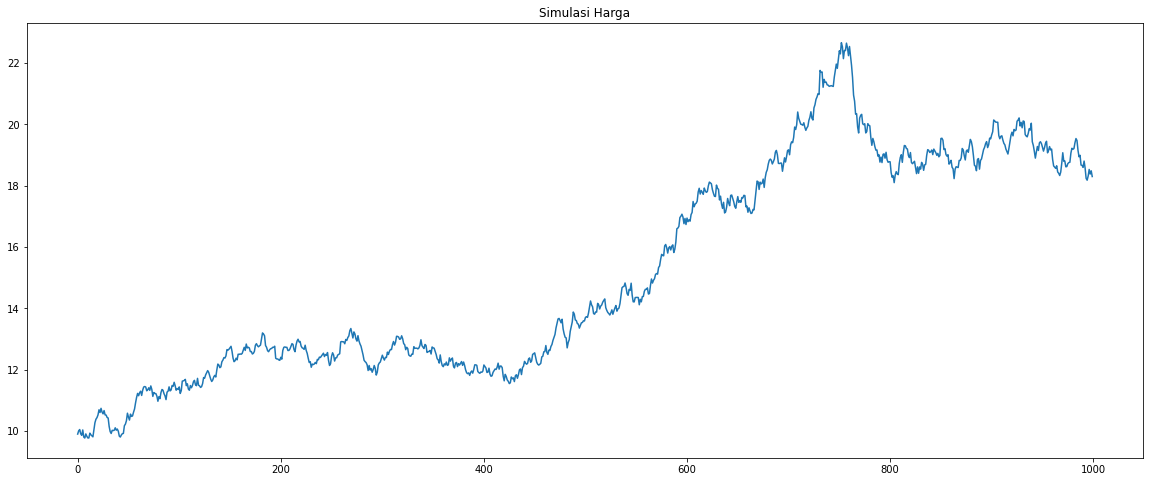

In [10]:
# import
import numpy as np
import matplotlib.pyplot as plt

# inisiasi jumlah waktu
T = 1000

# inisiasi harga awal
P0 = 10

# drift
mu = 0.001

# log harga terakhir => log(harga_awal)
last_p = np.log(P0)

# mengubah semua elemen array menjadi 0
log_returns = np.zeros(T)
prices = np.zeros(T)

#buat perulangan
for t in range(T):
  # sampel pengembalian log
  r = 0.01 * np.random.randn()

  # hitung log harga terbaru
  p = last_p + mu + r

  # simpan log kembali dan exponensial harga terbaru
  log_returns[t] = r + mu
  prices[t] = np.exp(p)

  # menetapkan last_p(log harga terakhir)
  last_p = p

# buat figure
plt.figure(figsize=(20, 8))

# buat plot dari prices
plt.plot(prices)

# buat judul figure
plt.title("Simulasi Harga")

## 1.2 Naive Forecast

In [11]:
# MAPE diimplementasikan didalam versi terakhir SKLearn
# Belum ada di collab, jadi perlu diinstall dahulu scikit learn versi terbarunya
!pip install -U scikit-learn

# import
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error

# Download file SPY
!wget -nc https://lazyprogrammer.me/course_files/SPY.csv

# buat dataframe dari file yang baru didownload di atas
df = pd.read_csv('SPY.csv', index_col='Date', parse_dates=True)

# buat variable untuk menampung shift() dari close
df['ClosePrediction'] = df['Close'].shift(1) # ==> shift() berguna untuk menambahkan 1 kolom baru (ClosePrediction) setelah (Close)

# atur data actual dengan kolom Close
y_true = df.iloc[1:]['Close']

# atur data prediksi dengan kolom close prediksi
y_preds = df.iloc[1:]['ClosePrediction']

# buat fungsi untuk sMAPE
def smape(y_true,y_preds):
  numerator = np.abs(y_true - y_preds)
  denominator = (np.abs(y_true) + np.abs(y_preds)) / 2
  ratio = numerator/denominator
  return ratio.mean()

# Hitung matrix
print("Score SSE: ", (y_true - y_preds).dot(y_true - y_preds))
print("\nScore MSE: ", mean_squared_error(y_true, y_preds))
print("\nScore MSE (Opsi-2): ", (y_true - y_preds).dot(y_true - y_preds) / len(y_true))
print("\nScore RMSE: ", mean_squared_error(y_true, y_preds, squared=False))
print("\nScore RMSE (Opsi-2): ", np.sqrt((y_true - y_preds).dot(y_true - y_preds) / len(y_true)))
print("\nScore MAE: ", mean_absolute_error(y_true, y_preds))
print("\nR2: ", r2_score(y_true, y_preds))
print("\nMAPE: ", mean_absolute_percentage_error(y_true, y_preds))
print("\nsMAPE: ", smape(y_true,y_preds))

--2022-01-14 10:50:13--  https://lazyprogrammer.me/course_files/SPY.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251935 (246K) [text/csv]
Saving to: ‘SPY.csv’

SPY.csv             100%[===================>] 246.03K  1.51MB/s    in 0.2s    

2022-01-14 10:50:14 (1.51 MB/s) - ‘SPY.csv’ saved [251935/251935]

Score SSE:  6330.37428949261

Score MSE:  2.7985739564511984

Score MSE (Opsi-2):  2.798573956451198

Score RMSE:  1.6728938867875627

Score RMSE (Opsi-2):  1.6728938867875625

Score MAE:  1.1457559803120336

R2:  0.9989603259063914

MAPE:  0.006494073151422375

sMAPE:  0.006491365814068423


## 1.3 Transform

### 1.3.1 Dataframe

File ‘airline_passengers.csv’ already there; not retrieving.



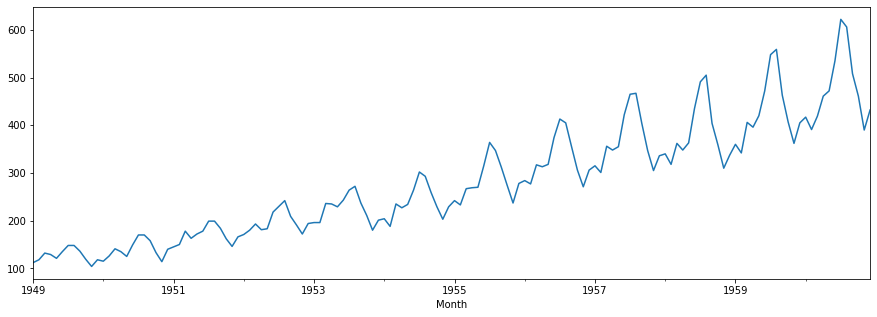

In [12]:
# download file
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# buat dataframe
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

# buat dan display plot untuk passengers (plot biasa dari dataframe)
df['Passengers'].plot(figsize=(15, 5))

### 1.3.2 Power Transform

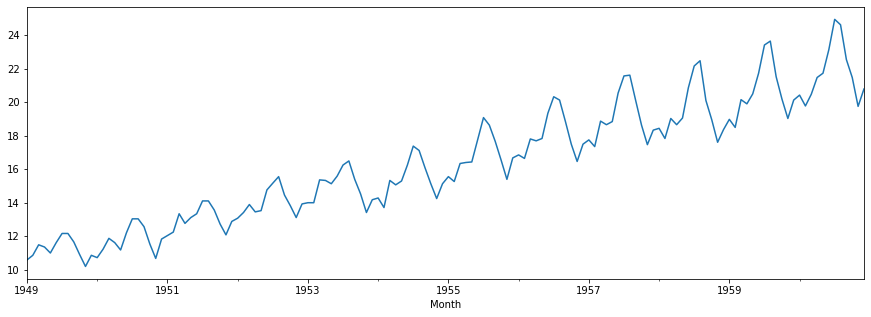

In [13]:
# power transform
df['sqrtpasenggers'] = np.sqrt(df['Passengers'])

# display plot dengan power transform
df['sqrtpasenggers'].plot(figsize=(15, 5))

### 1.3.3 Log Transform

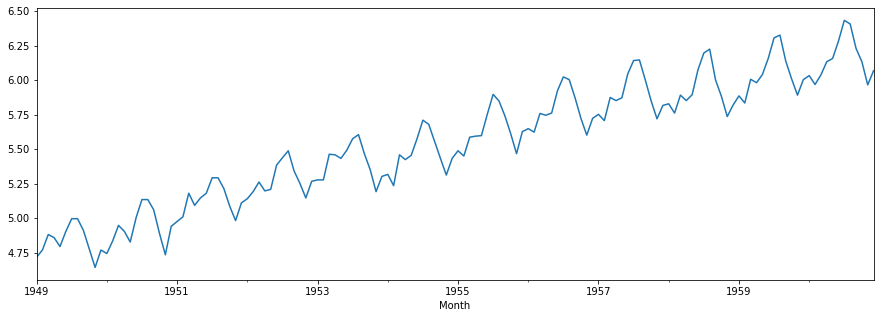

In [14]:
# log transform
df['logpasenggers'] = np.log(df['Passengers'])

# display plot dengan log transform
df['logpasenggers'].plot(figsize=(15, 5))

### 1.3.4 Box-cox Transform

Score lam:  0.14802265137037945


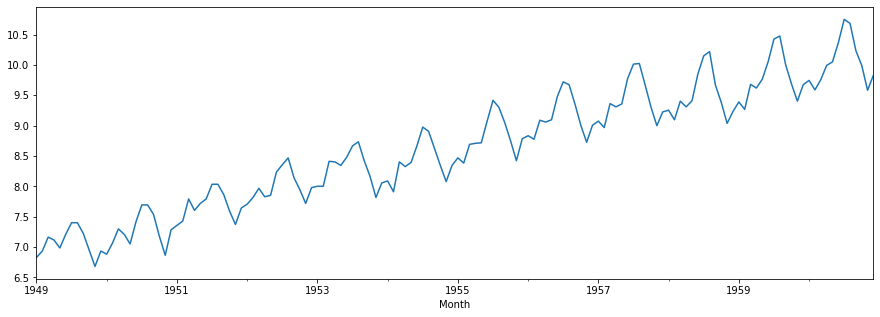

In [15]:
# boxcox transform
data, lam = boxcox(df['Passengers'])

# boxcox transform
print("Score lam: ", lam)

# buat variable untuk menampung data boxcox
df['boxcoxpassengers'] = data

# buat dan tampilkan plot dari dataframe diatas
df['boxcoxpassengers'].plot(figsize=(15,5))

# Bagian 2 - Exponential Smoothing dan ETS Methods

## 2.1 Sample Moving Average (SMA)

### 2.1.1 Contoh SMA Pertama

In [16]:
# download data
!wget -nc https://lazyprogrammer.me/course_files/sp500_close.csv

# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read data yang sudah didownload
close = pd.read_csv('sp500_close.csv', index_col=0, parse_dates=True)

# buat variable untuk membuat dataframe copyan
# 1. buat variable untuk dataframe yang hanya terdiri dari kolom "tanggal" beserta "GOOG" 
goog = close[['GOOG']].copy().dropna()
# 2. buat variable untuk dataframe yang hanya terdiri dari kolom "tanggal" beserta "GOOG" yang diisi mulai dari index ke 1 
goog_ret = np.log(goog.pct_change(1)+1) # ==> pct_change => untuk mengubah menjadi persentase

# buat kolom baru
# buat kolom baru bernama "SMA-10"
goog['SMA-10'] = goog['GOOG'].rolling(10).mean() # ==> rolling(10) => diisi mulai dari data yang ke 10, data yang pertama diisi dibaris ke 10 adalah nilai mean dari data ke 1-10
# buat kolom baru bernama 'SMA-50'
goog['SMA-50'] = goog['GOOG'].rolling(50).mean() # ==> rolling(50) => diisi mulai dari data yang ke 50, data yang pertama diisi dibaris ke 50 adalah nilai mean dari data ke 1-50

--2022-01-14 10:50:15--  https://lazyprogrammer.me/course_files/sp500_close.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4143332 (4.0M) [text/csv]
Saving to: ‘sp500_close.csv’

sp500_close.csv     100%[===================>]   3.95M  2.97MB/s    in 1.3s    

2022-01-14 10:50:17 (2.97 MB/s) - ‘sp500_close.csv’ saved [4143332/4143332]



#### 2.1.1.1 Plot (goog) dataframe versi 1

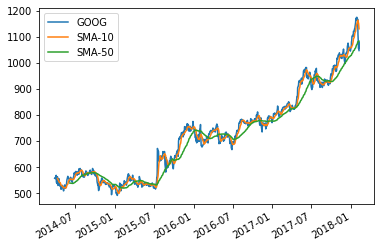

In [17]:
goog.plot()

#### 2.1.1.2 Plot (goog_ret) dataframe

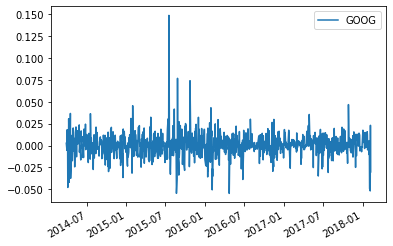

In [18]:
goog_ret.plot()

### 2.1.2 Contoh SMA Kedua

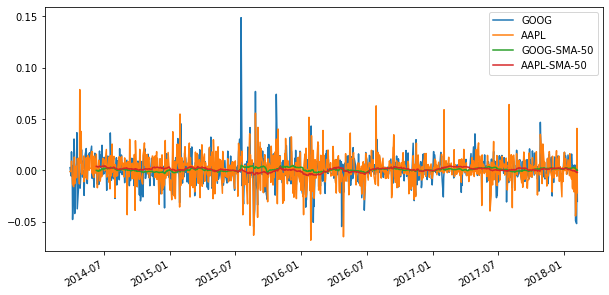

In [19]:
# buat dataframe terbaru
# 1. buat dataframe yang di dalamnya hanya terdiri dari kolom "goog" dan "aapl"
goog_aapl = close[['GOOG','AAPL']].copy().dropna()
# 2. buat dataframe yang di dalamnya hanya terdiri dari kolom "goog" dan "aapl" dan akan diisi dgn nilai log dan mulai pada data ke 1
goog_aapl_ret = np.log(1 + goog_aapl.pct_change(1))

# buat variable yang bernama "cov" 
cov = goog_aapl.rolling(50).cov() # mengisi data mulai dari baris ke 50 dengan covariance

# convert variable "cov" dengan lokasi='2018-02-07' menjadi ndarray
cov.loc['2018-02-07'].to_numpy()

# buat kolom baru
# 1. buat kolom baru yang diisi mulai dari data ke 50
goog_aapl_ret['GOOG-SMA-50'] = goog_aapl_ret['GOOG'].rolling(50).mean()
# 2. buat kolom baru yang diisi mulai dari data ke 50
goog_aapl_ret['AAPL-SMA-50'] = goog_aapl_ret['AAPL'].rolling(50).mean()

# buat plot nya
goog_aapl_ret.plot(figsize=(10,5))

## 2.2 EWMA (Exponentially Weighted Moving Average)

File ‘airline_passengers.csv’ already there; not retrieving.



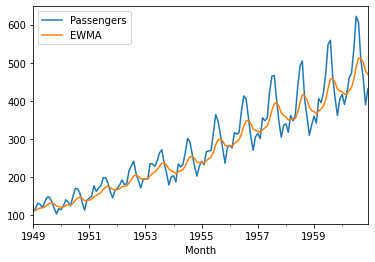

In [20]:
# download file
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

# import
import pandas as pd
import numpy as np

# buat dataframe dari file diatas
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

# buat variable alpha
alpha = 0.2

# buat kolom EWMA yang akan diisi dengan nilai mean
df['EWMA'] = df['Passengers'].ewm(alpha=alpha, adjust=False).mean() # ==> EWMA ini bisa dibuat untuk garis tengah

# buat plot
df.plot()

## 2.3 Forecasting Models

### 2.3.1 Simple Exponential Smoothing (SES)

     |████████████████████████████████| 9.8 MB 15.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


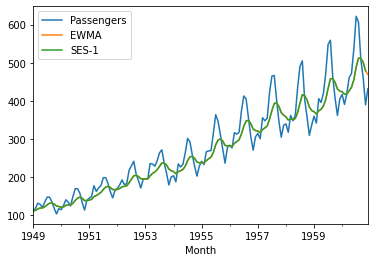

In [21]:
# jangan lupa install statsmodels dulu
!pip install -U statsmodels

# import
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# buat variable
ses = SimpleExpSmoothing(df['Passengers'])

# buat freq dari 'none' menjadi 'ms'
df.index.freq = 'MS'

# buat variable "ses" yang akan diisi nilai dari SES
ses = SimpleExpSmoothing(df['Passengers'], initialization_method='legacy-heuristic')

# buat variable "res" yang akan diisi fit dari varible "ses"
res = ses.fit(smoothing_level=alpha, optimized=False)

# cek res
res

# buat prediksi
res.predict(start=df.index[0], end=df.index[-1])

# buat kolom baru yang akan diisi dengan hasil prediksi
df['SES'] = res.predict(start=df.index[0], end=df.index[-1])

# fit kan nilai dari kolom terbaru
np.allclose(df['SES'], res.fittedvalues)

# buat kolom baru
df['SES-1'] = df['SES'].shift(-1)

# buat plot, karena kolom "ses" nilai pertamanya ganda maka tidak usah dipake
df[['Passengers','EWMA','SES-1']].plot()

### 2.3.2 SES Fitted

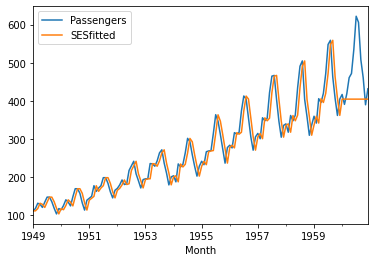

In [22]:
# buat variable
n_test = 12
train = df.iloc[:-n_test]
test = df.iloc[-n_test]

# buat ses
ses = SimpleExpSmoothing(train['Passengers'],initialization_method='legacy-heuristic')

# buat variable baru dengan nilai fit ses
res = ses.fit()

# ubah data menjadi nilai boolean
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

# buat kolom baru
df.loc[train_idx, 'SESfitted'] = res.fittedvalues
df.loc[test_idx, 'SESfitted'] = res.forecast(n_test)

# buat plot
df[['Passengers', 'SESfitted']].plot()

### 2.3.3 Holt-winters models

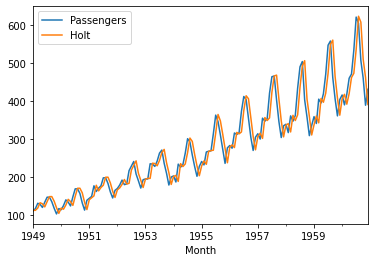

In [23]:
# import
from statsmodels.tsa.holtwinters import Holt

# buat varibale holt
holt = Holt(df['Passengers'], initialization_method="legacy-heuristic")

# buat variable baru yang akan diisi dengan nilai holt fit
res_h = holt.fit()

# buat kolom baru
df['Holt'] = res_h.fittedvalues

# buat plot
df[['Passengers', 'Holt']].plot()

### 2.3.4 Holt-winters models (Training & Testing)

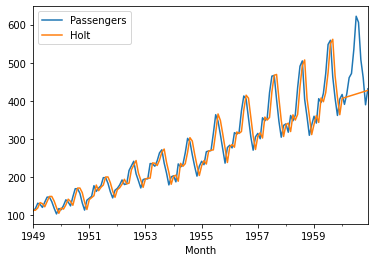

In [24]:
# buat varibale baru
holt = Holt(train['Passengers'], initialization_method='legacy-heuristic')

# buat variable baru yang diisi dengan nilai fit variable di atas
res_h = holt.fit()

# buat variable baru untuk train dan test
df.loc[train_idx, 'Holt'] = res_h.fittedvalues
df.loc[test_idx, 'Holt'] = res_h.forecast(n_test)

# buat plot
df[['Passengers','Holt']].plot()

### 2.3.5 Holt-winters models (Training & Testing & Exponential Smoothing)

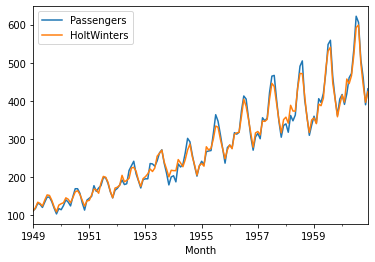

In [25]:
# import
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# buat variable baru
hw = ExponentialSmoothing( train['Passengers'], initialization_method='legacy-heuristic', trend='add', seasonal='add', seasonal_periods=12)

# buat variable baru yang akan diisi nilai fit dari variable di atas
res_hw = hw.fit()

# buat variable baru untuk train dan test
df.loc[train_idx, 'HoltWinters'] = res_hw.fittedvalues
df.loc[test_idx, 'HoltWinters'] = res_hw.forecast(n_test)

# buat plot
df[['Passengers','HoltWinters']].plot()

## 2.4 RMSE dan MAE

In [26]:
def rmse(y, t):
  return np.sqrt(np.mean((y-t)**2))

def mae(y, t):
  return np.mean(np.abs(y-t))

print("Train RMSE:", rmse(train['Passengers'], res_hw.fittedvalues))
print("Test RMSE:", rmse(test['Passengers'], res_hw.forecast(n_test)))

print("Train MAE:", mae(train['Passengers'], res_hw.fittedvalues))
print("Test MAE:", mae(test['Passengers'], res_hw.forecast(n_test)))

Train RMSE: 11.6246803154745
Test RMSE: 85.4754046218083
Train MAE: 9.00812289021194
Test MAE: 61.28821486420096


## 2.5 Walk-forward validation

In [27]:
# download file
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

# install statsmodels
!pip install -U statsmodels

# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# buat dataframe
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

# set freq jadi 'MS'
df.index.freq='MS'

# asumsikan bahwa forecast horizon adalah 12
h = 12

# buat variable untuk validasi sebanyak 10 step
steps = 10

# buat variable ntest
ntest = len(df) - h - steps + 1

# konfigurasi hyperparameter
trend_type_list = ['add','mul']
seasonal_type_list = ['add','mul']
damped_trend_list = [True, False]
init_method_list = ['estimated','heuristic','legacy-heuristic']
use_boxcox_list = [True, False, 0]
# Catatan: jangan lupa kalo pake boxcox, 'log-nya' dibuat false

# buat fungsi
def walkforward(trend_type,seasonal_type,damped_trend,init_method,use_boxcox,debug=False):

  # array error
  errors = []
  seen_last = False
  steps_completed = 0
  
  # buat perulangan
  for end_of_train in range(ntest, len(df) - h + 1):
    # kita tidak perlu add manual data kedalam dataset
    # kita hanya tinggal index saja di titik yang tepat -> ini cuma 'tampilan' bukan 'copyan'
    # sehingga tidak memakan memori
    train = df.iloc[:end_of_train]
    test = df.iloc[end_of_train:end_of_train + h]

    if test.index[-1] == df.index[-1]:
      seen_last = True

    steps_completed += 1

    hw = ExponentialSmoothing(train['Passengers'], initialization_method=init_method, trend=trend_type, damped_trend=damped_trend, seasonal=seasonal_type, seasonal_periods=12, use_boxcox=use_boxcox)
    res_hw = hw.fit()

    # Tampilkan error untuk forecast horizon
    fcast = res_hw.forecast(h)
    error = mean_squared_error(test['Passengers'], fcast)
    errors.append(error)
  
  if debug:
    print("seen last:", seen_last)
    print("steps completed:", steps_completed)
  
  return np.mean(errors)

# Tes fungsi yang dibuat di atas
walkforward('add', 'add', False, 'legacy-heuristic', 0, debug=True)

File ‘airline_passengers.csv’ already there; not retrieving.

seen last: True
steps completed: 10


2521.023839609926

In [28]:
# Cari berdasarkan iterasi semua opsi yang memungkinkan (Ex: Grid Search)
tuple_of_option_lists = (trend_type_list, seasonal_type_list, damped_trend_list, init_method_list, use_boxcox_list)
for x in itertools.product(*tuple_of_option_lists):
  print(x)

('add', 'add', True, 'estimated', True)
('add', 'add', True, 'estimated', False)
('add', 'add', True, 'estimated', 0)
('add', 'add', True, 'heuristic', True)
('add', 'add', True, 'heuristic', False)
('add', 'add', True, 'heuristic', 0)
('add', 'add', True, 'legacy-heuristic', True)
('add', 'add', True, 'legacy-heuristic', False)
('add', 'add', True, 'legacy-heuristic', 0)
('add', 'add', False, 'estimated', True)
('add', 'add', False, 'estimated', False)
('add', 'add', False, 'estimated', 0)
('add', 'add', False, 'heuristic', True)
('add', 'add', False, 'heuristic', False)
('add', 'add', False, 'heuristic', 0)
('add', 'add', False, 'legacy-heuristic', True)
('add', 'add', False, 'legacy-heuristic', False)
('add', 'add', False, 'legacy-heuristic', 0)
('add', 'mul', True, 'estimated', True)
('add', 'mul', True, 'estimated', False)
('add', 'mul', True, 'estimated', 0)
('add', 'mul', True, 'heuristic', True)
('add', 'mul', True, 'heuristic', False)
('add', 'mul', True, 'heuristic', 0)
('add

In [29]:
best_score = float('inf')
best_options = None
for x in itertools.product(*tuple_of_option_lists):
  score = walkforward(*x)

  if score < best_score:
    print("Best score so far: ", score)
    best_score = score
    best_options = x

Best score so far:  412.8172232531102
Best score so far:  412.70685632723337
Best score so far:  320.664050569128


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encount

Best score so far:  300.4779910420892


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encount

Best score so far:  287.4047511223069


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encount

In [30]:
print("best score:", best_score)

trend_type, seasonal_type, damped_trend, init_method, use_boxcox = best_options
print("trend_type", trend_type)
print("seasonal_type", seasonal_type)
print("damped_trend", damped_trend)
print("init_method", init_method)
print("use_boxcox", use_boxcox)

best score: 287.4047511223069
trend_type mul
seasonal_type mul
damped_trend True
init_method legacy-heuristic
use_boxcox False


In [31]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

hw = ExponentialSmoothing(train['Passengers'],initialization_method='legacy-heuristic',trend='mul',damped_trend=True,seasonal='mul',seasonal_periods=12,use_boxcox=False)
res_hw = hw.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


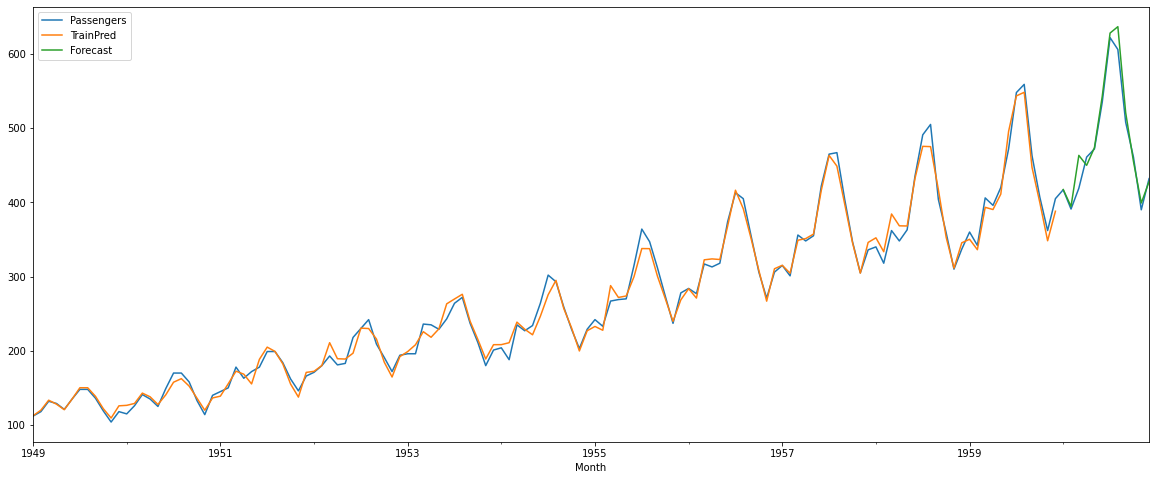

In [32]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

df.loc[train_idx, 'TrainPred'] = res_hw.fittedvalues
df.loc[test_idx, 'Forecast'] = res_hw.forecast(Ntest)

df[['Passengers', 'TrainPred', 'Forecast']].plot(figsize=(20, 8));

## 2.6 ETS

### 2.6.1 ETS Champagne

--2022-01-14 10:53:19--  https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1598 (1.6K) [text/csv]
Saving to: ‘perrin-freres-monthly-champagne.csv’

perrin-freres-month 100%[===================>]   1.56K  --.-KB/s    in 0s      

2022-01-14 10:53:19 (26.4 MB/s) - ‘perrin-freres-monthly-champagne.csv’ saved [1598/1598]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


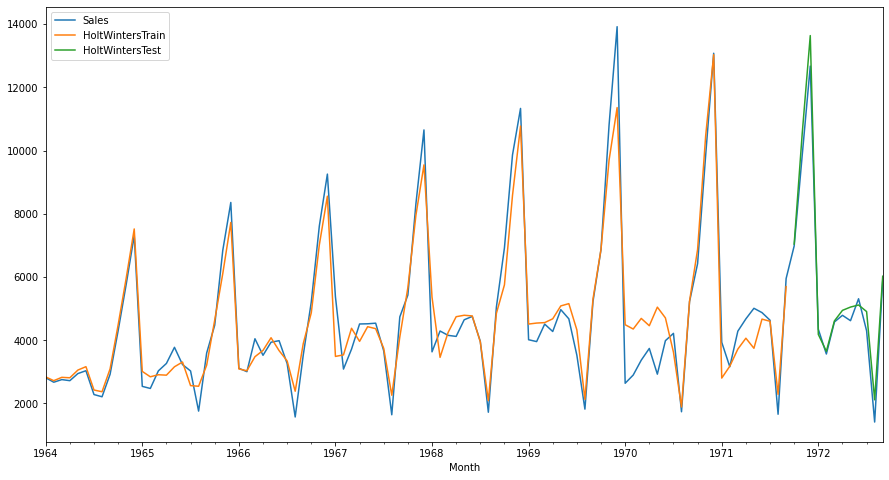

In [33]:
# install statsmodels
!pip install -U statsmodels

# download file
!wget -nc https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv

# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# buat dataframe
df = pd.read_csv('perrin-freres-monthly-champagne.csv',index_col='Month',skipfooter=2,parse_dates=True)

# beri nama kolom yang kosong menjadi ['sales']
df.columns = ['Sales']

# atur freq menjadi 'ms'
df.index.freq = 'MS'

# buat variable
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

# ubah data menjadi boolean
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

hw = ExponentialSmoothing(train['Sales'],initialization_method='legacy-heuristic',trend='add', seasonal='add', seasonal_periods=12)
res_hw = hw.fit()
df.loc[train_idx, 'HoltWintersTrain'] = res_hw.fittedvalues
df.loc[test_idx, 'HoltWintersTest'] = res_hw.forecast(Ntest)
df[['Sales', 'HoltWintersTrain', 'HoltWintersTest']].plot(figsize=(15, 8));

In [34]:
r2_train = r2_score(train['Sales'], res_hw.fittedvalues)
r2_test = r2_score(test['Sales'], res_hw.forecast(Ntest))
print("R2 Score (Train): ", r2_train)
print("R2 Score (Test): ", r2_test)

R2 Score (Train):  0.9173433323379416
R2 Score (Test):  0.9735808870459498


### 2.6.2 ETS Stock

--2022-01-14 10:53:23--  https://lazyprogrammer.me/course_files/sp500sub.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25473876 (24M) [text/csv]
Saving to: ‘sp500sub.csv’

sp500sub.csv        100%[===================>]  24.29M  12.8MB/s    in 1.9s    

2022-01-14 10:53:26 (12.8 MB/s) - ‘sp500sub.csv’ saved [25473876/25473876]



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:393: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


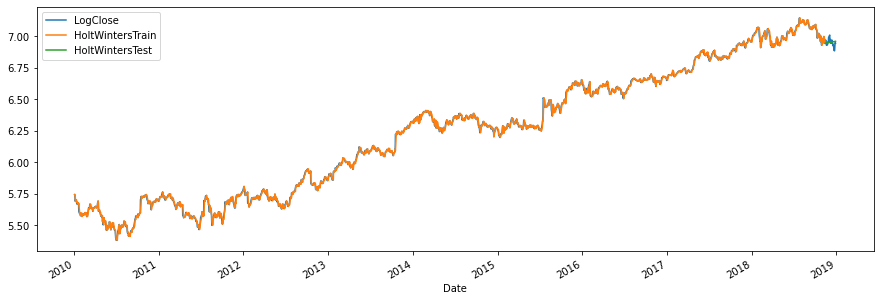

In [35]:
# install statsmodels
!pip install -U statsmodels

# download file
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# buat dataframe
df = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)

# buat variable dengan nama goog
goog = df[df['Name'] == 'GOOG'][['Close']].copy() # => artinya copy kolom "close", yang "name=goog" 

# buat kolom baru
goog['LogClose'] = np.log(goog['Close']) # => akan diisi dengan nilai log dari "close"

# buat data train dan data testing
Ntest = 30
train = goog.iloc[:-Ntest] # => selain tail dibawah
test = goog.iloc[-Ntest:] # => sama kaya goog.tail(30)

# Ubah data menjadi boolean
# goog.index adalah semua data
# train.index[-1] adalah data terakhir dari "train"
train_idx = goog.index <= train.index[-1]
test_idx = goog.index > train.index[-1]

hw = ExponentialSmoothing(train['LogClose'],initialization_method='legacy-heuristic',trend='add', seasonal=None)
res_hw = hw.fit()

# fit untuk data training
goog.loc[train_idx, 'HoltWintersTrain'] = res_hw.fittedvalues

# forecast untuk data testing
goog.loc[test_idx, 'HoltWintersTest'] = res_hw.forecast(Ntest).to_numpy()

# buat plot
goog[['LogClose', 'HoltWintersTrain', 'HoltWintersTest']].plot(figsize=(15, 5));

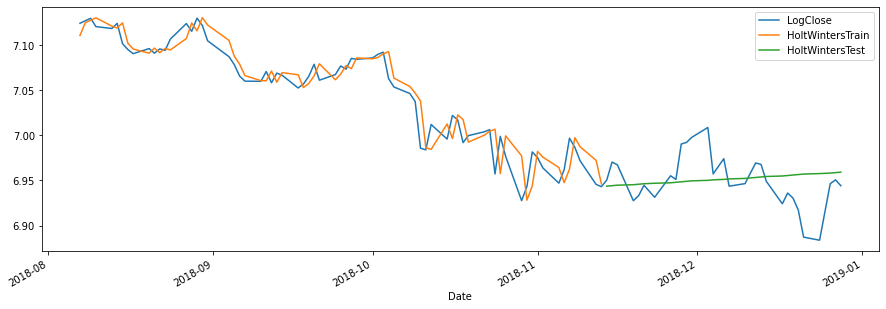

In [36]:
# buat plot dengan menggunakan variable
cols = ['LogClose', 'HoltWintersTrain', 'HoltWintersTest']
goog.iloc[-100:][cols].plot(figsize=(15, 5));

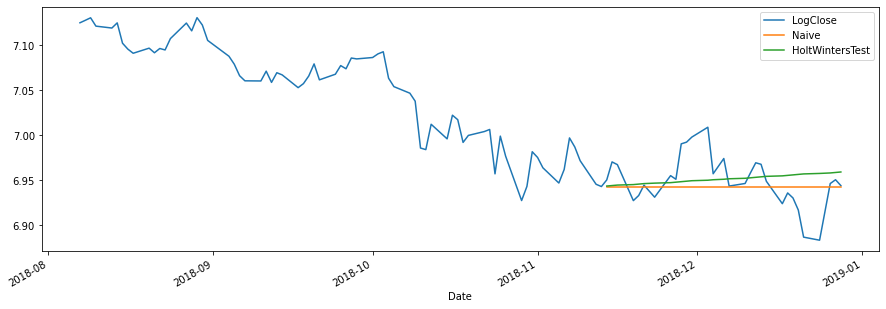

In [37]:
# buat kolom baru pada variable goog
goog.loc[test_idx, 'Naive'] = train.iloc[-1]['LogClose']
goog.iloc[-100:][['LogClose', 'Naive', 'HoltWintersTest']].plot(figsize=(15, 5));

In [38]:
r2_test_naive = r2_score(goog.loc[test_idx, 'LogClose'], goog.loc[test_idx, 'Naive'])
r2_test_hwt = r2_score(goog.loc[test_idx, 'LogClose'], goog.loc[test_idx, 'HoltWintersTest'])
print("R2 Score Test (Naive): ", r2_test_naive)
print("R2 Score Test (Holt-winters test): ", r2_test_hwt)

R2 Score Test (Naive):  -0.06454209862026317
R2 Score Test (Holt-winters test):  -0.15876524672340087


# Bagian 3 - ARIMA

## 3.1 ARIMA in CODE (ARIMA [TS])

File ‘airline_passengers.csv’ already there; not retrieving.



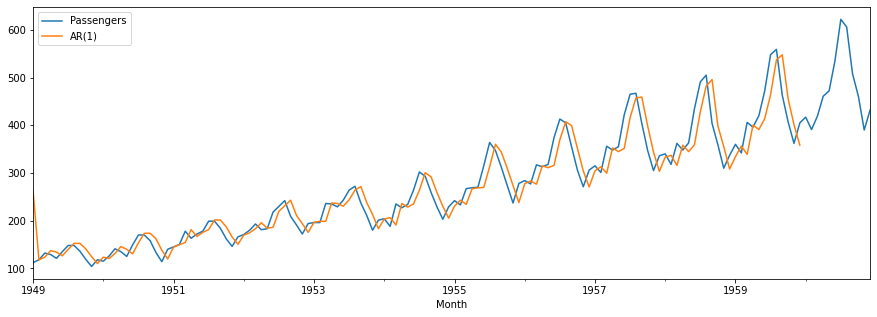

In [39]:
#install statsmodels
!pip install -U statsmodels

#download file
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

#buat dataframe
df = pd.read_csv("airline_passengers.csv", index_col="Month", parse_dates=True)

# buat kolom baru untuk menghitung jarak hari
df['lstdiff'] = df['Passengers'].diff() #diff untuk menghitung jarak hari

#buat kolom baru untuk mengisi nilai log dari passengers
df["LogPassengers"] = np.log(df["Passengers"])

#set index freq menjadi "MS"
df.index.freq="MS"

#buat variable
Ntest = 12 #ini akan jadi jumlah datatesting
train = df.iloc[:-Ntest] #akan diisi data training dengan diatas tail(12)
test = df.iloc[-Ntest:] #akan diisi data testing dengan tail(12)

#buat variable dengan nilai boolean
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

arima = ARIMA(train['Passengers'], order=(1,0,0))

arima_result = arima.fit()

df.loc[train_idx, 'AR(1)'] = arima_result.predict(start=train.index[0], end=train.index[-1])

df[['Passengers', 'AR(1)']].plot(figsize=(15,5))

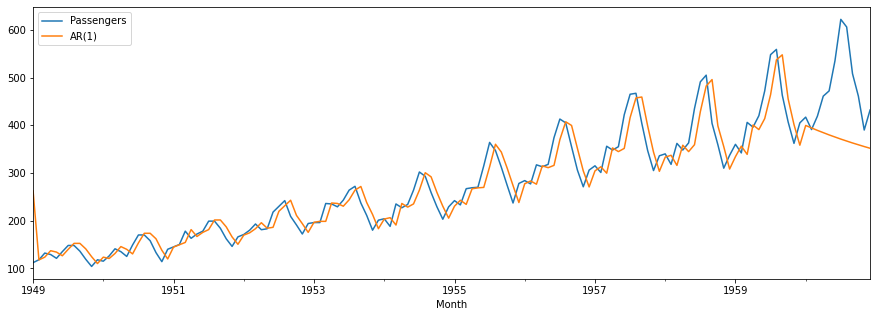

In [40]:
prediction_result = arima_result.get_forecast(Ntest)
forecast = prediction_result.predicted_mean
df.loc[test_idx, 'AR(1)'] = forecast

df[['Passengers', 'AR(1)']].plot(figsize=(15,5))

> Plot di atas kurang bagus dibandingkan dengan plot yang di atasnya lagi, karena diakhir plot ternyata trendnya menunjukan penurunan. Sehingga dapat dibilang tidak sesuai

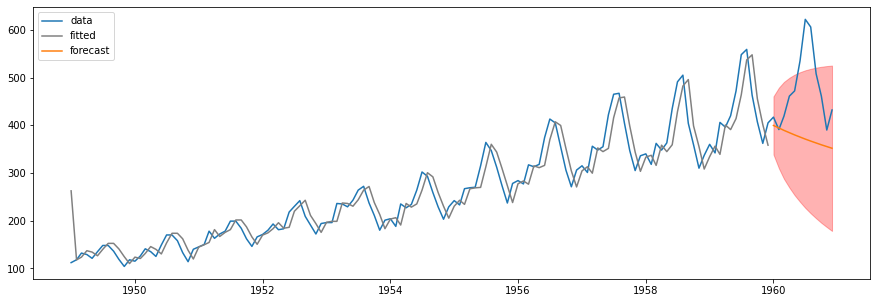

In [41]:
#buat fungsi
def plot_fit_and_forecast(result):
  # 1. plot untuk passengers
  fig, ax = plt.subplots(figsize=(15,5)) #15 = kolom, dan 5 = baris
  ax.plot(df['Passengers'], label='data')

  # 2. plot untuk nilai fit
  #buat curve plot di data training
  train_pred = result.fittedvalues
  ax.plot(train.index, train_pred, color='grey', label='fitted')

  # 3. plot untuk forecast
  #forecast untuk data testing
  prediction_result = result.get_forecast(Ntest)
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int['lower Passengers'], conf_int['upper Passengers']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label='forecast')
  ax.fill_between(test.index, \
                  lower, upper, \
                  color='red', alpha=0.3)
  ax.legend()

# tes fungsi dengan arima_result
plot_fit_and_forecast(arima_result)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


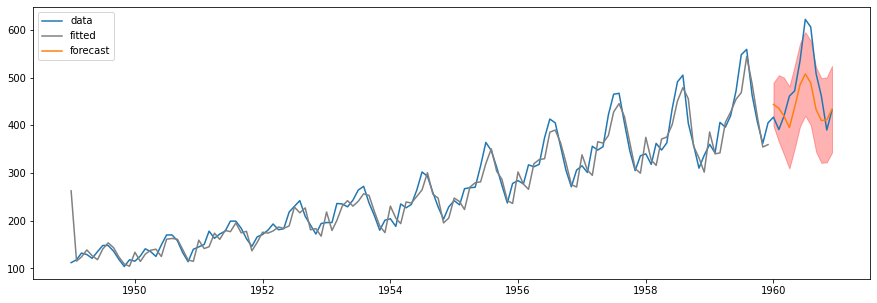

In [42]:
#buat arima_result menjadi AR10
arima = ARIMA(train['Passengers'], order=(10,0,0)) #AR10
arima_result = arima.fit()

#tes dengan menggunakan fungsi kembali
plot_fit_and_forecast(arima_result)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


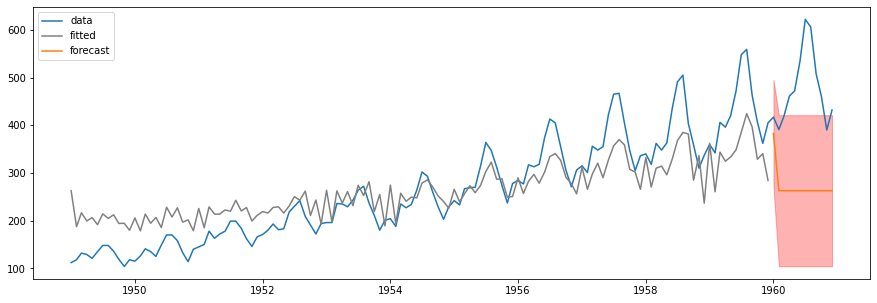

In [43]:
#buat arima_result menjadi AR10
arima = ARIMA(train['Passengers'], order=(0,0,1)) #MA1
arima_result = arima.fit()

#tes dengan menggunakan fungsi kembali
plot_fit_and_forecast(arima_result)

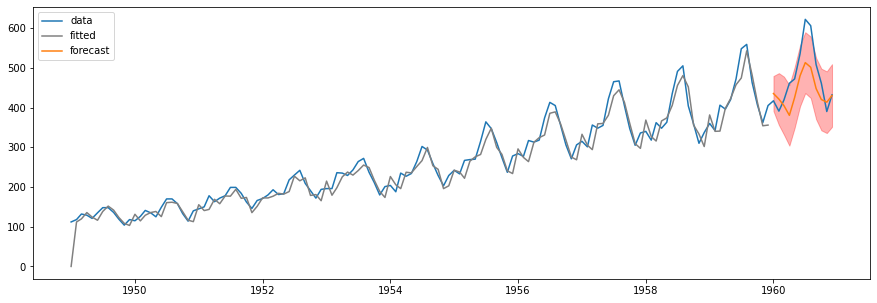

In [44]:
#buat arima_result menjadi ARIMA811
arima = ARIMA(train['Passengers'], order=(8,1,1)) #ARIMA811
arima_result = arima.fit()

#tes dengan menggunakan fungsi kembali
plot_fit_and_forecast(arima_result)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


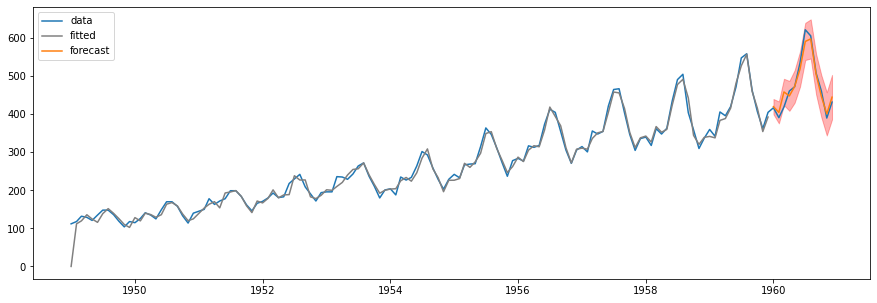

In [45]:
#buat arima_result menjadi ARIMA1210
arima = ARIMA(train['Passengers'], order=(12,1,0)) #ARIMA1210
arima_result = arima.fit()

#tes dengan menggunakan fungsi kembali
plot_fit_and_forecast(arima_result)

In [46]:
def rmse(result, is_logged):
  forecast = result.forecast(Ntest)
  if is_logged:
    forecast = np.exp(forecast)
  
  t = test['Passengers']
  y = forecast
  return np.sqrt(np.mean((t-y)**2))

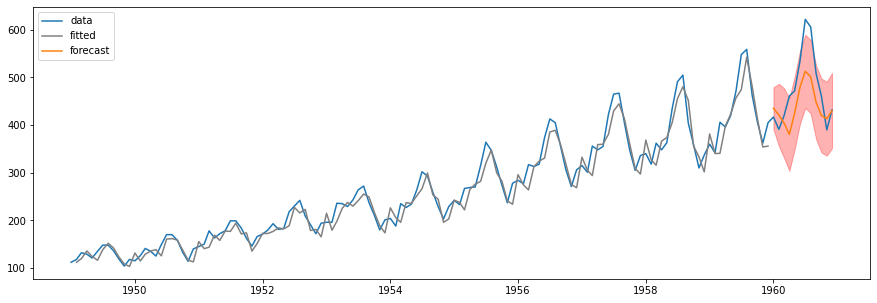

In [47]:
arima = ARIMA(train['Passengers'], order=(8,1,1))
arima_result_811 = arima.fit()

def plot_fit_and_forecast_int(result, d, col='Passengers'):
  fix, ax = plt.subplots(figsize=(15,5))
  ax.plot(df[col], label='data')

  #curve plot
  train_pred = result.predict(start=train.index[d], end=train.index[-1])
  ax.plot(train.index[d:], train_pred, color='grey', label='fitted')

  #forecast plot
  prediction_result = result.get_forecast(Ntest)
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int[f'lower {col}'], conf_int[f'upper {col}']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label='forecast')
  ax.fill_between(test.index, lower, upper, color='red', alpha=0.3)
  
  ax.legend()

plot_fit_and_forecast_int(arima_result_811, 1)

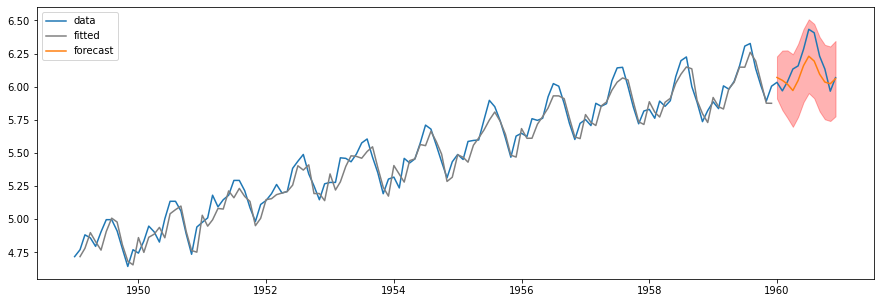

In [48]:
arima = ARIMA(train['LogPassengers'], order=(8,1,1))
arima_result_log811 = arima.fit()
plot_fit_and_forecast_int(arima_result_log811, 1, col='LogPassengers')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


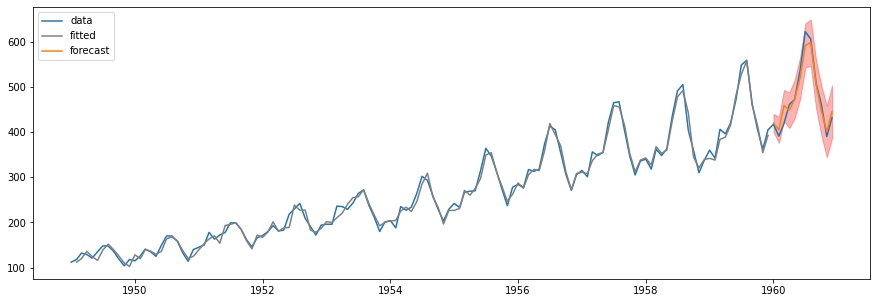

In [49]:
arima = ARIMA(train['Passengers'], order=(12,1,0))
arima_result_1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_1210, 1, col='Passengers')

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


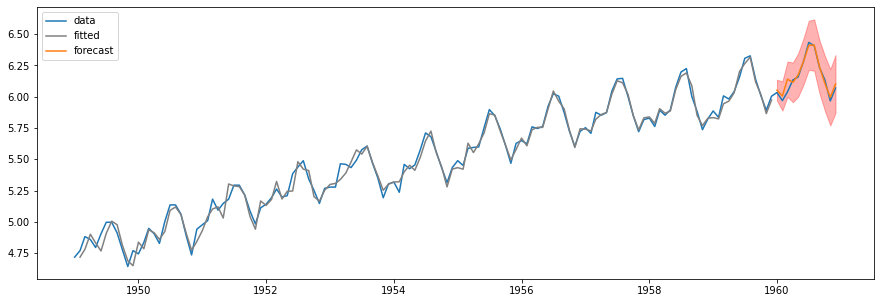

In [50]:
arima = ARIMA(train['LogPassengers'], order=(12,1,0))
arima_result_log1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_log1210, 1, col='LogPassengers')

In [51]:
print("ARIMA(8,1,1):", rmse(arima_result_811, False))
print("ARIMA(8,1,1) logged:", rmse(arima_result_log811, True))
print("ARIMA(12,1,0):", rmse(arima_result_log1210, False))
print("ARIMA(12,1,0) logged:", rmse(arima_result_log1210, True))

ARIMA(8,1,1): 59.06459099216811
ARIMA(8,1,1) logged: 61.6060499311999
ARIMA(12,1,0): 475.83390985559845
ARIMA(12,1,0) logged: 16.173491680975104


## 3.2 PACF

### 3.1.1 Contoh 1

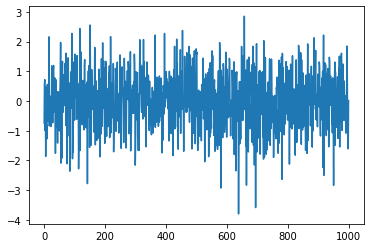

In [52]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

#buat variable
x0=np.random.randn(1000) #ini merupakan ndarray

#buat plot
plt.plot(x0) #kalo ndarray dipanggilnya harus pake plt

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


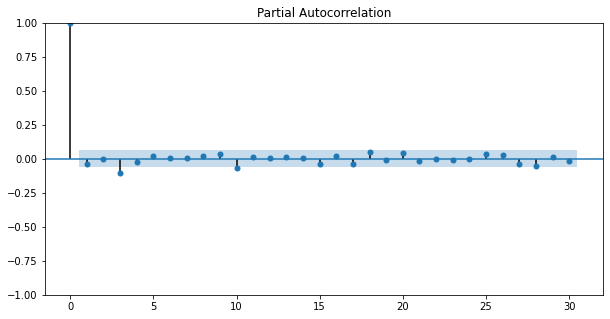

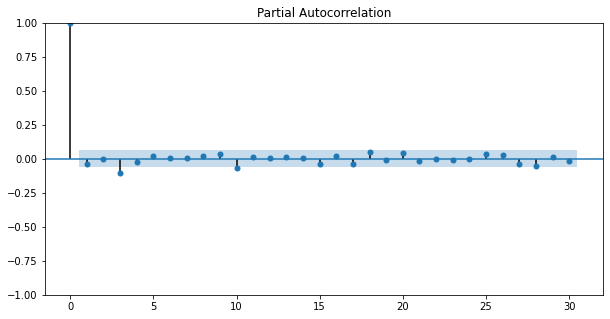

In [53]:
#buat plot pacf
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(x0, ax=ax)

### 3.1.2 Contoh 2

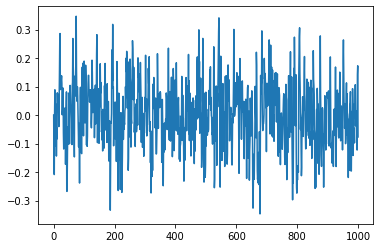

In [54]:
#buat variable x1
x1=[0]
for i in range(1000):
  x=0.5*x1[-1]+0.1*np.random.randn()
  x1.append(x)

x1=np.array(x1)

#buat plot x1
plt.plot(x1)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


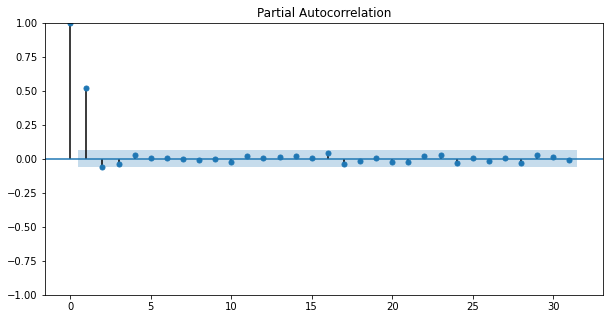

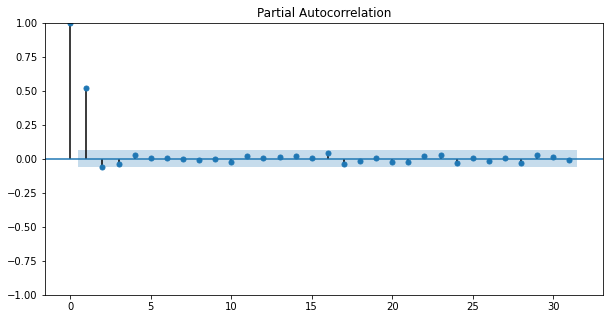

In [55]:
#buat plot pacf
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(x1, ax=ax)

### 3.1.3 Contoh 3

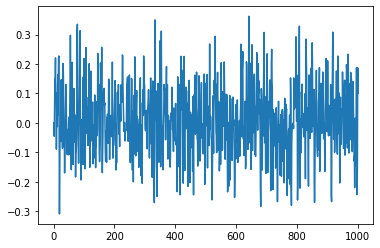

In [56]:
#buat variable x2
x2=[0,0]
for i in range(1000):
  x=0.5*x2[-1]-0.3*x2[-2]+0.1*np.random.randn()
  x2.append(x)

x2=np.array(x2)

#buat plot x2
plt.plot(x2)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


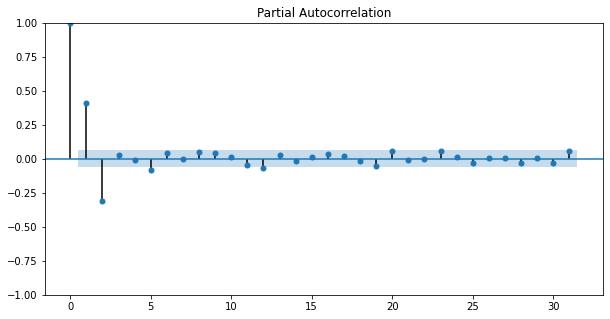

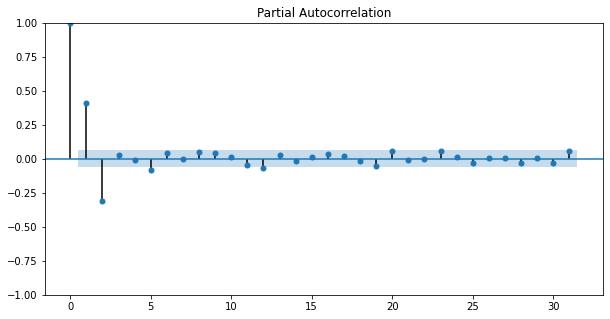

In [57]:
#buat plot pacf
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(x2, ax=ax)

### 3.1.4 Contoh 4

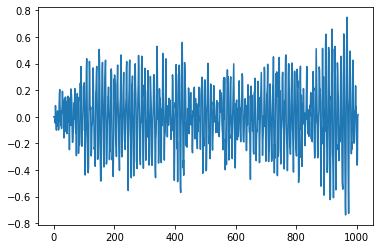

In [58]:
#buat variable x5
x5=[0,0,0,0,0]
for i in range(1000):
  x=0.5*x5[-1]-0.3*x5[-2]-0.6*x5[-5]+0.1*np.random.randn()
  x5.append(x)

x5=np.array(x5)

#buat plot x5
plt.plot(x5)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


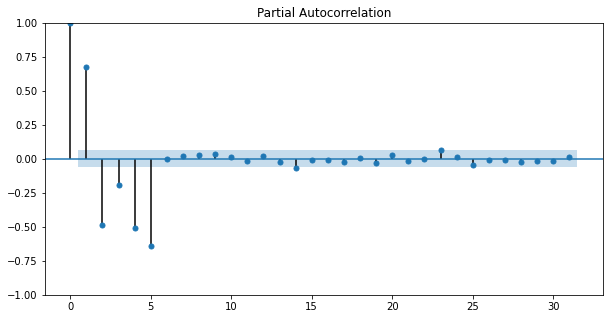

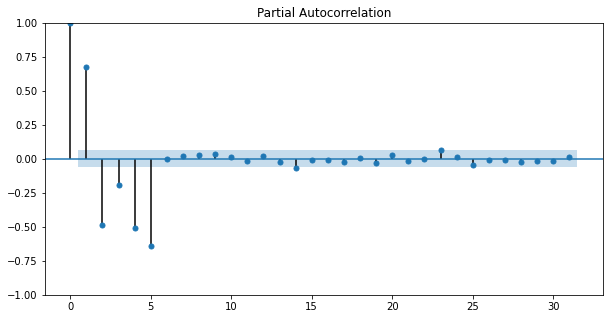

In [59]:
#buat plot pacf
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(x5, ax=ax)

## 3.3 ACF

### 3.2.1 Contoh 1

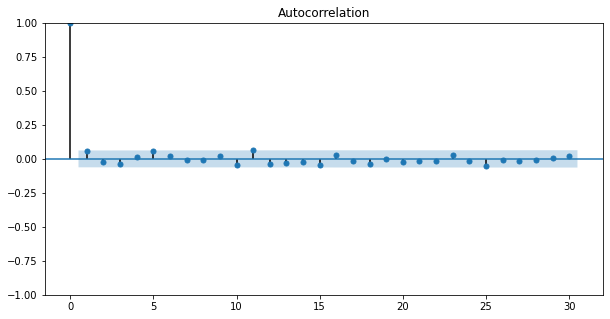

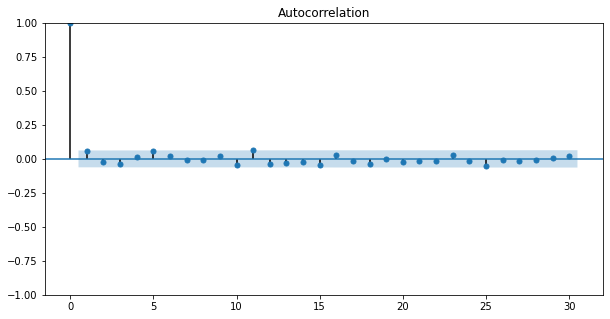

In [60]:
#buat iid noise
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(np.random.randn(1000), ax=ax)

### 3.2.2 Contoh 2

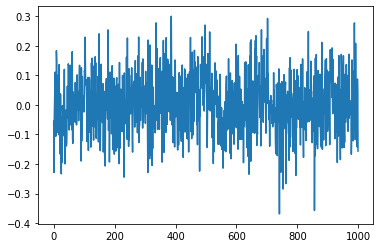

In [61]:
errors=0.1*np.random.randn(1000)
mal=[]
for i in range(1000):
  if i<=1:
    x=0.5*errors[i-1]+errors[i]
  else:
    x=errors[i]
  mal.append(x) #untuk menambahkan item diakhir list
mal=np.array(mal)

#buat plot
plt.plot(mal)

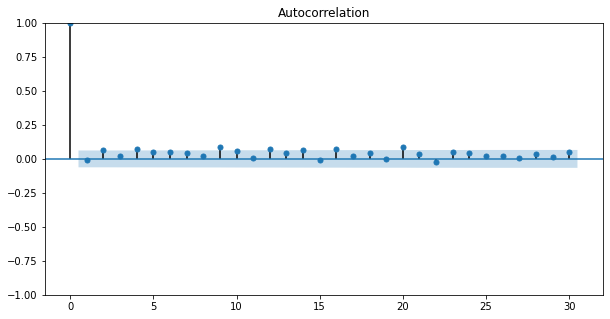

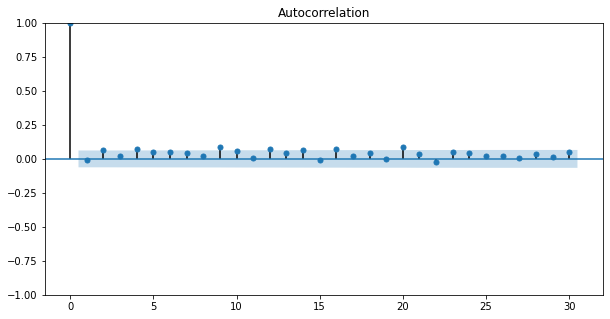

In [62]:
#buat plot dgn acf
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(mal,ax=ax)

### 3.2.3 Contoh 3

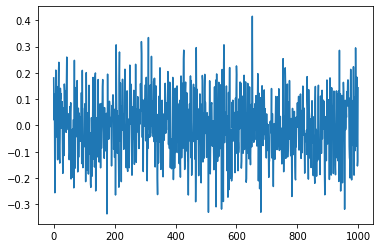

In [63]:
errors = 0.1 * np.random.randn(1000)
ma2 = []
for i in range(1000):
  x=0.5*errors[i-1]-0.3*errors[i-2]+errors[i]
  ma2.append(x)
ma2=np.array(ma2)

plt.plot(ma2)

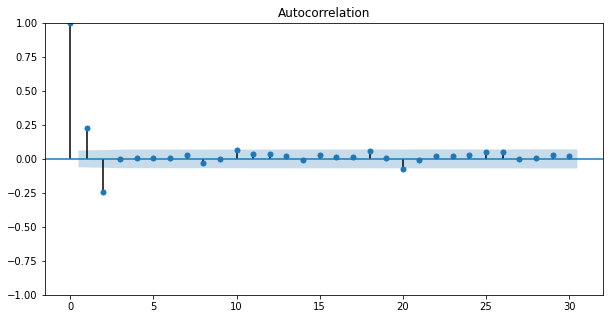

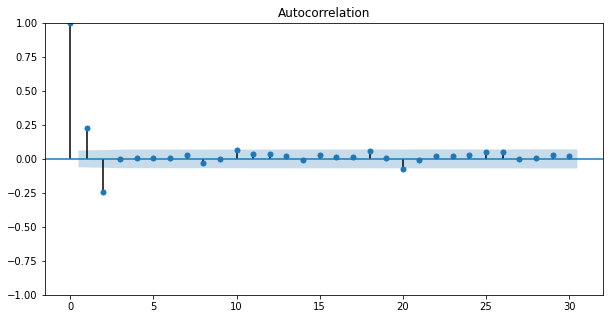

In [64]:
fig,ax=plt.subplots(figsize=(10,5))
plot_acf(ma2, ax=ax)

### 3.2.4 Contoh 4

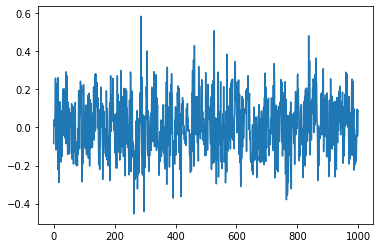

In [65]:
errors = 0.1 * np.random.randn(1000)
ma3 = []
for i in range(1000):
  x=0.5*errors[i-1]-0.3*errors[i-2]+0.7*errors[i-3]+errors[i]
  ma3.append(x)
ma3=np.array(ma3)

plt.plot(ma3)

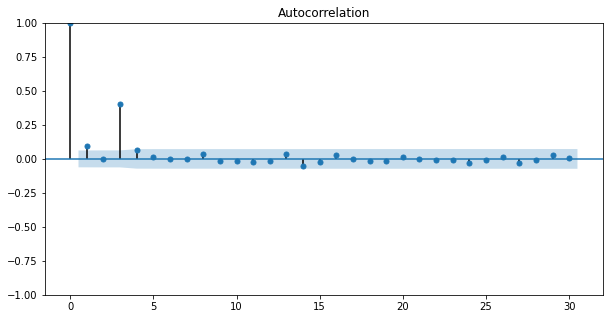

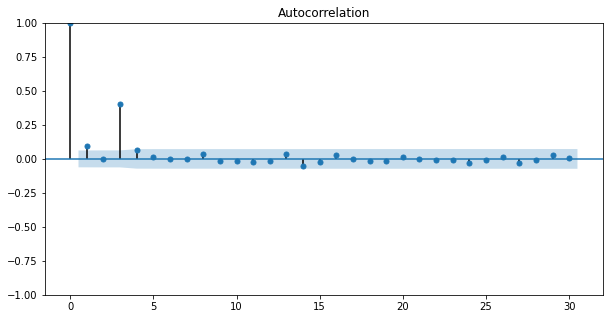

In [66]:
fig,ax=plt.subplots(figsize=(10,5))
plot_acf(ma3, ax=ax)

### 3.2.5 Contoh 5

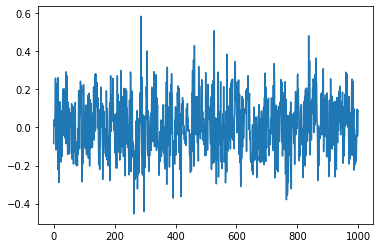

In [67]:
errors = 0.1 * np.random.randn(1000)
ma6 = []
for i in range(1000):
  x=0.5*errors[i-1]-0.3*errors[i-2]+0.7*errors[i-3]+0.2*errors[i-4]-0.8*errors[i-5]-0.9*errors[i-6]+errors[i]
  ma6.append(x)
ma6=np.array(ma3)

plt.plot(ma6)

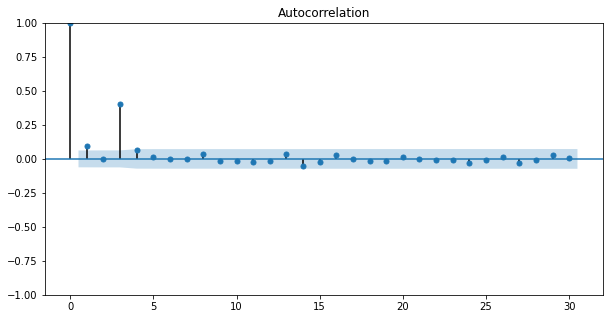

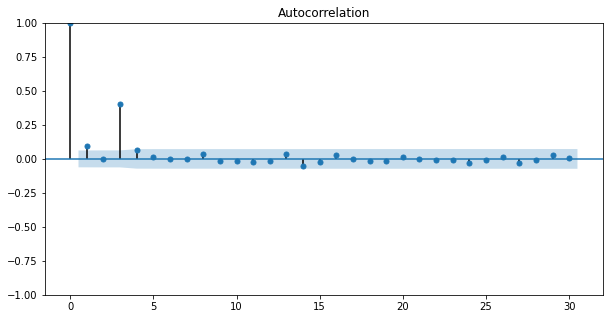

In [68]:
fig,ax=plt.subplots(figsize=(10,5))
plot_acf(ma6, ax=ax)

## 3.4 Stationarity

### 3.3.1 Contoh 1

In [69]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

#download file
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

#buat dataframe
df=pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

#buat kolom baru
df['LogPassengers']=np.log(df["Passengers"])
df['Diff']=df['Passengers'].diff()
df['LogDiff']=np.log(df['Diff'])
df['DiffLogPassengers']=df['LogPassengers'].diff()

#buat adfuller
adfuller(df['Passengers'])

File ‘airline_passengers.csv’ already there; not retrieving.



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(0.8153688792060418,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 996.692930839019)

In [70]:
#buat fungsi
def adf(x):
  res=adfuller(x)
  print("Test-statistic:",res[0])
  print("P-value:",res[1])
  if res[1]<0.05:
    print("Stationary")
  else:
    print("Non-Stationary")

#tes fungsi
adf(df['Passengers'])

Test-statistic: 0.8153688792060418
P-value: 0.9918802434376409
Non-Stationary


In [71]:
#tes fungsi dgn nilai random
adf(np.random.randn(100))

Test-statistic: -8.111790993914619
P-value: 1.2202949057658472e-12
Stationary


In [72]:
#tes fungsi dgn gamma random
adf(np.random.gamma(1, 1, 100))

Test-statistic: -9.24472355344055
P-value: 1.5484458324374835e-15
Stationary


In [73]:
#tes fungsi dgn kolom diff yang dihapus
adf(df['Diff'].dropna())

Test-statistic: -2.829266824169997
P-value: 0.05421329028382577
Non-Stationary


In [74]:
#tes fungsi dgn kolom difflogpassengers yang dihapus
adf(df['DiffLogPassengers'].dropna())

Test-statistic: -2.7171305983881044
P-value: 0.07112054815086355
Non-Stationary


### 3.3.2 Contoh 2

In [75]:
#download file
!wget -nc https://www.lazyprogrammer.me/course_files/sp500sub.csv

#buat dataframe stock
stock=pd.read_csv("sp500sub.csv", index_col='Date', parse_dates=True)

#buat dataframe goog dgn kondisi sbb
goog=stock[stock['Name']=='GOOG'][['Close']] #hanya mengambil kolom close

#buat kolom baru
goog['LogPrice']=np.log(goog['Close'])
goog['LogRet']=goog['LogPrice'].diff()

#buat dataframe sbux dgn kondisi sbb
sbux = stock[stock['Name'] == 'SBUX'][['Close']]

#buat kolom baru
sbux['LogPrice']=np.log(sbux['Close'])
sbux['LogRet']=sbux['LogPrice'].diff()

# tes fungsi adf dgn kolom LogRet dihapus
adf(sbux['LogRet'].dropna())

File ‘sp500sub.csv’ already there; not retrieving.

Test-statistic: -30.086501426958073
P-value: 0.0
Stationary


## 3.5 ARIMA 2

In [76]:
#download file
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

#install pmdarima
!pip install pmdarima

#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm

#buat dataframe
df=pd.read_csv("airline_passengers.csv", index_col="Month", parse_dates=True)

#buat kolom baru
df['LogPassengers']=np.log(df['Passengers'])

#buat variable
Ntest=12
train=df.iloc[:-Ntest]
test=df.iloc[-Ntest:]

#buat model
model = pm.auto_arima(train['Passengers'],trace=True,suppress_warnings=True,seasonal=True,m=12)

File ‘airline_passengers.csv’ already there; not retrieving.

     |████████████████████████████████| 1.4 MB 29.1 MB/s 
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=2.49 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.43 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.41 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.30 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.07 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=1.34 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.40 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.45 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.66 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.35 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.63 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Ti

In [77]:
#buat rangkuman model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Fri, 14 Jan 2022   AIC                            905.686
Time:                                    10:54:11   BIC                            919.623
Sample:                                         0   HQIC                           911.346
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

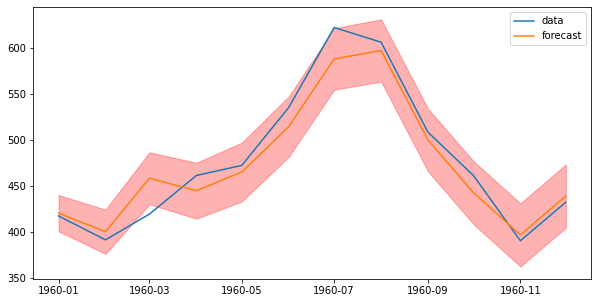

In [78]:
#buat variable
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(test.index,test['Passengers'],label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend()

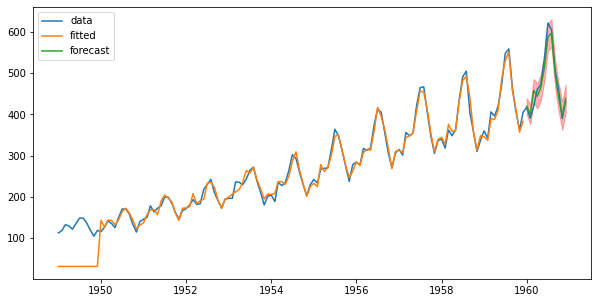

In [79]:
train_pred=model.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index, df["Passengers"], label='data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)

ax.legend()

In [80]:
logmodel = pm.auto_arima(train['LogPassengers'],trace=True,suppress_warnings=True,seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-440.663, Time=2.85 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=1.81 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=0.67 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.03 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.326, Time=2.27 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.783, Time=1.12 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.329, Time=5.73 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.716, Time=2.12 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=5.53 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-445.502, Time=1.99 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=0.55 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-441.068, Time=2.25 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.512, Time=8.08 sec
 ARIMA(1,0,2)(1,1,0)[12]

In [81]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 229.026
Date:                              Fri, 14 Jan 2022   AIC                           -448.052
Time:                                      10:55:30   BIC                           -434.114
Sample:                                           0   HQIC                          -442.392
                                              - 132                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0193      0.009      2.155      0.031       0.002       0.037
ar.L1          0.5997      0.083      7.263      0.000       0.438       0.762
ar.L2          0.2422      0.085      2.858      0.004       0.076       0.408
ma.S.L12      -0.5683      0.105     -5.436      0.000      -0.773      -0.363
sigma2         0.0012      0.000      8.194      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.07
Prob(Q):                              1.00   Prob(JB):                         0.05
Heteroskedasticity (H):               0.36   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

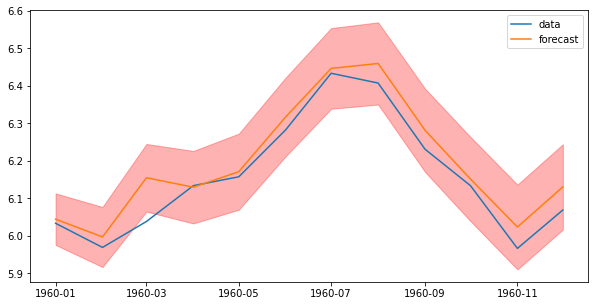

In [82]:
test_pred_log, confint = logmodel.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(test.index, test["LogPassengers"], label='data')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend()

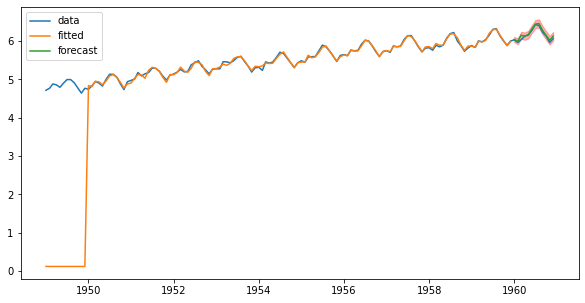

In [83]:
train_pred_log=logmodel.predict_in_sample(start=0,end=-1)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index, df["LogPassengers"], label='data')
ax.plot(train.index, train_pred_log, label='fitted')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)

ax.legend()

In [84]:
#forecast rmse
def rmse(t, y):
  return np.sqrt(np.mean((t-y)**2))

print("Non logged RMSE:", rmse(test['Passengers'],test_pred))
print("Logged RMSE:", rmse(test['Passengers'],np.exp(test_pred_log)))

Non logged RMSE: 18.536468964799457
Logged RMSE: 23.051734622075276


In [85]:
# non-seasonal
model = pm.auto_arima(train['LogPassengers'],
                      trace=True,
                      suppress_warnings=True,
                      max_p=12,max_q=2,max_order=14,
                      stepwise=True,seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-211.983, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-214.718, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-216.493, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-212.867, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-221.069, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-216.622, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-222.099, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-217.708, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-215.917, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-228.902, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-217.540, T

In [86]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:               SARIMAX(4, 1, 2)   Log Likelihood                 133.478
Date:                Fri, 14 Jan 2022   AIC                           -250.956
Time:                        10:55:40   BIC                           -227.955
Sample:                             0   HQIC                          -241.610
                                - 132                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0102      0.002      5.365      0.000       0.006       0.014
ar.L1          0.0419      0.121      0.346      0.729      -0.196       0.279
ar.L2          0.4491      0.115      3.895      0.000       0.223       0.675
ar.L3         -0.2337      0.099     -2.369      0.018      -0.427      -0.040
ar.L4         -0.2501      0.106     -2.354      0.019      -0.458      -0.042
ma.L1         -0.0467      0.078     -0.597      0.551      -0.200       0.107
ma.L2         -0.8622      0.076    -11.276      0.000      -1.012      -0.712
sigma2         0.0075      0.001      5.522      0.000       0.005       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.70
Prob(Q):                              0.96   Prob(JB):                         0.06
Heteroskedasticity (H):               1.03   Skew:                             0.23
Prob(H) (two-sided):                  0.93   Kurtosis:                         2.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

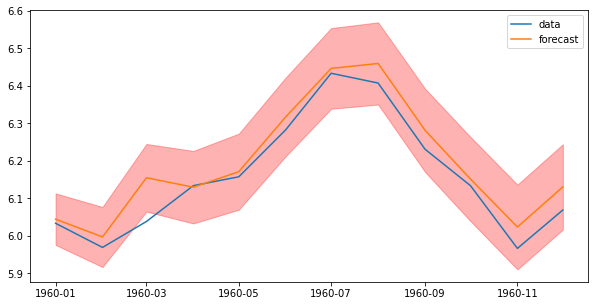

In [87]:
test_pred, confint = logmodel.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(test.index, test["LogPassengers"], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend()

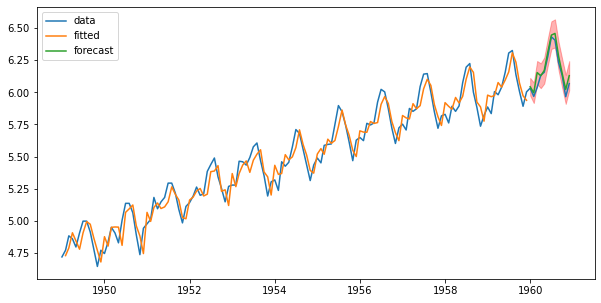

In [88]:
train_pred=model.predict_in_sample(start=1,end=-1)
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df.index,df['LogPassengers'],label='data')
ax.plot(train.index[1:],train_pred,label='fitted')
ax.plot(test.index,test_pred,label='forecast')
ax.fill_between(test.index, \
                confint[:,0],confint[:,1],
                color='red',alpha=0.3)
ax.legend()

In [89]:
rmse(test['Passengers'], np.exp(test_pred))

23.051734622075276

## 3.6 ARIMA 3 - Stocks

In [90]:
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

!pip install pmdarima

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm

df = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)

goog = df[df['Name'] == 'GOOG']['Close']

Ntest = 30
train = goog.iloc[:-Ntest]
test = goog.iloc[-Ntest:]

model = pm.auto_arima(train, error_action = 'ignore',trace = True, surpress_warnings = True,maxiter = 10, seasonal = False)

File ‘sp500sub.csv’ already there; not retrieving.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16270.771, Time=1.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16270.383, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16269.726, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16269.492, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16271.123, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16268.077, Time=0.63 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16267.935, Time=0.81 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=16268.277, Time=0.59 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=16266.968, Time=0.77 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=16264.983, Time=0.66 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=16266.925, Time=0.89 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=16268.907, Time=1.25 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=16265.470, Time=0.27 sec

Best model:  ARIMA(3,1,0)(0,0,0)[

In [91]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(3, 1, 0)   Log Likelihood               -8127.491
Date:                Fri, 14 Jan 2022   AIC                          16264.983
Time:                        10:55:51   BIC                          16293.536
Sample:                             0   HQIC                         16275.409
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3104      0.198      1.571      0.116      -0.077       0.698
ar.L1          0.0378      0.012      3.152      0.002       0.014       0.061
ar.L2         -0.0410      0.013     -3.241      0.001      -0.066      -0.016
ar.L3          0.0488      0.012      4.031      0.000       0.025       0.073
sigma2        85.1623      1.033     82.421      0.000      83.137      87.187
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11790.07
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               6.78   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [92]:
model.get_params()

{'maxiter': 10,
 'method': 'lbfgs',
 'order': (3, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

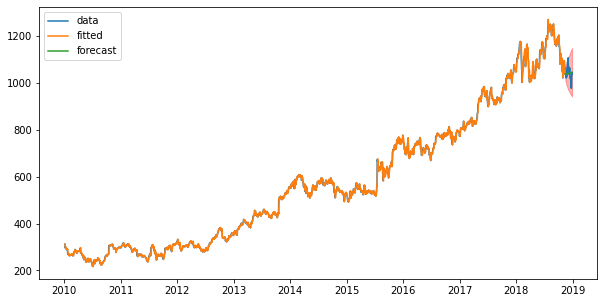

In [93]:
def plot_result(model, fulldata, train, test):
  params = model.get_params()
  d = params['order'][1]

  train_pred = model.predict_in_sample(start = d, end = -1)
  test_pred, confint = model.predict(n_periods = Ntest, return_conf_int = True)

  fig, ax = plt.subplots(figsize = (10, 5))
  ax.plot(fulldata.index, fulldata, label = 'data')
  ax.plot(train.index[d:], train_pred, label = 'fitted')
  ax.plot(test.index, test_pred, label = 'forecast')
  ax.fill_between(test.index, confint[:,0], confint[:,1],
                  color = 'red', alpha = 0.3)
  ax.legend();

plot_result(model, goog, train, test)

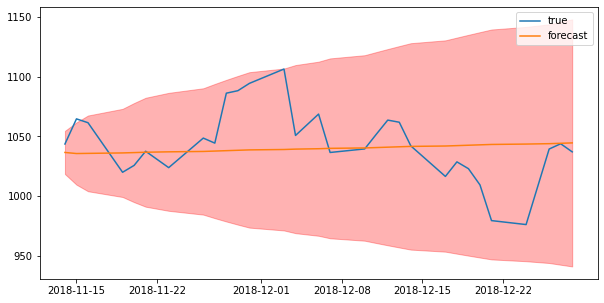

In [94]:
def plot_test(model, test):
  test_pred, confint = model.predict(n_periods = Ntest, return_conf_int = True)

  fig, ax = plt.subplots(figsize = (10, 5))
  ax.plot(test.index, test, label = 'true')
  ax.plot(test.index, test_pred, label = 'forecast')
  ax.fill_between(test.index, confint[:,0], confint[:,1],
                  color = 'red', alpha = 0.3)
  ax.legend();

plot_test(model, test)

In [95]:
def rmse(y, t):
  return np.sqrt(np.mean((t - y)**2))

In [96]:
print("RMSE ARIMA:", rmse(model.predict(Ntest), test))
print("RMSE Naive:", rmse(train.iloc[-1], test))

RMSE ARIMA: 30.4366020122522
RMSE Naive: 30.029502477261502


## 3.7 ACF dan PACF Stocks

File ‘sp500sub.csv’ already there; not retrieving.



/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


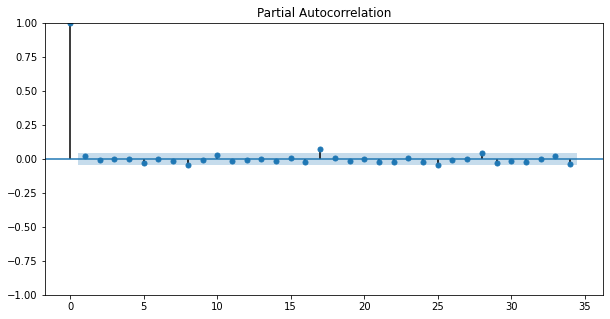

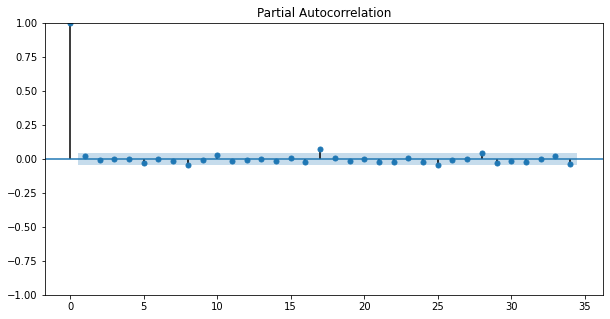

In [97]:
#download file
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

#buat dataframe
df=pd.read_csv("sp500sub.csv", index_col="Date", parse_dates=True)

# buat salinan dataframe yang hanya menampilkan kolom close saja
goog=df[df['Name']=='GOOG'][['Close']].copy() 

#buat fungsi
def log_ret(price):
  log_price=np.log(price)
  return log_price.diff()

#buat dan mengisi kolom baru, menggunakan fungsi di atas
goog['LogRet']=log_ret(goog['Close'])

#buat variable untuk plot
fig,ax=plt.subplots(figsize=(10,5))

#buat plot pacf dengan kolom logret dihapus
plot_pacf(goog['LogRet'].dropna(),ax=ax)

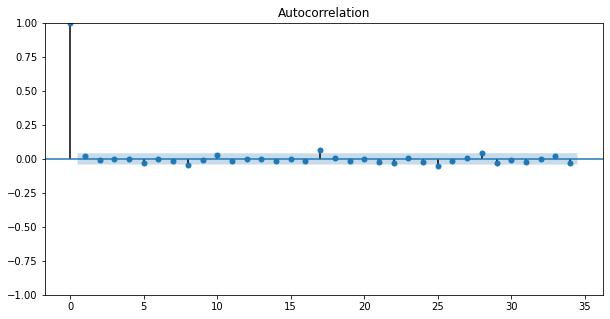

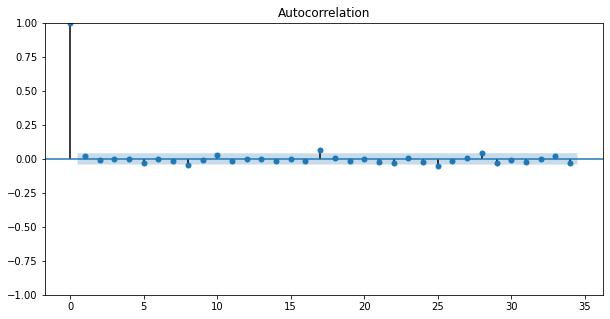

In [98]:
#buat variable untuk plot
fig,ax=plt.subplots(figsize=(10,5))

#buat plot pacf dengan kolom logret dihapus
plot_acf(goog['LogRet'].dropna(),ax=ax)

## 3.8 ARIMA Champagne

In [99]:
#install
!pip install pmdarima
!pip install -U statsmodels

#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

#download file
!wget -nc https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv

#buat dataframe
df=pd.read_csv("perrin-freres-monthly-champagne.csv", index_col="Month", skipfooter=2, parse_dates=True)

#buat nama kolom, karena display di atas tidak ada nama kolomnya
df.columns=['Sales']

#buat kolom baru
df['LogSales']=np.log(df['Sales'])

#Ubah freq menjadi "MS"
df.index.freq="MS"

#buat variable untuk data train dan testing
Ntest=12
train=df.iloc[:-Ntest] #di atas tail(12)
test=df.iloc[-Ntest:] #sama aja kaya tail(12)

#ubah tipe variable train dan test menjadi boolean
train_idx=df.index<=train.index[-1]
test_idx=df.index>train.index[-1]

File ‘perrin-freres-monthly-champagne.csv’ already there; not retrieving.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


### 3.8.1 Model Seasonal

In [100]:
#buat model
model=pm.auto_arima(train['LogSales'],trace=True,supress_warnings=True,seasonal=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-50.266, Time=2.01 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-41.975, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-54.968, Time=0.47 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-53.384, Time=0.41 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-34.700, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-44.102, Time=0.05 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-52.971, Time=1.27 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=-52.991, Time=0.69 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-55.117, Time=0.39 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=-53.123, Time=0.87 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=3.02 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-50.817, Time=0.41 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=-56.123, Time=0.56 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=-44.178, Time=0.12 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   

Score R2:


0.9546942228798783

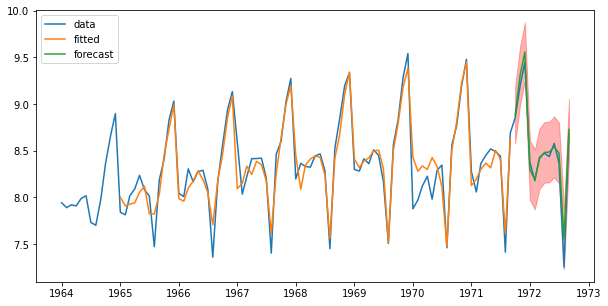

In [101]:
#buat variable
train_pred=model.predict_in_sample(start=12,end=-1)
test_pred,confint=model.predict(n_periods=Ntest,return_conf_int=True)

#buat plot
fig,ax=plt.subplots(figsize=(10,5))
#a.plot untuk data asli
ax.plot(df.index,df['LogSales'],label='data')
#b.plot untuk data training
ax.plot(train.index[12:],train_pred,label='fitted')
#c.plot untuk data testing
ax.plot(test.index,test_pred,label='forecast')
#d.buat pewarnaan background/area
ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)

#display
ax.legend()

#buat r2
print("Score R2:")
r2_score(test['Sales'],np.exp(test_pred))

### 3.8.2 Model Non-seasonal

In [102]:
#buat model
model=pm.auto_arima(train['LogSales'],trace=True,max_p=12,max_q=2,max_order=14,supress_warnings=True,seasonal=False,stepwise=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=141.911, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=141.540, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=139.851, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=138.023, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=114.336, Time=0.11 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=114.576, Time=0.26 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=114.173, Time=0.15 

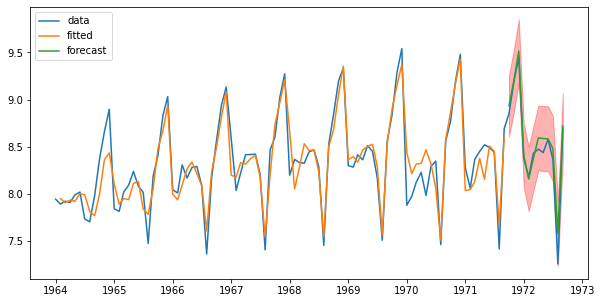

In [103]:
#buat variable
train_pred=model.predict_in_sample(start=1,end=-1)
test_pred,confint=model.predict(n_periods=Ntest,return_conf_int=True)

#buat plot
fig,ax=plt.subplots(figsize=(10,5))
#a.plot untuk data asli
ax.plot(df.index,df['LogSales'],label='data')
#b.plot untuk data training
ax.plot(train.index[1:],train_pred,label='fitted')
#c.plot untuk data testing
ax.plot(test.index,test_pred,label='forecast')
#d.buat pewarnaan background/area
ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)

#display
ax.legend()

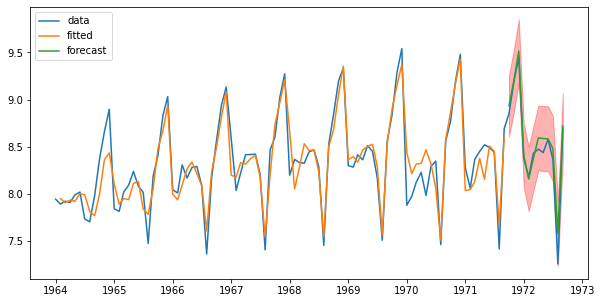

In [104]:
#buat variable
train_pred=model.predict_in_sample(start=1,end=-1)
test_pred,confint=model.predict(n_periods=Ntest,return_conf_int=True)

#buat plot
fig,ax=plt.subplots(figsize=(10,5))
#a.plot untuk data asli
ax.plot(df.index,df['LogSales'],label='data')
#b.plot untuk data training
ax.plot(train.index[1:],train_pred,label='fitted')
#c.plot untuk data testing
ax.plot(test.index,test_pred,label='forecast')
#d.buat pewarnaan background/area
ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)

#display
ax.legend()

In [105]:
#buat r2
print("Score R2 Non Seasonal:")
r2_score(test['Sales'],np.exp(test_pred))

Score R2 Non Seasonal:


0.9716946486242174

### 3.8.3 Plot ACF

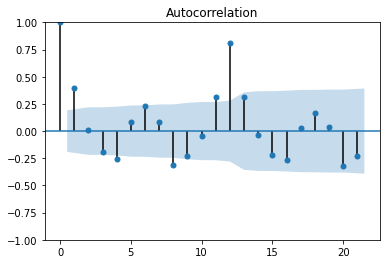

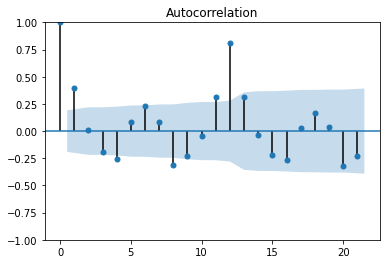

In [106]:
plot_acf(df['LogSales'])

### 3.8.4 Plot PACF

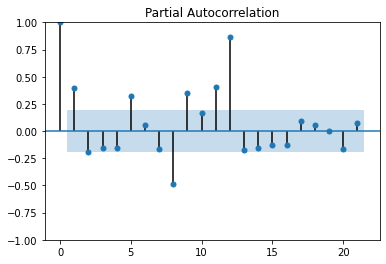

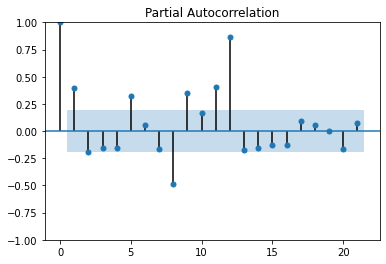

In [107]:
#untuk mendapatkan weird sqrt error dengan default method
plot_pacf(df['LogSales'], method='ols')

# Bagian 4 - Machine Learning Methods

## 4.1 Extrapolation and Stock Prices

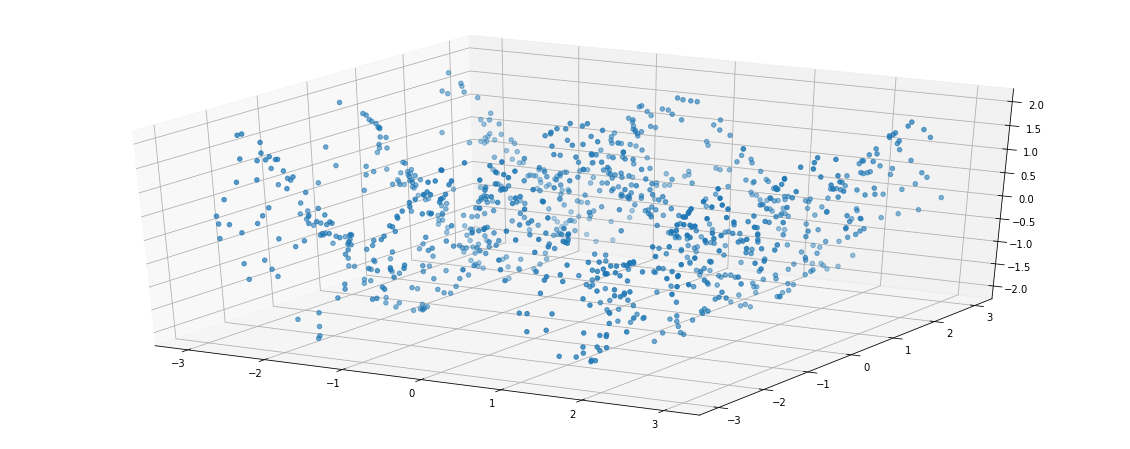

In [108]:
#import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

#buat dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 #terdistribusi merata antara (-3, +3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

#plot dari dataset di atas
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y);

### 4.1.1 SVR

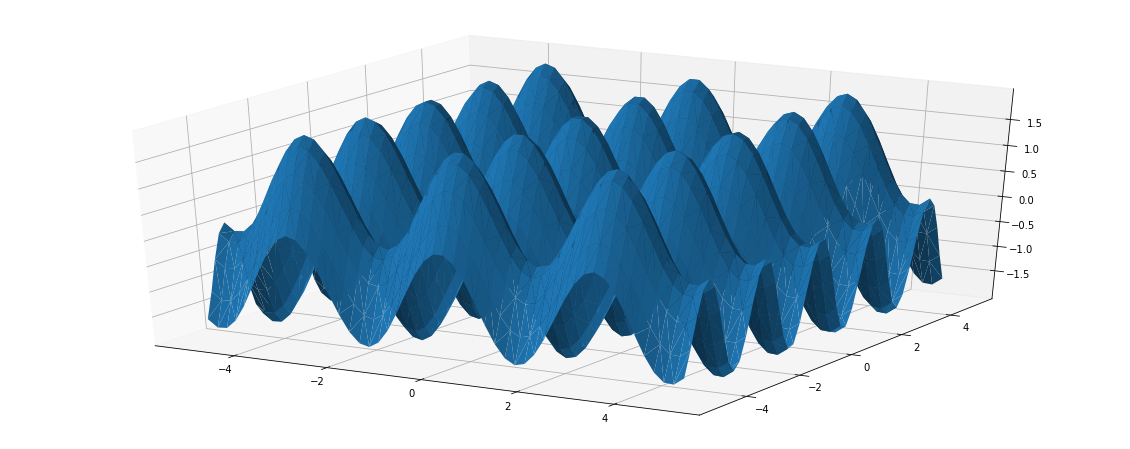

In [109]:
#Tampilan dengan menggunakan rumus yang sebenarnya
#Apakah bisa di exptrapolation juga?
#Plot prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X[:,0], X[:,1], Y)

#Plot surface
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Ytrue = np.cos(2*Xgrid[:,0]) + np.cos(3*Xgrid[:,1]) ### the true function
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Ytrue, linewidth=0.2, antialiased=True)
plt.show()

### 4.1.2 Random Forest Regression

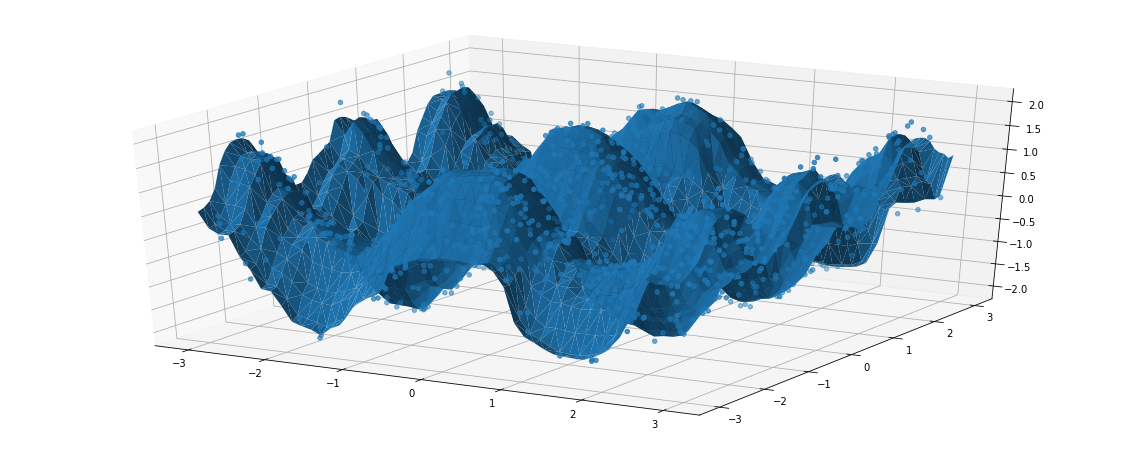

In [110]:
#Buat model fit RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, Y);

#Plot prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

#Plot surface
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True);

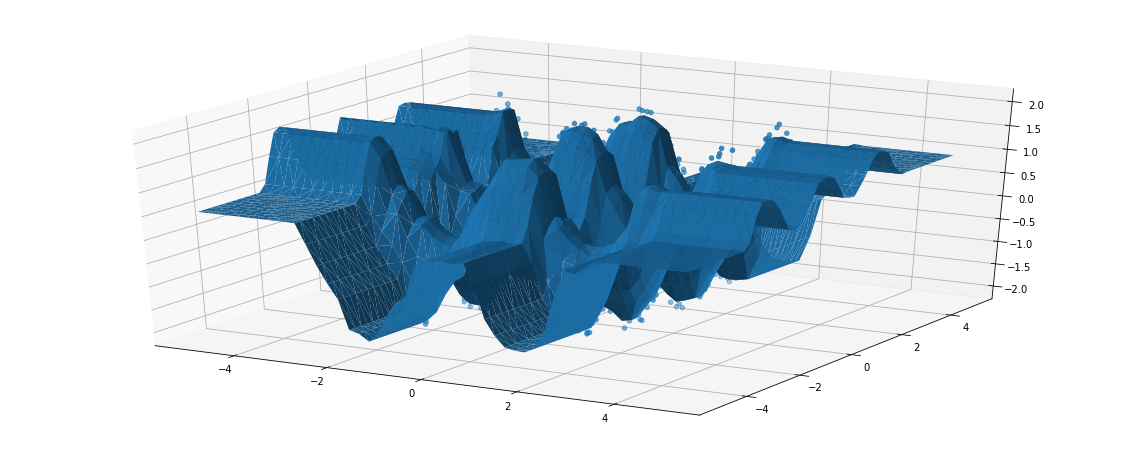

In [111]:
#Apakah bisa di extrapolation?
#Plot prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

#Plot surface
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

### 4.1.3 Multilayer Perceptron Regressor (MLP Regressor)

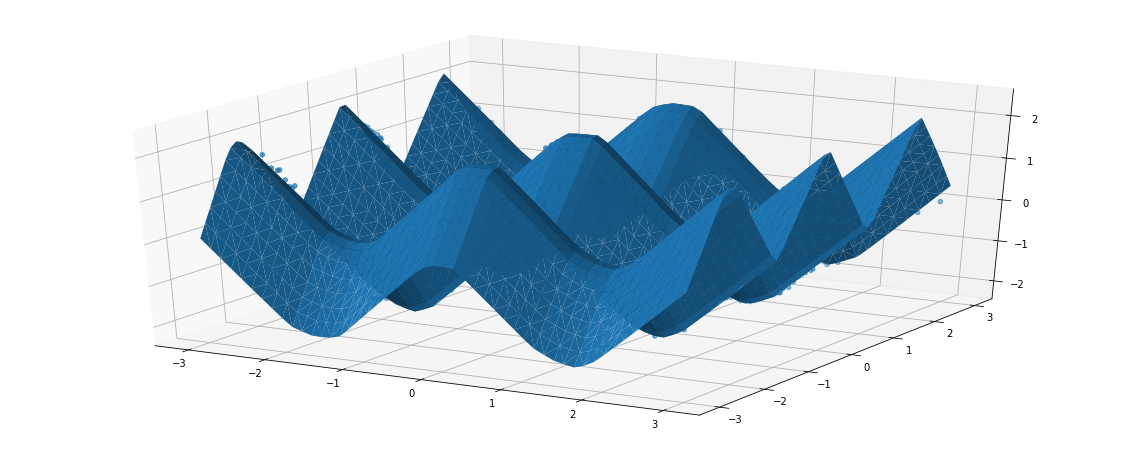

In [112]:
#Buat model fit MLP Regressor
model = MLPRegressor(hidden_layer_sizes=128, alpha=0., learning_rate_init=0.01)
model.fit(X, Y);

#Plot prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

#Plot surface
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True);

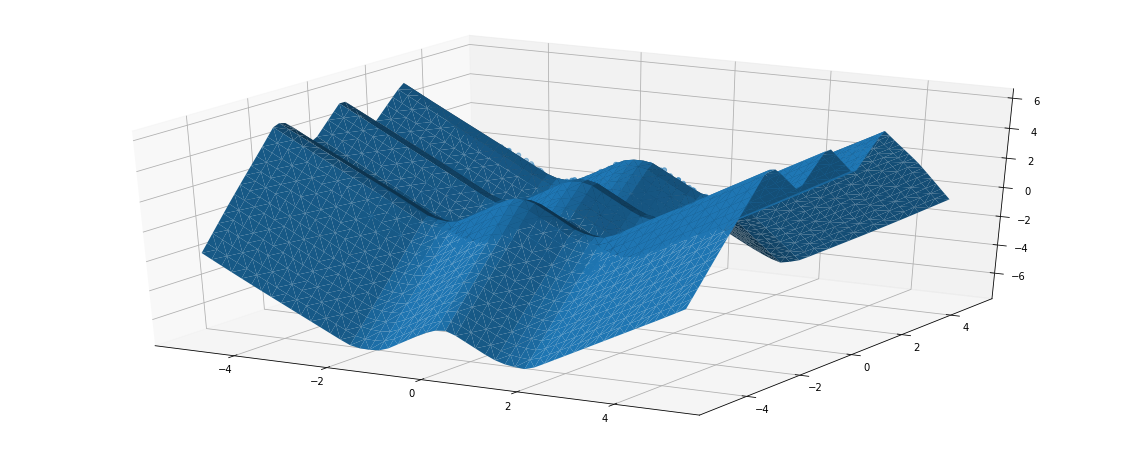

In [113]:
#Apakah bisa di extrapolation?
#Plot prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

#Plot surface
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

### 4.1.4 Contoh untuk Stock Prices

File ‘SPY.csv’ already there; not retrieving.



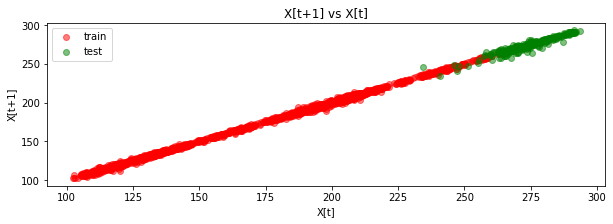

In [114]:
#Download file
!wget -nc https://lazyprogrammer.me/course_files/SPY.csv

#Buat dataframe
df = pd.read_csv('SPY.csv', index_col='Date', parse_dates=True)

#Buat variable untuk data training dan testing
train = df.iloc[:2000]['Close'].to_numpy() # membuat data training menjadi 2000
test = df.iloc[2000:]['Close'].to_numpy() # membuat data testing menjadi 263

# Note: Total data 2263
# Data training dengan [:2000] => maka akan menjadi 2000 data
# Data testing dengan [2000:] => maka akan menjadi 263 data, karena sisa dari 2000 adalah 263

#Buat array xtrain
Xtrain = []

#Buat perulangan untuk data training
for t in range(len(train) - 1):
  x0 = train[t]
  x1 = train[t + 1]
  Xtrain.append((x0, x1))

#Buat array xtest
Xtest = []

#Buat perulangan untuk data testing
for t in range(len(test) - 1):
  x0 = test[t]
  x1 = test[t + 1]
  Xtest.append((x0, x1))

#Note: Xtrain dan Xtest dibuat 2 kolom, agar mudah untuk dibuat plot antara data training dan testing

#Ubah array menjadi ndarray (arraynya numpy)
Xtrain = np.array(Xtrain)
Xtest = np.array(Xtest)

#Buat plot yang menggambarkan data training dan testing
plt.figure(figsize=(10, 3))
plt.xlabel("X[t]")
plt.ylabel("X[t+1]")
plt.title("X[t+1] vs X[t]")
plt.scatter(Xtrain[:,0], Xtrain[:,1], c='r', alpha=0.5, label='train')
plt.scatter(Xtest[:,0], Xtest[:,1], c='g', alpha=0.5, label='test')
plt.legend();

## 4.2 ML Airline

### 4.2.1 ML Airline - No differencing

In [115]:
#Install
!pip install -U scikit-learn

#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, r2_score

#Download File
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

#Buat dataframe
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

#Buat kolom baru di dataframe
df['LogPassengers'] = np.log(df['Passengers'])

#Buat variable baru untuk data training dan testing
Ntest = 12
train = df.iloc[:-Ntest] # data < tail(12)
test = df.iloc[-Ntest:] # data = tail(12)

# Buat supervised dataset, dan lihat apakah kita dapat menggunakan nilai "T-past" untuk memprediksi nilai selanjutnya?
series = df['LogPassengers'].to_numpy()

#Buat variable
T = 10
X = [] # array X
Y = [] # array Y

#Buat perulangan
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

#Ubah menjadi ndarray, dan lakukan reshape
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)

#Buat Variable untuk data training dan testing
Xtrain, Ytrain = X[:-Ntest], Y[:-Ntest]
Xtest, Ytest = X[-Ntest:], Y[-Ntest:]

File ‘airline_passengers.csv’ already there; not retrieving.



#### 4.2.1.1 Linear Regression

In [116]:
#Buat model
lr = LinearRegression()

#Fit model
lr.fit(Xtrain, Ytrain)

#Display score dari model
print("Score model untuk data training:", lr.score(Xtrain, Ytrain))
print("Score model untuk data testing:", lr.score(Xtest, Ytest))

Score model untuk data training: 0.9599443783339898
Score model untuk data testing: 0.6910953044565602


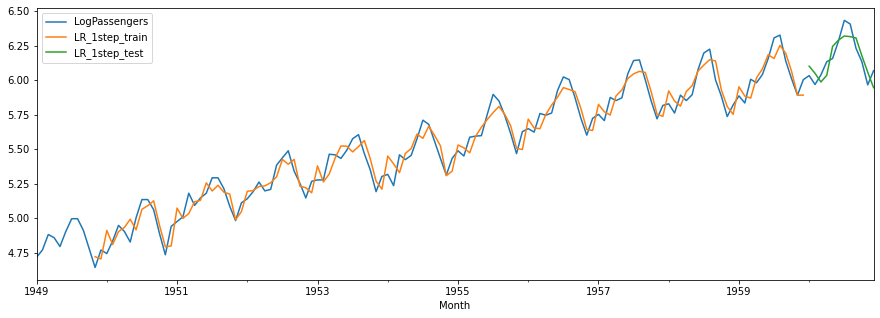

In [117]:
#Boolean index
#Buat variable
train_idx = df.index <= train.index[-1]
test_idx = ~train_idx

train_idx[:T] = False # nilai T pertama tidak dapat diprediksi

#1-step forecast
df.loc[train_idx, 'LR_1step_train'] = lr.predict(Xtrain)
df.loc[test_idx, 'LR_1step_test'] = lr.predict(Xtest)

#Plot dari 1-step forecast
df[['LogPassengers', 'LR_1step_train', 'LR_1step_test']].plot(figsize=(15, 5));

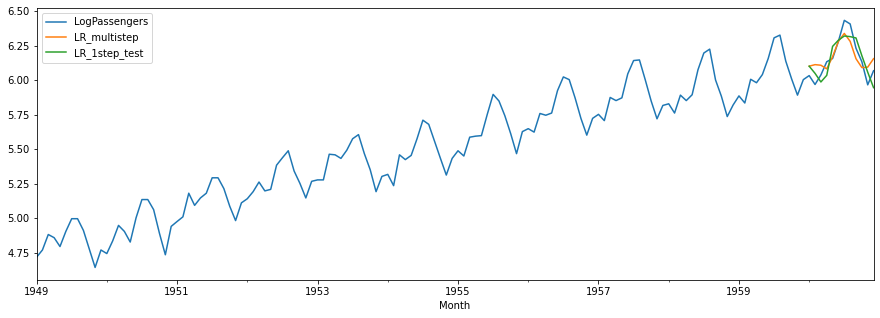

In [118]:
#Multi-step forecast
multistep_predictions = []

#Input data testing pertama (index=0)
last_x = Xtest[0]

#Buat perulangan
while len(multistep_predictions) < Ntest:
  p = lr.predict(last_x.reshape(1, -1))[0]
  
  #Update predictions list
  multistep_predictions.append(p)
  
  #Buat inputan baru
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

#Simpan multi-step forecast ke dalam dataframe
df.loc[test_idx, 'LR_multistep'] = multistep_predictions

#Buat plot 1-step forecast dan multi-step forecast
df[['LogPassengers', 'LR_multistep', 'LR_1step_test']].plot(figsize=(15, 5));

In [119]:
#Buat multi-output supervised dataset

#Buat variable
Tx = T
Ty = Ntest

#Buat array
X = []
Y = []

#Buat perulangan
for t in range(len(series) - Tx - Ty + 1):
  x = series[t:t+Tx]
  X.append(x)
  y = series[t+Tx:t+Tx+Ty]
  Y.append(y)

#Buat variable
X = np.array(X).reshape(-1, Tx)
Y = np.array(Y).reshape(-1, Ty)
N = len(X)

#Buat variable untuk data training dan testing
Xtrain_m, Ytrain_m = X[:-1], Y[:-1]
Xtest_m, Ytest_m = X[-1:], Y[-1:]

#Buat model
lr = LinearRegression()

#Fit model
lr.fit(Xtrain_m, Ytrain_m)

#Tampilkan score model untuk data training
print("Score model untuk data training terbaru:", lr.score(Xtrain_m, Ytrain_m))

Score model untuk data training terbaru: 0.9734607773512528


In [120]:
# SST = 0
lr.score(Xtest_m, Ytest_m)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan

In [121]:
#Hitung score r2
print("Score R2:", r2_score(lr.predict(Xtest_m).flatten(), Ytest_m.flatten()))

Score R2: 0.8018749676715189


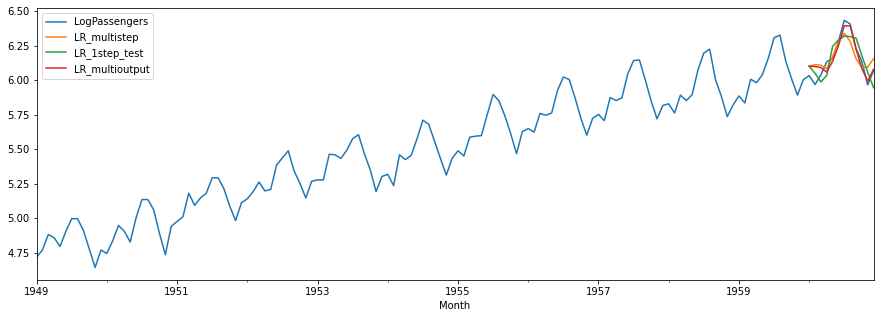

In [122]:
#Simpan multi-output forecast ke dalam dataframe
df.loc[test_idx, 'LR_multioutput'] = lr.predict(Xtest_m).flatten()

#Plot untuk semua forecast
cols = ['LogPassengers', 'LR_multistep', 'LR_1step_test', 'LR_multioutput']
df[cols].plot(figsize=(15, 5));

In [123]:
#Hitung MAPE
mape1 = mean_absolute_percentage_error(Ytest, multistep_predictions)
print("multi-step MAPE:", mape1)
mape2 = mean_absolute_percentage_error(Ytest, df.loc[test_idx, 'LR_multioutput'])
print("multi-output MAPE:", mape2)

multi-step MAPE: 0.012229325023475299
multi-output MAPE: 0.007178924475039815


#### 4.2.1.2 Random Forest Regression

In [124]:
#Buat fungsi
def one_step_and_multistep_forecast(model, name):
  #Fit model
  model.fit(Xtrain, Ytrain)
  
  #Display 1-step forecast
  print("1-step forecast:", name)
  
  #Display r2 score untuk data training dari 1-step forecast
  print("Train R^2:", model.score(Xtrain, Ytrain))

  #Display r2 score untuk data testing dari 1-step forecast
  print("Test R^2 (1-step):", model.score(Xtest, Ytest))

  #1-step forecast
  df.loc[train_idx, f'{name}_1step_train'] = model.predict(Xtrain)
  df.loc[test_idx, f'{name}_1step_test'] = model.predict(Xtest)

  #Buat multi-step forecast
  multistep_predictions = []

  #Lakukan input dengan menggunakan data testing pertama (index=0)
  last_x = Xtest[0]

  #Buat perulangan
  while len(multistep_predictions) < Ntest:
    p = model.predict(last_x.reshape(1, -1))[0]
    
    #Update predictions list
    multistep_predictions.append(p)
    
    #Buat inputan terbaru
    last_x = np.roll(last_x, -1)
    last_x[-1] = p
  
  #Multi-step forecast
  df.loc[test_idx, f'{name}_multistep_test'] = multistep_predictions

  #MAPE multi-step forecast
  mape = mean_absolute_percentage_error(Ytest, multistep_predictions)
  print("Test MAPE (multi-step):", mape)

  #Plot 1-step dan multi-step forecast
  cols = [
    'LogPassengers',
    f'{name}_1step_train',
    f'{name}_1step_test',
    f'{name}_multistep_test'
  ]
  df[cols].plot(figsize=(15, 5));

1-step forecast: RF
Train R^2: 0.9888751797451002
Test R^2 (1-step): 0.1743065980370221
Test MAPE (multi-step): 0.031091803614778177


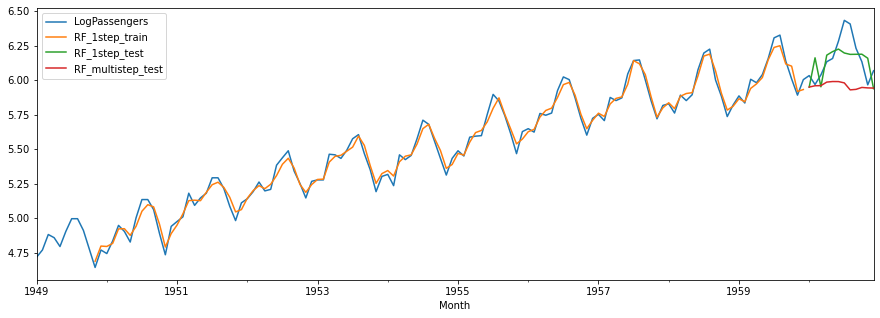

In [125]:
#Tes fungsi di atas menggunakan RF
one_step_and_multistep_forecast(RandomForestRegressor(), "RF")

In [126]:
#Buat fungsi kedua
def multi_output_forecast(model, name):
  #Buat model
  model.fit(Xtrain_m, Ytrain_m)
  
  #Simpan multi-output forecast ke dalam dataframe
  df.loc[test_idx, f'{name}_multioutput'] = model.predict(Xtest_m).flatten()

  #Hitung MAPE
  mape = mean_absolute_percentage_error(Ytest, df.loc[test_idx, f'{name}_multioutput'])
  #Display MAPE
  print("Test MAPE (multi-output):", mape)

  #Plot semua forecasts
  #Asumsikan bahwa fungsi sebelumnya telah dijalankan
  cols = [
    'LogPassengers',
    f'{name}_1step_train',
    f'{name}_1step_test',
    f'{name}_multistep_test',
    f'{name}_multioutput',
  ]
  df[cols].plot(figsize=(15, 5));

Test MAPE (multi-output): 0.016154836757506497


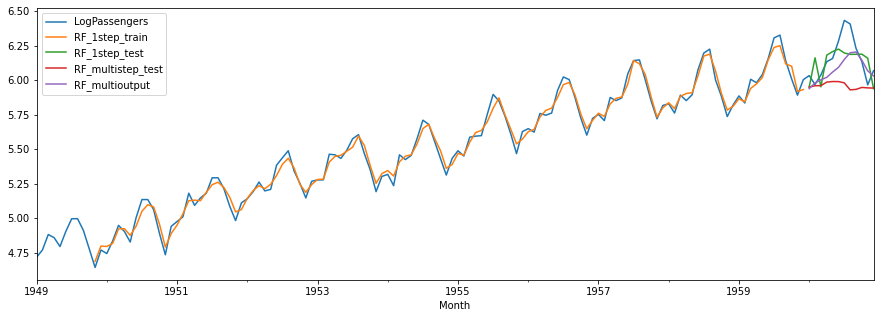

In [127]:
#Tes fungsi di atas menggunakan RF
multi_output_forecast(RandomForestRegressor(), "RF")

### 4.2.2 ML -Airline - Differencing

In [128]:
#Install
!pip install -U scikit-learn

#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, r2_score

#Download file
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

#Buat dataframe
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

#Buat kolom baru
df['LogPassengers'] = np.log(df['Passengers'])
df['DiffLogPassengers'] = df['LogPassengers'].diff()

#Buat variable baru untuk data training dan testing
Ntest = 12
train = df.iloc[:-Ntest] # data < tail(12)
test = df.iloc[-Ntest:] # data = tail(12)

#Buat supervised dataset
#Mari lihat apakah kita dapat menggunakan nilai T-past untuk memprediksi nilai selanjutnya 
series = df['DiffLogPassengers'].to_numpy()[1:]

#Buat variable dan array
T = 10
X = []
Y = []

#Buat perulangan untuk mengisi array X dan Y
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

#Ubah menjadi ndarray dan lakukan reshape
X = np.array(X).reshape(-1, T)
Y = np.array(Y)

#Hitung banyaknya data dari array X
N = len(X)

#Buat variable untuk data training dan testing
Xtrain, Ytrain = X[:-Ntest], Y[:-Ntest]
Xtest, Ytest = X[-Ntest:], Y[-Ntest:]

File ‘airline_passengers.csv’ already there; not retrieving.



#### 4.2.2.1 Linear Regression

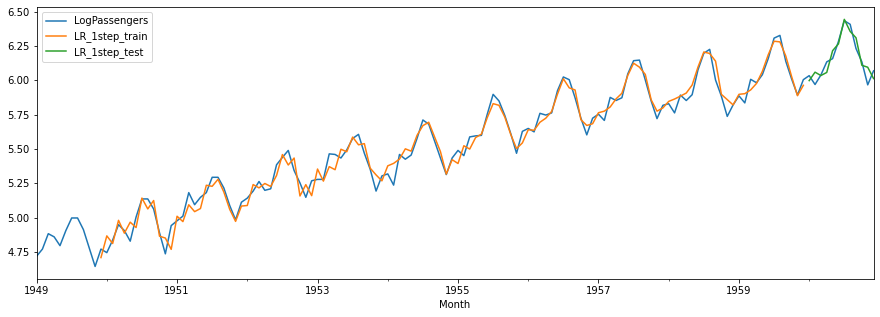

In [129]:
#Buat model
lr = LinearRegression()

#Fit model
lr.fit(Xtrain, Ytrain)

#Boolean index
#Buat variable
train_idx = df.index <= train.index[-1]
test_idx = ~train_idx

train_idx[:T+1] = False # nilai T pertama tidak dapat diprediksi

#Dibutuhkan untuk menghitung prediksi yang tidak berbeda
#1.Buat kolom baru
df['ShiftLogPassengers'] = df['LogPassengers'].shift(1) # => shift adalah fungsi untuk menggeser posisi sesuai yang kita inginkan
#2.Buat variable baru
prev = df['ShiftLogPassengers']

#Buat variable untuk menampung nilai terakhir di data training
last_train = train.iloc[-1]['LogPassengers']

#1-step forecast
df.loc[train_idx, 'LR_1step_train'] = prev[train_idx] + lr.predict(Xtrain)
df.loc[test_idx, 'LR_1step_test'] = prev[test_idx] + lr.predict(Xtest)

#Plot 1-step forecast
df[['LogPassengers', 'LR_1step_train', 'LR_1step_test']].plot(figsize=(15, 5));

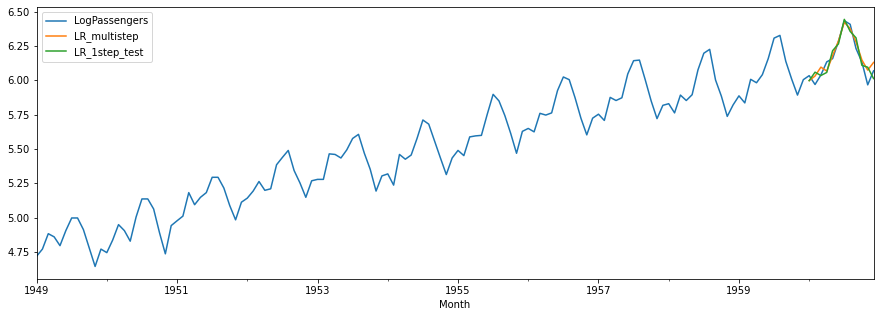

In [130]:
#Multi-step forecast
multistep_predictions = []

#Buat variable untuk input nilai pertama data testing
last_x = Xtest[0]

#Buat perulangan
while len(multistep_predictions) < Ntest:
  #Buat variable
  p = lr.predict(last_x.reshape(1, -1))[0]
  
  #Update predictions list
  multistep_predictions.append(p)
  
  #Buat input baru
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

#Simpan multi-step forecast ke dalam dataframe
df.loc[test_idx, 'LR_multistep'] = last_train + np.cumsum(multistep_predictions)

#Plot 1-step and multi-step forecast
df[['LogPassengers', 'LR_multistep', 'LR_1step_test']].plot(figsize=(15, 5));

In [131]:
#Buat multi-output supervised dataset

#Buat variable
Tx = T
Ty = Ntest

#Buat array
X = []
Y = []

#Buat perulangan
for t in range(len(series) - Tx - Ty + 1):
  x = series[t:t+Tx]
  X.append(x)
  y = series[t+Tx:t+Tx+Ty]
  Y.append(y)

#Ubah data menjadi ndarray dan reshape
X = np.array(X).reshape(-1, Tx)
Y = np.array(Y).reshape(-1, Ty)

#Buat variable untuk mengetahui jumlah data array X
N = len(X)

#Buat variable untuk data training dan testing
Xtrain_m, Ytrain_m = X[:-1], Y[:-1]
Xtest_m, Ytest_m = X[-1:], Y[-1:]

#Buat model
lr = LinearRegression()

#Fit model
lr.fit(Xtrain_m, Ytrain_m)

#Score model
print("Score model LR:", lr.score(Xtrain_m, Ytrain_m))

Score model LR: 0.8141637147930583


In [132]:
#Hitung R2
print("Score R2:", r2_score(lr.predict(Xtest_m).flatten(), Ytest_m.flatten()))

Score R2: 0.7690077978619654


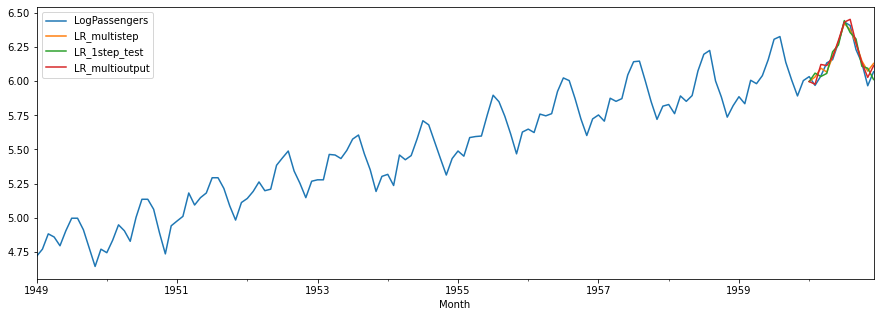

In [133]:
#Simpan multi-output forecast ke dalam dataframe
df.loc[test_idx, 'LR_multioutput'] = last_train + np.cumsum(lr.predict(Xtest_m).flatten())

#Plot semua forecasts
cols = ['LogPassengers', 'LR_multistep', 'LR_1step_test', 'LR_multioutput']
df[cols].plot(figsize=(15, 5));

In [134]:
# MAPE
test_log_pass = df.iloc[-Ntest:]['LogPassengers']
mape1 = mean_absolute_percentage_error(test_log_pass, df.loc[test_idx, 'LR_multistep'])
print("multi-step MAPE:", mape1)
mape2 = mean_absolute_percentage_error(test_log_pass, df.loc[test_idx, 'LR_multioutput'])
print("multi-output MAPE:", mape2)

multi-step MAPE: 0.007109281288502525
multi-output MAPE: 0.005245261617574867


#### 4.2.2.2 Support Vector Regression

One-step forecast: SVR
Test MAPE (multi-step): 0.012149122102392764


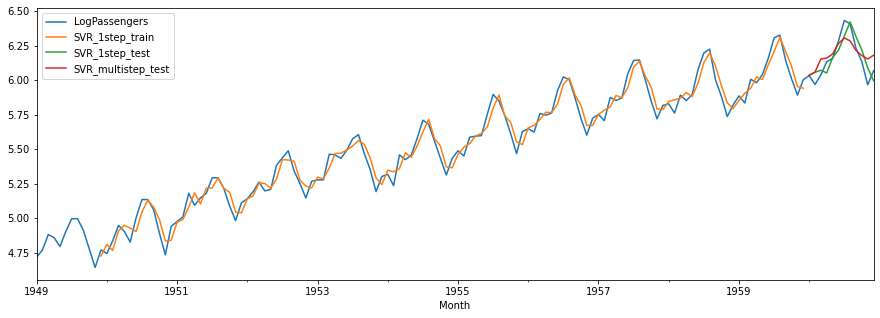

In [135]:
def one_step_and_multistep_forecast(model, name):
  model.fit(Xtrain, Ytrain)
  print("One-step forecast:", name)
  # print("Train R^2:", model.score(Xtrain, Ytrain))
  # print("Test R^2 (1-step):", model.score(Xtest, Ytest))

  # store 1-step forecast
  df.loc[train_idx, f'{name}_1step_train'] = \
    prev[train_idx] + model.predict(Xtrain)
  df.loc[test_idx, f'{name}_1step_test'] = \
    prev[test_idx] + model.predict(Xtest)

  # generate multi-step forecast
  multistep_predictions = []

  # first test input
  last_x = Xtest[0]

  while len(multistep_predictions) < Ntest:
    p = model.predict(last_x.reshape(1, -1))[0]
    
    # update the predictions list
    multistep_predictions.append(p)
    
    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p
  
  # store multi-step forecast
  df.loc[test_idx, f'{name}_multistep_test'] = \
    last_train + np.cumsum(multistep_predictions)

  # MAPE of multi-step forecast
  mape = mean_absolute_percentage_error(
      test_log_pass, df.loc[test_idx, f'{name}_multistep_test'])
  print("Test MAPE (multi-step):", mape)

  # plot 1-step and multi-step forecast
  cols = [
    'LogPassengers',
    f'{name}_1step_train',
    f'{name}_1step_test',
    f'{name}_multistep_test'
  ]
  df[cols].plot(figsize=(15, 5));

#Tes fungsi dengan SVR
one_step_and_multistep_forecast(SVR(), "SVR")

Test MAPE (multi-output): 0.010731361803536803


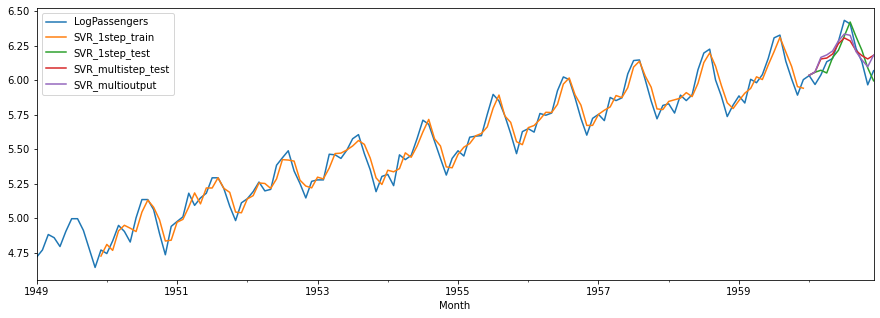

In [136]:
def multi_output_forecast(model, name):
  model.fit(Xtrain_m, Ytrain_m)
  
  # save multi-output forecast to dataframe
  df.loc[test_idx, f'{name}_multioutput'] = \
    last_train + np.cumsum(model.predict(Xtest_m).flatten())
  
  mape = mean_absolute_percentage_error(
      test_log_pass, df.loc[test_idx, f'{name}_multioutput'])
  print("Test MAPE (multi-output):", mape)

  # plot all forecasts
  # assume that previous functions have been run
  cols = [
    'LogPassengers',
    f'{name}_1step_train',
    f'{name}_1step_test',
    f'{name}_multistep_test',
    f'{name}_multioutput',
  ]
  df[cols].plot(figsize=(15, 5));

class SVRWrapper:
  def __init__(self, h, **args):
    self.h = h
    self.models = [SVR(**args) for _ in range(h)]
  
  def fit(self, X, Y):
    for k in range(self.h):
      self.models[k].fit(X, Y[:, k])
  
  def predict(self, X):
    P = [m.predict(X) for m in self.models]
    return np.hstack(P)

multi_output_forecast(SVRWrapper(Ntest), "SVR")

#### 4.2.2.3 Random Forest Regression

One-step forecast: RF
Test MAPE (multi-step): 0.0063474394997071635


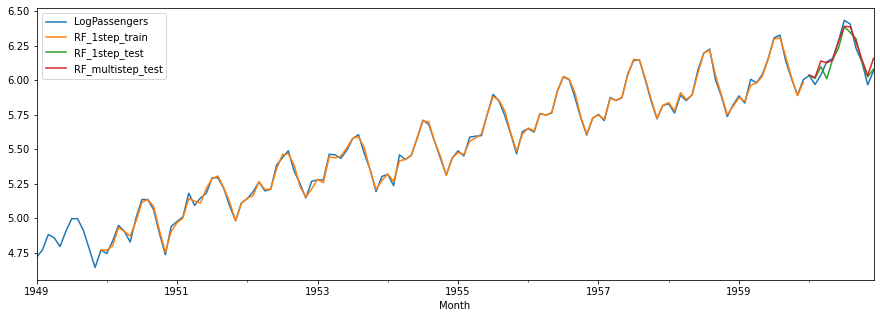

In [137]:
def one_step_and_multistep_forecast(model, name):
  model.fit(Xtrain, Ytrain)
  print("One-step forecast:", name)
  # print("Train R^2:", model.score(Xtrain, Ytrain))
  # print("Test R^2 (1-step):", model.score(Xtest, Ytest))

  # store 1-step forecast
  df.loc[train_idx, f'{name}_1step_train'] = \
    prev[train_idx] + model.predict(Xtrain)
  df.loc[test_idx, f'{name}_1step_test'] = \
    prev[test_idx] + model.predict(Xtest)

  # generate multi-step forecast
  multistep_predictions = []

  # first test input
  last_x = Xtest[0]

  while len(multistep_predictions) < Ntest:
    p = model.predict(last_x.reshape(1, -1))[0]
    
    # update the predictions list
    multistep_predictions.append(p)
    
    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p
  
  # store multi-step forecast
  df.loc[test_idx, f'{name}_multistep_test'] = \
    last_train + np.cumsum(multistep_predictions)

  # MAPE of multi-step forecast
  mape = mean_absolute_percentage_error(
      test_log_pass, df.loc[test_idx, f'{name}_multistep_test'])
  print("Test MAPE (multi-step):", mape)

  # plot 1-step and multi-step forecast
  cols = [
    'LogPassengers',
    f'{name}_1step_train',
    f'{name}_1step_test',
    f'{name}_multistep_test'
  ]
  df[cols].plot(figsize=(15, 5));

#Tes fungsi dengan RandomForest
one_step_and_multistep_forecast(RandomForestRegressor(), "RF")

Test MAPE (multi-output): 0.0050472495626258254


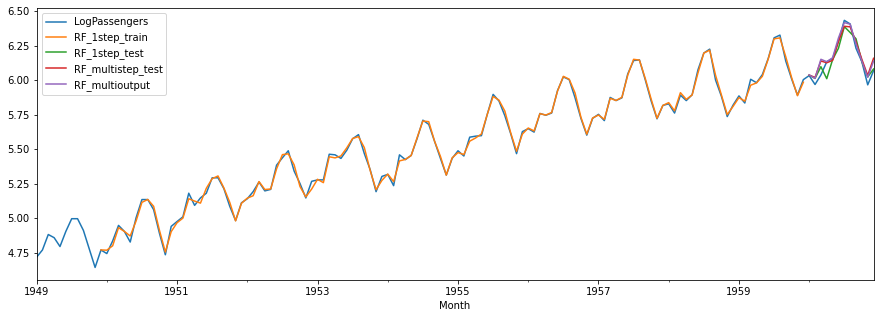

In [138]:
def multi_output_forecast(model, name):
  model.fit(Xtrain_m, Ytrain_m)
  
  # save multi-output forecast to dataframe
  df.loc[test_idx, f'{name}_multioutput'] = \
    last_train + np.cumsum(model.predict(Xtest_m).flatten())
  
  mape = mean_absolute_percentage_error(
      test_log_pass, df.loc[test_idx, f'{name}_multioutput'])
  print("Test MAPE (multi-output):", mape)

  # plot all forecasts
  # assume that previous functions have been run
  cols = [
    'LogPassengers',
    f'{name}_1step_train',
    f'{name}_1step_test',
    f'{name}_multistep_test',
    f'{name}_multioutput',
  ]
  df[cols].plot(figsize=(15, 5));

multi_output_forecast(RandomForestRegressor(), "RF")

## 4.3 ML Champagne

#### 4.3.1 Linear Regression

In [139]:
#Install
!pip install -U scikit-learn

#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# download file
!wget -nc https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv

#Buat dataframe
df = pd.read_csv('perrin-freres-monthly-champagne.csv',index_col='Month',skipfooter=2,parse_dates=True)

df.columns = ['Sales']

#Buat kolom baru
df['LogSales'] = np.log(df['Sales'])

#Buat variable baru untuk data training dan testing
Ntest = 12
train = df.iloc[:-Ntest] # data < tail(12)
test = df.iloc[-Ntest:] # data = tail(12)

#Buat supervised dataset
#Mari lihat apakah kita dapat menggunakan nilai T-past untuk memprediksi nilai selanjutnya 
series = df['LogSales'].to_numpy()[1:]

#Buat variable dan array
T = 12
X = []
Y = []

#Buat perulangan untuk mengisi array X dan Y
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

#Ubah menjadi ndarray dan lakukan reshape
X = np.array(X).reshape(-1, T)
Y = np.array(Y)

#Hitung banyaknya data dari array X
N = len(X)

#Buat variable untuk data training dan testing
Xtrain, Ytrain = X[:-Ntest], Y[:-Ntest]
Xtest, Ytest = X[-Ntest:], Y[-Ntest:]

#Buat model
lr = LinearRegression()

#Fit model
lr.fit(Xtrain, Ytrain)

#Display score dari model
print("Score model LR data train:", lr.score(Xtrain, Ytrain))
print("Score model LR data test:", lr.score(Xtest, Ytest))

File ‘perrin-freres-monthly-champagne.csv’ already there; not retrieving.

Score model LR data train: 0.8716534207954165
Score model LR data test: 0.9639502198549218


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


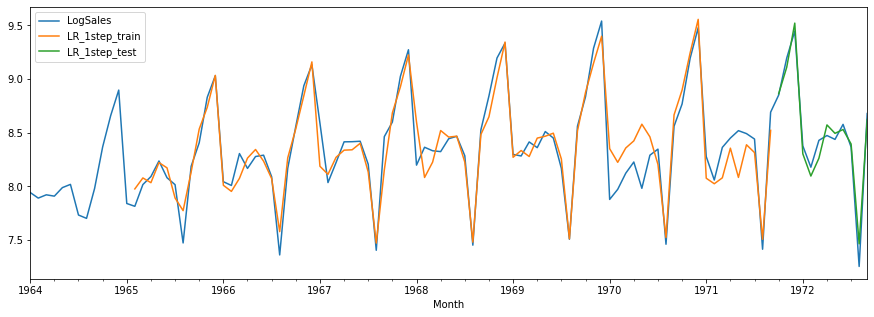

In [140]:
#Boolean index
#Buat variable
train_idx = df.index <= train.index[-1]
test_idx = ~train_idx

train_idx[:T+1] = False # nilai T pertama tidak dapat diprediksi

#1-step forecast
df.loc[train_idx, 'LR_1step_train'] = lr.predict(Xtrain)
df.loc[test_idx, 'LR_1step_test'] = lr.predict(Xtest)

#Plot 1-step forecast
df[['LogSales', 'LR_1step_train', 'LR_1step_test']].plot(figsize=(15, 5));

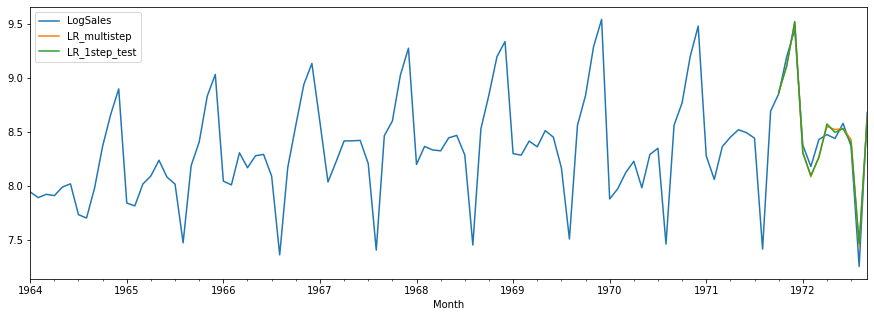

In [141]:
#Multi-step forecast
multistep_predictions = []

#Buat variable untuk input nilai pertama data testing
last_x = Xtest[0]

#Buat perulangan
while len(multistep_predictions) < Ntest:
  #Buat variable
  p = lr.predict(last_x.reshape(1, -1))[0]
  
  #Update predictions list
  multistep_predictions.append(p)
  
  #Buat input baru
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

#Simpan multi-step forecast ke dalam dataframe
df.loc[test_idx, 'LR_multistep'] = multistep_predictions

#Plot 1-step and multi-step forecast
df[['LogSales', 'LR_multistep', 'LR_1step_test']].plot(figsize=(15, 5));

In [142]:
#Buat multi-output supervised dataset

#Buat variable
Tx = T
Ty = Ntest

#Buat array
X = []
Y = []

#Buat perulangan
for t in range(len(series) - Tx - Ty + 1):
  x = series[t:t+Tx]
  X.append(x)
  y = series[t+Tx:t+Tx+Ty]
  Y.append(y)

#Ubah data menjadi ndarray dan reshape
X = np.array(X).reshape(-1, Tx)
Y = np.array(Y).reshape(-1, Ty)

#Buat variable untuk mengetahui jumlah data array X
N = len(X)

#Buat variable untuk data training dan testing
Xtrain_m, Ytrain_m = X[:-1], Y[:-1]
Xtest_m, Ytest_m = X[-1:], Y[-1:]

#Buat model
lr = LinearRegression()

#Fit model
lr.fit(Xtrain_m, Ytrain_m)

#Score model
print("Score model LR data train:", lr.score(Xtrain_m, Ytrain_m))
print("Score model LR data test:", lr.score(Xtrain_m, Ytrain_m))

Score model LR data train: 0.8830666358110193
Score model LR data test: 0.8830666358110193


In [143]:
#Hitung R2
print("Score R2:", r2_score(lr.predict(Xtest_m).flatten(), Ytest_m.flatten()))

Score R2: 0.9595234428105757


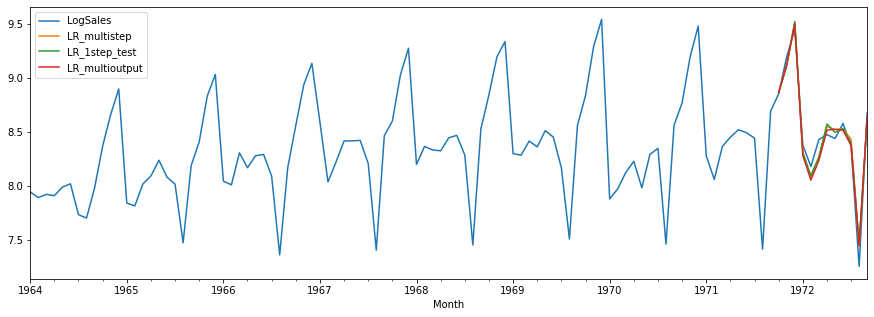

In [144]:
#Simpan multi-output forecast ke dalam dataframe
df.loc[test_idx, 'LR_multioutput'] = lr.predict(Xtest_m).flatten()

#Plot semua forecasts
cols = ['LogSales', 'LR_multistep', 'LR_1step_test', 'LR_multioutput']
df[cols].plot(figsize=(15, 5));

In [145]:
# MAPE
test_log_pass = df.iloc[-Ntest:]['LogSales']
mape1 = mean_absolute_percentage_error(test_log_pass, df.loc[test_idx, 'LR_multistep'])
print("multi-step MAPE:", mape1)
mape2 = mean_absolute_percentage_error(test_log_pass, df.loc[test_idx, 'LR_multioutput'])
print("multi-output MAPE:", mape2)

multi-step MAPE: 0.009790806113745658
multi-output MAPE: 0.009736441362578199


#### 4.3.2 SVR

One-step forecast: SVR
Train R^2: 0.9566057531411206
Test R^2 (1-step): 0.9180752776246474
Test MAPE (multi-step): 0.013547771381900135


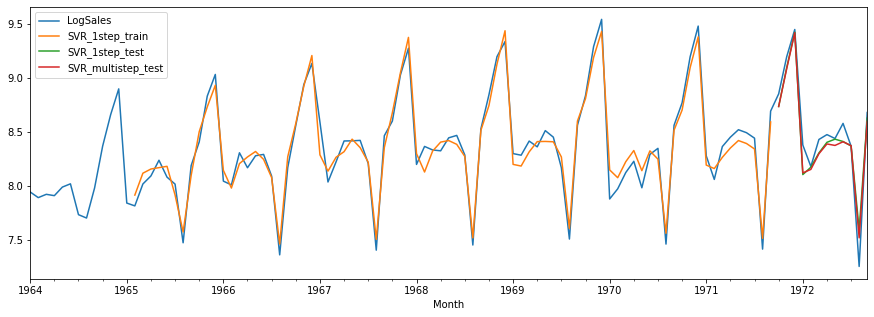

In [146]:
#Buat fungsi
def one_step_and_multistep_forecast(model, name):
  #Fit model
  model.fit(Xtrain, Ytrain)
  print("One-step forecast:", name)
  print("Train R^2:", model.score(Xtrain, Ytrain))
  print("Test R^2 (1-step):", model.score(Xtest, Ytest))

  #1-step forecast
  df.loc[train_idx, f'{name}_1step_train'] = model.predict(Xtrain)
  df.loc[test_idx, f'{name}_1step_test'] = model.predict(Xtest)

  #Multi-step forecast
  multistep_predictions = []

  #Input data testing pertama
  last_x = Xtest[0]

  #Buat perulangan
  while len(multistep_predictions) < Ntest:
    p = model.predict(last_x.reshape(1, -1))[0]
    
    #Update predictions list
    multistep_predictions.append(p)
    
    #Buat inputan baru
    last_x = np.roll(last_x, -1)
    last_x[-1] = p
  
  #Multi-step forecast
  df.loc[test_idx, f'{name}_multistep_test'] = multistep_predictions

  #MAPE multi-step forecast
  mape = mean_absolute_percentage_error(test_log_pass, df.loc[test_idx, f'{name}_multistep_test'])
  print("Test MAPE (multi-step):", mape)

  #Plot 1-step and multi-step forecast
  cols = [
    'LogSales',
    f'{name}_1step_train',
    f'{name}_1step_test',
    f'{name}_multistep_test'
  ]
  df[cols].plot(figsize=(15, 5));

#Tes fungsi dengan SVR
one_step_and_multistep_forecast(SVR(), "SVR")

Test MAPE (multi-output): 0.014361966274657717


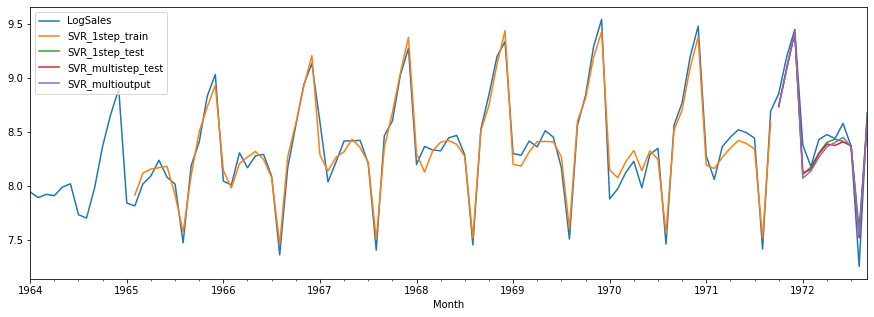

In [147]:
#Buat fungsi ke-2
def multi_output_forecast(model, name):
  #Fit model
  model.fit(Xtrain_m, Ytrain_m)
  
  #Simpan multi-output forecast ke dalam dataframe
  df.loc[test_idx, f'{name}_multioutput'] = model.predict(Xtest_m).flatten()
  
  #Buat MAPE
  mape = mean_absolute_percentage_error(test_log_pass, df.loc[test_idx, f'{name}_multioutput'])
  print("Test MAPE (multi-output):", mape)

  #Plot all forecasts
  #Asumsikan bahwa fungsi sebelumnya telah dijalankan
  cols = [
    'LogSales',
    f'{name}_1step_train',
    f'{name}_1step_test',
    f'{name}_multistep_test',
    f'{name}_multioutput',
  ]
  df[cols].plot(figsize=(15, 5));

#Maka dibuat menjadi seperti ini
class SVRWrapper:
  def __init__(self, h, **args):
    self.h = h
    self.models = [SVR(**args) for _ in range(h)]
  
  def fit(self, X, Y):
    for k in range(self.h):
      self.models[k].fit(X, Y[:, k])
  
  def predict(self, X):
    P = [m.predict(X) for m in self.models]
    return np.hstack(P)

#Display
multi_output_forecast(SVRWrapper(Ntest), "SVR")

#### 4.3.3 Random Forest Regression

One-step forecast: RF
Train R^2: 0.9781686285146465
Test R^2 (1-step): 0.9571699228643211
Test MAPE (multi-step): 0.011208487730504181


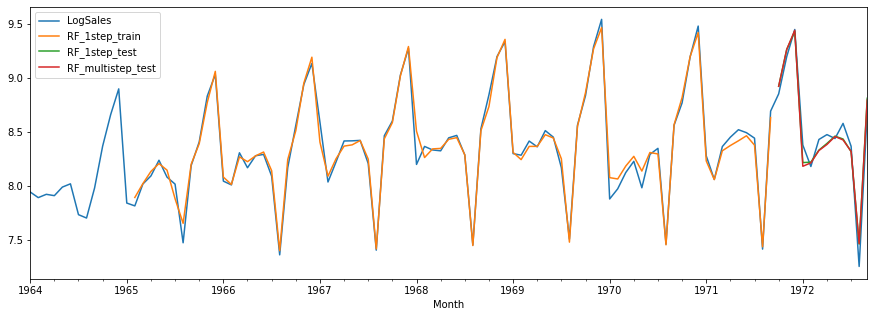

In [148]:
#Buat fungsi
def one_step_and_multistep_forecast(model, name):
  #Fit model
  model.fit(Xtrain, Ytrain)
  print("One-step forecast:", name)
  print("Train R^2:", model.score(Xtrain, Ytrain))
  print("Test R^2 (1-step):", model.score(Xtest, Ytest))

  #1-step forecast
  df.loc[train_idx, f'{name}_1step_train'] = model.predict(Xtrain)
  df.loc[test_idx, f'{name}_1step_test'] = model.predict(Xtest)

  #Multi-step forecast
  multistep_predictions = []

  #Input data testing pertama
  last_x = Xtest[0]

  #Buat perulangan
  while len(multistep_predictions) < Ntest:
    p = model.predict(last_x.reshape(1, -1))[0]
    
    #Update predictions list
    multistep_predictions.append(p)
    
    #Buat inputan baru
    last_x = np.roll(last_x, -1)
    last_x[-1] = p
  
  #Multi-step forecast
  df.loc[test_idx, f'{name}_multistep_test'] = multistep_predictions

  #MAPE multi-step forecast
  mape = mean_absolute_percentage_error(test_log_pass, df.loc[test_idx, f'{name}_multistep_test'])
  print("Test MAPE (multi-step):", mape)

  #Plot 1-step and multi-step forecast
  cols = [
    'LogSales',
    f'{name}_1step_train',
    f'{name}_1step_test',
    f'{name}_multistep_test'
  ]
  df[cols].plot(figsize=(15, 5));

#Tes fungsi dengan RandomForest
one_step_and_multistep_forecast(RandomForestRegressor(), "RF")

Test MAPE (multi-output): 0.02042530337894102


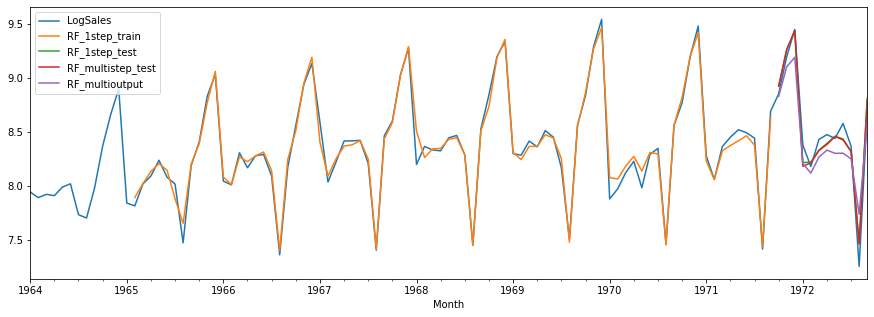

In [149]:
#Buat fungsi ke-2
def multi_output_forecast(model, name):
  #Fit model
  model.fit(Xtrain_m, Ytrain_m)
  
  #Simpan multi-output forecast ke dalam dataframe
  df.loc[test_idx, f'{name}_multioutput'] = model.predict(Xtest_m).flatten()
  
  #Buat MAPE
  mape = mean_absolute_percentage_error(test_log_pass, df.loc[test_idx, f'{name}_multioutput'])
  print("Test MAPE (multi-output):", mape)

  #Plot all forecasts
  #Asumsikan bahwa fungsi sebelumnya telah dijalankan
  cols = [
    'LogSales',
    f'{name}_1step_train',
    f'{name}_1step_test',
    f'{name}_multistep_test',
    f'{name}_multioutput',
  ]
  df[cols].plot(figsize=(15, 5));

multi_output_forecast(RandomForestRegressor(), "RF")

## 4.4 ML Stocks

### 4.4.1 Classification

In [150]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler

# download file
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

#Buat dataframe
df0 = pd.read_csv('sp500sub.csv',index_col='Date',parse_dates=True)

df = df0[df0['Name']=='IBM'][['Close']].copy()

#Buat kolom baru
df['LogClose'] = np.log(df['Close'])
df['LogReturn'] = df['LogClose'].diff()

#Buat variable baru untuk data training dan testing
Ntest = 252
train = df.iloc[:-Ntest] # data < tail(12)
test = df.iloc[-Ntest:] # data = tail(12)

#Buat supervised dataset
#Mari lihat apakah kita dapat menggunakan nilai T-past untuk memprediksi nilai selanjutnya 
series = df['LogReturn'].to_numpy()[1:]
target=(series>0)*1

#Buat variable dan array
T = 21
X = []
Y = []

#Buat perulangan untuk mengisi array X dan Y
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = target[t+T]
  Y.append(y)

#Ubah menjadi ndarray dan lakukan reshape
X = np.array(X).reshape(-1, T)
Y = np.array(Y)

#Hitung banyaknya data dari array X
N = len(X)

#Buat variable untuk data training dan testing
Xtrain, Ytrain = X[:-Ntest], Y[:-Ntest]
Xtest, Ytest = X[-Ntest:], Y[-Ntest:]

#Buat model
lr = LogisticRegression()
svc = SVC()
rf = RandomForestClassifier()

#Fit model
lr.fit(Xtrain, Ytrain)
svc.fit(Xtrain, Ytrain)
rf.fit(Xtrain, Ytrain)

#Display score dari model
print("Score model Logistic Regression untuk data train:", lr.score(Xtrain, Ytrain))
print("Score model Logistic Regression untuk data test:", lr.score(Xtest, Ytest))

print("Score model SVC untuk data train:", svc.score(Xtrain, Ytrain))
print("Score model SVC untuk data test:", svc.score(Xtest, Ytest))

print("Score model RandomForest untuk data train:", rf.score(Xtrain, Ytrain))
print("Score model RandomForest untuk data test:", rf.score(Xtest, Ytest))

File ‘sp500sub.csv’ already there; not retrieving.

Score model Logistic Regression untuk data train: 0.5093011563599799
Score model Logistic Regression untuk data test: 0.49603174603174605
Score model SVC untuk data train: 0.7551533433886375
Score model SVC untuk data test: 0.49603174603174605
Score model RandomForest untuk data train: 1.0
Score model RandomForest untuk data test: 0.4880952380952381


### 4.4.2 Regression

#### 4.4.2.1 Linear Regression

In [151]:
#Install
!pip install -U scikit-learn

#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# download file
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

#Buat dataframe
df0 = pd.read_csv('sp500sub.csv',index_col='Date',parse_dates=True)

df = df0[df0['Name']=='IBM'][['Close']].copy()

#Buat kolom baru
df['LogClose'] = np.log(df['Close'])
df['DiffLogClose'] = df['LogClose'].diff()

#Buat variable baru untuk data training dan testing
Ntest = 12
train = df.iloc[:-Ntest] # data < tail(12)
test = df.iloc[-Ntest:] # data = tail(12)

#Buat supervised dataset
#Mari lihat apakah kita dapat menggunakan nilai T-past untuk memprediksi nilai selanjutnya 
series = df['DiffLogClose'].to_numpy()[1:]

#Buat variable dan array
T = 21
X = []
Y = []

#Buat perulangan untuk mengisi array X dan Y
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

#Ubah menjadi ndarray dan lakukan reshape
X = np.array(X).reshape(-1, T)
Y = np.array(Y)

#Hitung banyaknya data dari array X
N = len(X)

#Buat variable untuk data training dan testing
Xtrain, Ytrain = X[:-Ntest], Y[:-Ntest]
Xtest, Ytest = X[-Ntest:], Y[-Ntest:]

#Buat model
lr = LinearRegression()

#Fit model
lr.fit(Xtrain, Ytrain)

#Display score dari model
print("Score model LR data train:", lr.score(Xtrain, Ytrain))
print("Score model LR data test:", lr.score(Xtest, Ytest))

File ‘sp500sub.csv’ already there; not retrieving.

Score model LR data train: 0.00910676388568643
Score model LR data test: -0.10647843085489117


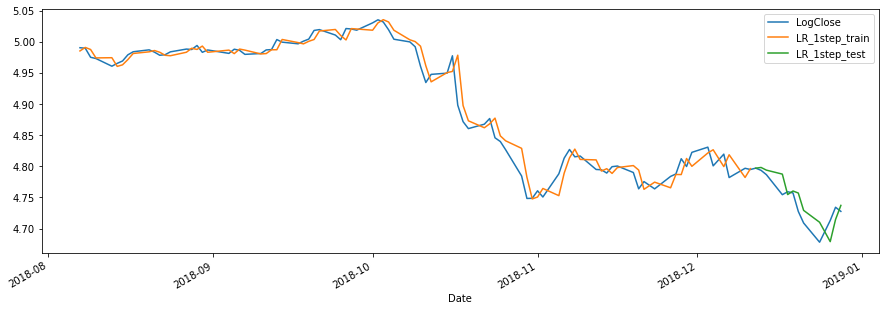

In [152]:
#Boolean index
#Buat variable
train_idx = df.index <= train.index[-1]
test_idx = ~train_idx

train_idx[:T+1] = False # nilai T pertama tidak dapat diprediksi

#Dibutuhkan untuk menghitung prediksi yang tidak berbeda
#1.Buat kolom baru
df['ShiftLogClose'] = df['LogClose'].shift(1) # => shift adalah fungsi untuk menggeser posisi sesuai yang kita inginkan
#2.Buat variable baru
prev = df['ShiftLogClose']

#Buat variable untuk menampung nilai terakhir di data training
last_train = train.iloc[-1]['LogClose']

#1-step forecast
df.loc[train_idx, 'LR_1step_train'] = prev[train_idx] + lr.predict(Xtrain)
df.loc[test_idx, 'LR_1step_test'] = prev[test_idx] + lr.predict(Xtest)

#Plot 1-step forecast
cols=['LogClose', 'LR_1step_train', 'LR_1step_test']
df.iloc[-100:][cols].plot(figsize=(15,5))

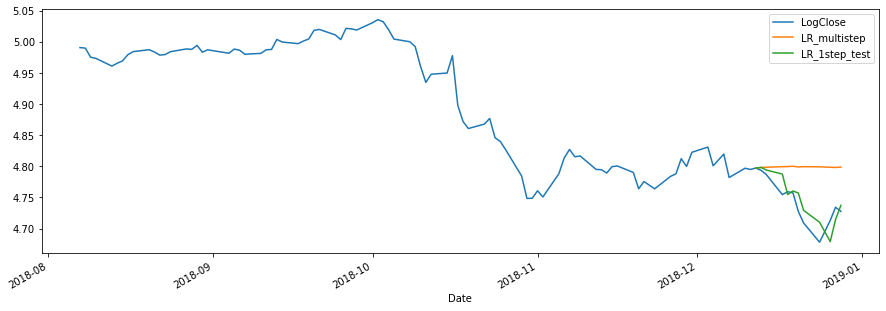

In [153]:
#Multi-step forecast
multistep_predictions = []

#Buat variable untuk input nilai pertama data testing
last_x = Xtest[0]

#Buat perulangan
while len(multistep_predictions) < Ntest:
  #Buat variable
  p = lr.predict(last_x.reshape(1, -1))[0]
  
  #Update predictions list
  multistep_predictions.append(p)
  
  #Buat input baru
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

#Simpan multi-step forecast ke dalam dataframe
df.loc[test_idx, 'LR_multistep'] = last_train + np.cumsum(multistep_predictions)

#Plot 1-step and multi-step forecast
cols=['LogClose', 'LR_multistep', 'LR_1step_test']
df.iloc[-100:][cols].plot(figsize=(15,5))

In [154]:
#Buat multi-output supervised dataset

#Buat variable
Tx = T
Ty = Ntest

#Buat array
X = []
Y = []

#Buat perulangan
for t in range(len(series) - Tx - Ty + 1):
  x = series[t:t+Tx]
  X.append(x)
  y = series[t+Tx:t+Tx+Ty]
  Y.append(y)

#Ubah data menjadi ndarray dan reshape
X = np.array(X).reshape(-1, Tx)
Y = np.array(Y).reshape(-1, Ty)

#Buat variable untuk mengetahui jumlah data array X
N = len(X)

#Buat variable untuk data training dan testing
Xtrain_m, Ytrain_m = X[:-1], Y[:-1]
Xtest_m, Ytest_m = X[-1:], Y[-1:]

#Buat model
lr = LinearRegression()

#Fit model
lr.fit(Xtrain_m, Ytrain_m)

#Score model
print("Score model LR:", lr.score(Xtrain_m, Ytrain_m))

#Hitung R2
print("Score R2:", r2_score(lr.predict(Xtest_m).flatten(), Ytest_m.flatten()))

Score model LR: 0.010010133087048493
Score R2: -489.9493800611111


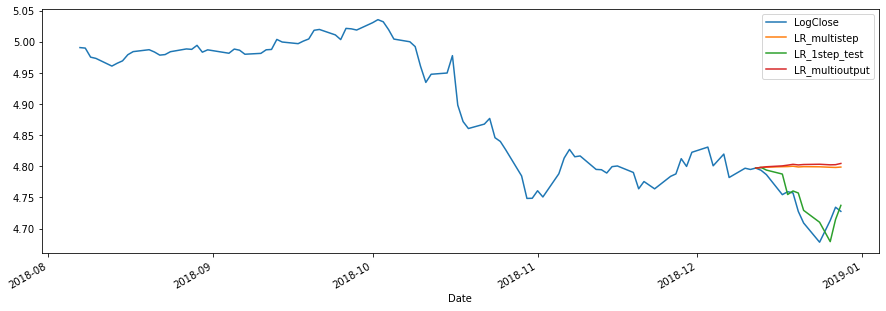

In [155]:
#Simpan multi-output forecast ke dalam dataframe
df.loc[test_idx, 'LR_multioutput'] = last_train + np.cumsum(lr.predict(Xtest_m).flatten())

#Plot semua forecasts
cols = ['LogClose', 'LR_multistep', 'LR_1step_test', 'LR_multioutput']
df.iloc[-100:][cols].plot(figsize=(15,5))

In [156]:
# MAPE
test_log_pass = df.iloc[-Ntest:]['LogClose']
mape1 = mean_absolute_percentage_error(test_log_pass, df.loc[test_idx, 'LR_multistep'])
print("multi-step MAPE:", mape1)
mape2 = mean_absolute_percentage_error(test_log_pass, df.loc[test_idx, 'LR_multioutput'])
print("multi-output MAPE:", mape2)

multi-step MAPE: 0.01142632609085105
multi-output MAPE: 0.011998190671272594


#### 4.4.2.2 SVR

One-step forecast: SVR
Test MAPE (multi-step): 0.009692971150318395


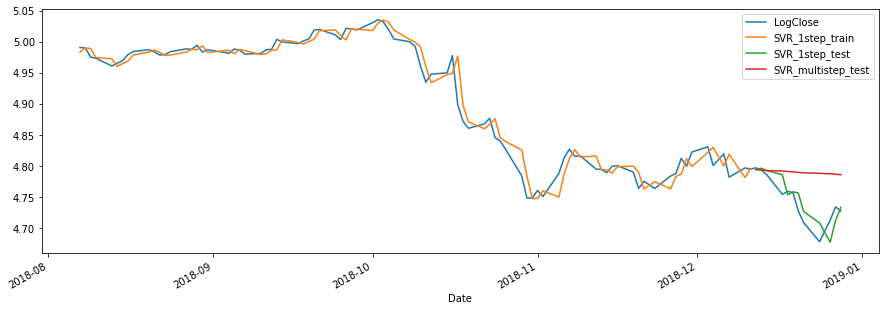

In [157]:
def one_step_and_multistep_forecast(model, name):
  model.fit(Xtrain, Ytrain)
  print("One-step forecast:", name)
  # print("Train R^2:", model.score(Xtrain, Ytrain))
  # print("Test R^2 (1-step):", model.score(Xtest, Ytest))

  # store 1-step forecast
  df.loc[train_idx, f'{name}_1step_train'] = \
    prev[train_idx] + model.predict(Xtrain)
  df.loc[test_idx, f'{name}_1step_test'] = \
    prev[test_idx] + model.predict(Xtest)

  # generate multi-step forecast
  multistep_predictions = []

  # first test input
  last_x = Xtest[0]

  while len(multistep_predictions) < Ntest:
    p = model.predict(last_x.reshape(1, -1))[0]
    
    # update the predictions list
    multistep_predictions.append(p)
    
    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p
  
  # store multi-step forecast
  df.loc[test_idx, f'{name}_multistep_test'] = \
    last_train + np.cumsum(multistep_predictions)

  # MAPE of multi-step forecast
  mape = mean_absolute_percentage_error(
      test_log_pass, df.loc[test_idx, f'{name}_multistep_test'])
  print("Test MAPE (multi-step):", mape)

  # plot 1-step and multi-step forecast
  cols = [
    'LogClose',
    f'{name}_1step_train',
    f'{name}_1step_test',
    f'{name}_multistep_test'
  ]
  df.iloc[-100:][cols].plot(figsize=(15, 5));

#Tes fungsi dengan SVR
one_step_and_multistep_forecast(SVR(), "SVR")

Test MAPE (multi-output): 0.009692971150318395


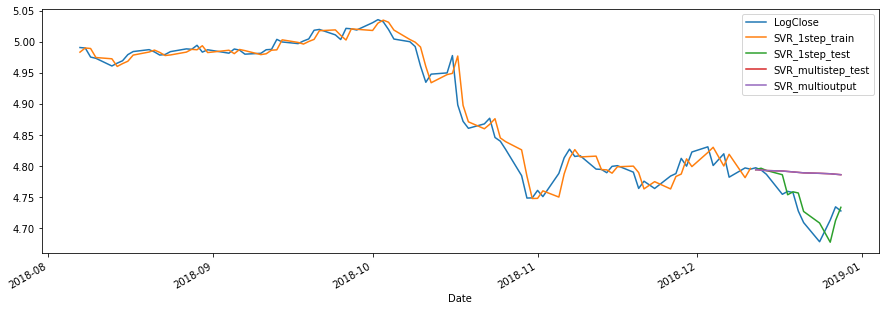

In [158]:
def multi_output_forecast(model, name):
  model.fit(Xtrain_m, Ytrain_m)
  
  # save multi-output forecast to dataframe
  df.loc[test_idx, f'{name}_multioutput'] = \
    last_train + np.cumsum(model.predict(Xtest_m).flatten())
  
  mape = mean_absolute_percentage_error(
      test_log_pass, df.loc[test_idx, f'{name}_multioutput'])
  print("Test MAPE (multi-output):", mape)

  # plot all forecasts
  # assume that previous functions have been run
  cols = [
    'LogClose',
    f'{name}_1step_train',
    f'{name}_1step_test',
    f'{name}_multistep_test',
    f'{name}_multioutput',
  ]
  df.iloc[-100:][cols].plot(figsize=(15, 5));

class SVRWrapper:
  def __init__(self, h, **args):
    self.h = h
    self.models = [SVR(**args) for _ in range(h)]
  
  def fit(self, X, Y):
    for k in range(self.h):
      self.models[k].fit(X, Y[:, k])
  
  def predict(self, X):
    P = [m.predict(X) for m in self.models]
    return np.hstack(P)

multi_output_forecast(SVRWrapper(Ntest), "SVR")

#### 4.4.2.3 Random Forest Regression

One-step forecast: RF
Test MAPE (multi-step): 0.013952679783074661


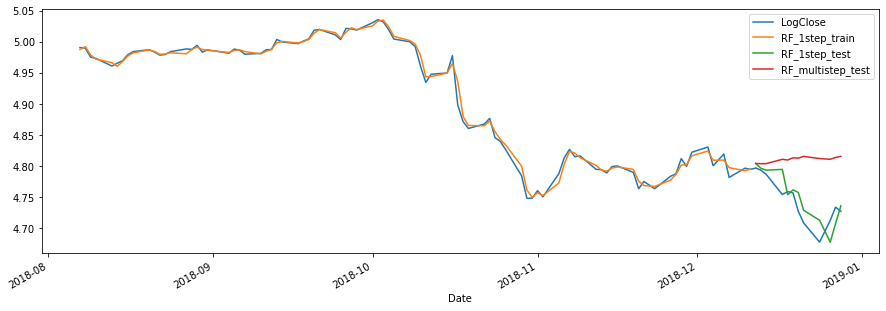

In [159]:
def one_step_and_multistep_forecast(model, name):
  model.fit(Xtrain, Ytrain)
  print("One-step forecast:", name)
  # print("Train R^2:", model.score(Xtrain, Ytrain))
  # print("Test R^2 (1-step):", model.score(Xtest, Ytest))

  # store 1-step forecast
  df.loc[train_idx, f'{name}_1step_train'] = \
    prev[train_idx] + model.predict(Xtrain)
  df.loc[test_idx, f'{name}_1step_test'] = \
    prev[test_idx] + model.predict(Xtest)

  # generate multi-step forecast
  multistep_predictions = []

  # first test input
  last_x = Xtest[0]

  while len(multistep_predictions) < Ntest:
    p = model.predict(last_x.reshape(1, -1))[0]
    
    # update the predictions list
    multistep_predictions.append(p)
    
    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p
  
  # store multi-step forecast
  df.loc[test_idx, f'{name}_multistep_test'] = \
    last_train + np.cumsum(multistep_predictions)

  # MAPE of multi-step forecast
  mape = mean_absolute_percentage_error(
      test_log_pass, df.loc[test_idx, f'{name}_multistep_test'])
  print("Test MAPE (multi-step):", mape)

  # plot 1-step and multi-step forecast
  cols = [
    'LogClose',
    f'{name}_1step_train',
    f'{name}_1step_test',
    f'{name}_multistep_test'
  ]
  df.iloc[-100:][cols].plot(figsize=(15, 5));

#Tes fungsi dengan RandomForest
one_step_and_multistep_forecast(RandomForestRegressor(), "RF")

Test MAPE (multi-output): 0.010330752548272384


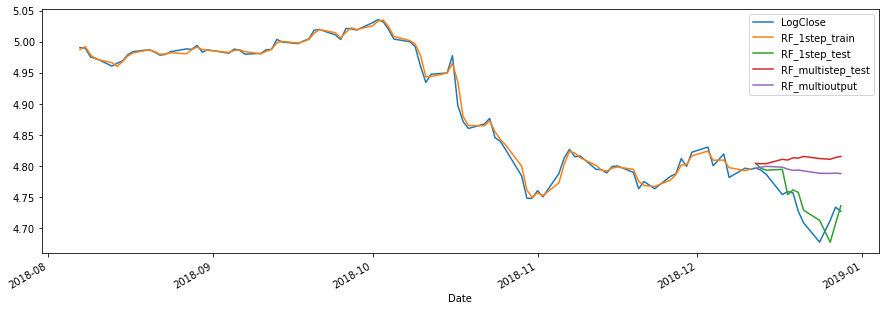

In [160]:
def multi_output_forecast(model, name):
  model.fit(Xtrain_m, Ytrain_m)
  
  # save multi-output forecast to dataframe
  df.loc[test_idx, f'{name}_multioutput'] = \
    last_train + np.cumsum(model.predict(Xtest_m).flatten())
  
  mape = mean_absolute_percentage_error(
      test_log_pass, df.loc[test_idx, f'{name}_multioutput'])
  print("Test MAPE (multi-output):", mape)

  # plot all forecasts
  # assume that previous functions have been run
  cols = [
    'LogClose',
    f'{name}_1step_train',
    f'{name}_1step_test',
    f'{name}_multistep_test',
    f'{name}_multioutput',
  ]
  df.iloc[-100:][cols].plot(figsize=(15, 5));

multi_output_forecast(RandomForestRegressor(), "RF")

# Bagian 5 - ANN

## 5.1 ANN - Airline

In [161]:
#install
!pip install -U scikit-learn

#download file
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from sklearn.metrics import mean_absolute_percentage_error

#buat random seed menggunakan numpy
np.random.seed(123)

#buat random seed menggunakan tensorflow
tf.random.set_seed(123)

#buat dataframe
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

#buat kolom baru
df['LogPassengers'] = np.log(df['Passengers'])
df['DiffLogPassengers'] = df['LogPassengers'].diff()

#buat variable untuk data training dan testing
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

#buat variable yang akan berisi nilai boolean
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

#buat supervised dataset 
#(buat data series baru yang hanya berisikan kolom 'difflogpassengers')
series = df['DiffLogPassengers'].dropna().to_numpy()

#buat variable 'x' & 'y' untuk menampung nilai dari variable series
T = 10
X = []
Y = []

#buat perulangan
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

#buat variable untuk menampung nilai array
X = np.array(X).reshape(-1, T) # => disini dilakukan reshape
Y = np.array(Y)
N = len(X) # => disini untuk menghitung jumlah data array 'x'

#buat variable data training dan testing dari array yang dibuat
Xtrain, Ytrain = X[:-Ntest], Y[:-Ntest]
Xtest, Ytest = X[-Ntest:], Y[-Ntest:]

#buat model basic ANN
i = Input(shape=(T,))
x = Dense(32, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)

#compile model
model.compile(
  loss='mse', # => mean squared error
  optimizer='adam',
)

#fit model
r = model.fit(
  Xtrain,
  Ytrain,
  epochs=150,
  validation_data=(Xtest, Ytest)
)

File ‘airline_passengers.csv’ already there; not retrieving.

Epoch 1/150
4/4 [==============================] - 0s 45ms/step - loss: 0.0143 - val_loss: 0.0113
Epoch 2/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0118 - val_loss: 0.0098
Epoch 3/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0102 - val_loss: 0.0089
Epoch 4/150
4/4 [==============================] - 0s 10ms/step - loss: 0.0093 - val_loss: 0.0085
Epoch 5/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0088 - val_loss: 0.0082
Epoch 6/150
4/4 [==============================] - 0s 10ms/step - loss: 0.0083 - val_loss: 0.0078
Epoch 7/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0077 - val_loss: 0.0075
Epoch 8/150
4/4 [==============================] - 0s 10ms/step - loss: 0.0072 - val_loss: 0.0072
Epoch 9/150
4/4 [==============================] - 0s 12ms/step - loss: 0.0067 - val_loss: 0.0069
Epoch 10/150
4/4 [==============================] - 0s 11ms

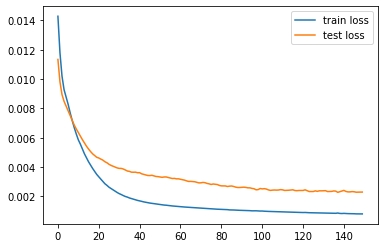

In [162]:
#buat plot
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

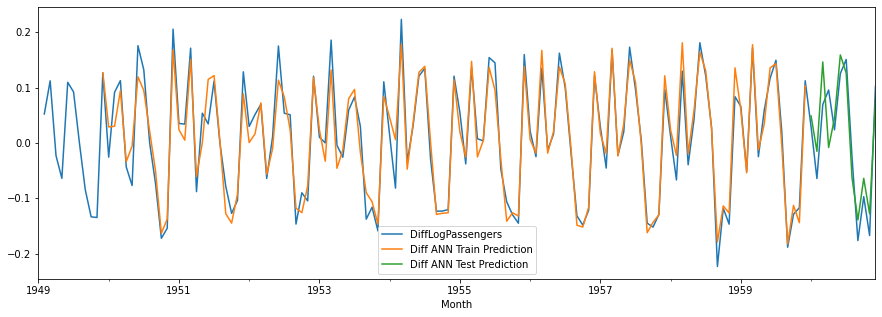

In [163]:
train_idx[:T+1] = False #nilai T+1 pertama tidak diprediksi

#buat variable untuk model prediksi
Ptrain = model.predict(Xtrain).flatten()
Ptest = model.predict(Xtest).flatten()

#simpan data untuk diff prediksi
df.loc[train_idx, 'Diff ANN Train Prediction'] = Ptrain
df.loc[test_idx, 'Diff ANN Test Prediction'] = Ptest

#buat plot
cols = ['DiffLogPassengers',
        'Diff ANN Train Prediction',
        'Diff ANN Test Prediction']
df[cols].plot(figsize=(15, 5));

In [164]:
#dibutuhkan untuk menghitung prediksi yang tidak berbeda
df['ShiftLogPassengers'] = df['LogPassengers'].shift(1)
prev = df['ShiftLogPassengers']

#mengetahui nilai dari data train terakhir
last_train = train.iloc[-1]['LogPassengers']

#display
last_train

6.003887067106539

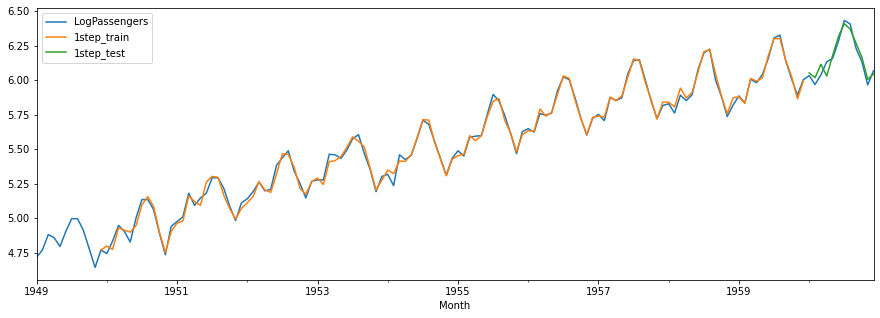

In [165]:
#1-step forecast
df.loc[train_idx, '1step_train'] = prev[train_idx] + Ptrain
df.loc[test_idx, '1step_test'] = prev[test_idx] + Ptest

#buat plot 1-step forecast
df[['LogPassengers', '1step_train', '1step_test']].plot(figsize=(15, 5));

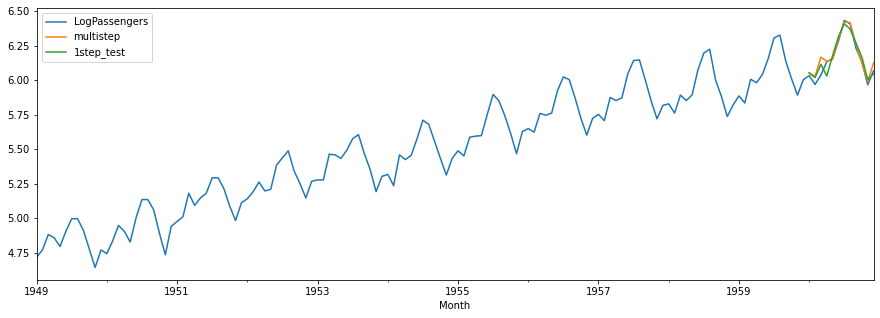

In [166]:
#multi-step forecast
multistep_predictions = []

#input nilai data testing pertama
last_x = Xtest[0]

#buat perulangan
while len(multistep_predictions) < Ntest:
  #buat variable yang berisikan model
  p = model.predict(last_x.reshape(1, -1))[0]
  
  #update data list prediksi
  multistep_predictions.append(p)
  
  #buat inputan terbaru
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

#simpan multi-step forecast kedalam dataframe
df.loc[test_idx, 'multistep'] = last_train + np.cumsum(multistep_predictions)

#buat plot 1-step dan multi-step forecast
df[['LogPassengers', 'multistep', '1step_test']].plot(figsize=(15, 5));

Epoch 1/150
4/4 [==============================] - 0s 44ms/step - loss: 0.0144 - val_loss: 0.0104
Epoch 2/150
4/4 [==============================] - 0s 10ms/step - loss: 0.0135 - val_loss: 0.0103
Epoch 3/150
4/4 [==============================] - 0s 10ms/step - loss: 0.0127 - val_loss: 0.0103
Epoch 4/150
4/4 [==============================] - 0s 15ms/step - loss: 0.0120 - val_loss: 0.0102
Epoch 5/150
4/4 [==============================] - 0s 10ms/step - loss: 0.0115 - val_loss: 0.0101
Epoch 6/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0110 - val_loss: 0.0099
Epoch 7/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0106 - val_loss: 0.0098
Epoch 8/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0103 - val_loss: 0.0096
Epoch 9/150
4/4 [==============================] - 0s 11ms/step - loss: 0.0099 - val_loss: 0.0094
Epoch 10/150
4/4 [==============================] - 0s 9ms/step - loss: 0.0096 - val_loss: 0.0092
Epoch 11/150
4/4 [===

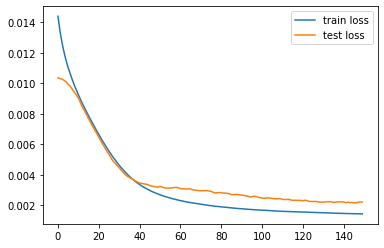

In [167]:
#buat supervised dataset untuk multi-output
#buat variable
Tx = T
Ty = Ntest
#buat array
X = []
Y = []

#buat perulangan
for t in range(len(series) - Tx - Ty + 1):
  x = series[t:t+Tx]
  X.append(x)
  y = series[t+Tx:t+Tx+Ty]
  Y.append(y)

#buat variable untuk menampung nilai array yang sudah direshape
X = np.array(X).reshape(-1, Tx)
Y = np.array(Y).reshape(-1, Ty)
N = len(X)

#buat variable data training dan testing
Xtrain_m, Ytrain_m = X[:-1], Y[:-1]
Xtest_m, Ytest_m = X[-1:], Y[-1:]

#baut model basic ANN
i = Input(shape=(Tx,))
x = Dense(32, activation='relu')(i)
x = Dense(Ty)(x)
model = Model(i, x)

#buat compiler model
model.compile(
  loss='mse',
  optimizer='adam',
)

#buat fit model
r = model.fit(
  Xtrain_m,
  Ytrain_m,
  epochs=150,
  validation_data=(Xtest_m, Ytest_m)
)

#buat plot
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

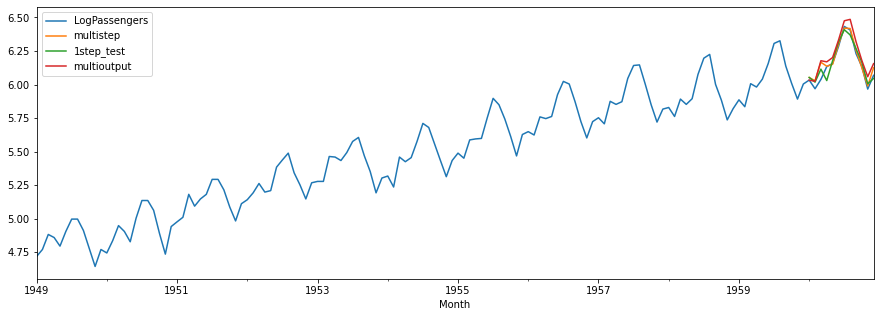

In [168]:
#buat variable array yang akan menampung data2 prediksi
Ptrain = model.predict(Xtrain_m)
Ptest = model.predict(Xtest_m)

#buat variable
Ptrain = Ptrain[:,0]
Ptest = Ptest[0]

#simpan multi-output forecast ke dalam dataframe
df.loc[test_idx, 'multioutput'] = last_train + \
  np.cumsum(Ptest)

#buat plot untuk semua forecasts
cols = ['LogPassengers', 'multistep', '1step_test', 'multioutput']
df[cols].plot(figsize=(15, 5));

In [169]:
# MAPE
test_log_pass = df.iloc[-Ntest:]['LogPassengers']
mape1 = mean_absolute_percentage_error(test_log_pass, df.loc[test_idx, 'multistep'])
print("multi-step MAPE:", mape1)
mape2 = mean_absolute_percentage_error(test_log_pass, df.loc[test_idx, 'multioutput'])
print("multi-output MAPE:", mape2)

multi-step MAPE: 0.005068560705661482
multi-output MAPE: 0.01029014942001666


## 5.2 ANN - Stocks

In [170]:
#install
!pip install -U scikit-learn

#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

#buat random seed menggunakan numpy dan tensorflow
np.random.seed(123)
tf.random.set_seed(123)

#download file
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

#buat dataframe
df0 = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)

#buat dataframe salinan/modifikasi (berbeda dari dataframe di atas)
df = df0[df0['Name'] == 'SBUX'][['Close']].copy()

#buat kolom baru
df['LogClose'] = np.log(df['Close'])
df['DiffLogClose'] = df['LogClose'].diff()

#buat variable untuk data training dan testing
Ntest = 21
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

#buat scaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[['DiffLogClose']])
test_scaled = scaler.transform(test[['DiffLogClose']])

#buat variable yang akan berisi nilai boolean
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

#buat kolom baru
df.loc[train_idx, 'ScaledLogReturn'] = train_scaled.flatten()
df.loc[test_idx, 'ScaledLogReturn'] = test_scaled.flatten()

File ‘sp500sub.csv’ already there; not retrieving.



Epoch 1/200
70/70 [==============================] - 1s 3ms/step - loss: 1.2007 - val_loss: 1.0208
Epoch 2/200
70/70 [==============================] - 0s 2ms/step - loss: 1.0575 - val_loss: 0.9873
Epoch 3/200
70/70 [==============================] - 0s 2ms/step - loss: 1.0324 - val_loss: 0.9807
Epoch 4/200
70/70 [==============================] - 0s 2ms/step - loss: 1.0160 - val_loss: 0.9870
Epoch 5/200
70/70 [==============================] - 0s 2ms/step - loss: 1.0058 - val_loss: 0.9779
Epoch 6/200
70/70 [==============================] - 0s 2ms/step - loss: 0.9959 - val_loss: 0.9783
Epoch 7/200
70/70 [==============================] - 0s 2ms/step - loss: 0.9871 - val_loss: 0.9868
Epoch 8/200
70/70 [==============================] - 0s 2ms/step - loss: 0.9807 - val_loss: 0.9754
Epoch 9/200
70/70 [==============================] - 0s 2ms/step - loss: 0.9754 - val_loss: 0.9974
Epoch 10/200
70/70 [==============================] - 0s 2ms/step - loss: 0.9711 - val_loss: 0.9977
Epoch 11/

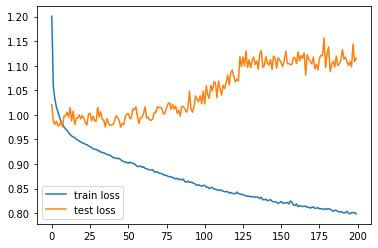

In [171]:
#buat supervised dataset
series = df['ScaledLogReturn'].dropna().to_numpy()

#buat variable dan array
T = 10
X = []
Y = []

#buat perulangan
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

#buat variable untuk menampung nilai array dari hasil perulangan
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)

#buat variable data training dan testing
Xtrain, Ytrain = X[:-Ntest], Y[:-Ntest]
Xtest, Ytest = X[-Ntest:], Y[-Ntest:]

#buat model basic ANN
i = Input(shape=(T,))
x = Dense(32, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)

#buat compiler model
model.compile(
  loss='mse',
  optimizer='adam',
)

#buat fit model
r = model.fit(
  Xtrain,
  Ytrain,
  epochs=200,
  validation_data=(Xtest, Ytest)
)

#buat plot
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

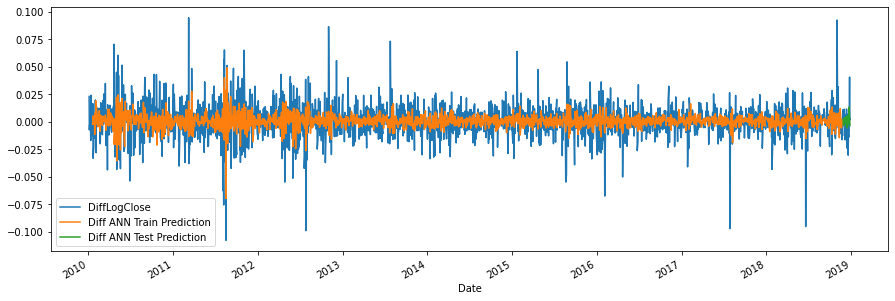

In [172]:
train_idx[:T+1] = False # nilai T+1 pertama tidak diprediksi

#buat variable array untuk menampung nilai dari hasil prediksi
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

#buat variable array untuk menampung scaler array diatas
Ptrain = scaler.inverse_transform(Ptrain).flatten()
Ptest = scaler.inverse_transform(Ptest).flatten()

#buat menyipan data diff prediksi
df.loc[train_idx, 'Diff ANN Train Prediction'] = Ptrain
df.loc[test_idx, 'Diff ANN Test Prediction'] = Ptest

#buat plot
cols = ['DiffLogClose',
        'Diff ANN Train Prediction',
        'Diff ANN Test Prediction']
df[cols].plot(figsize=(15, 5));

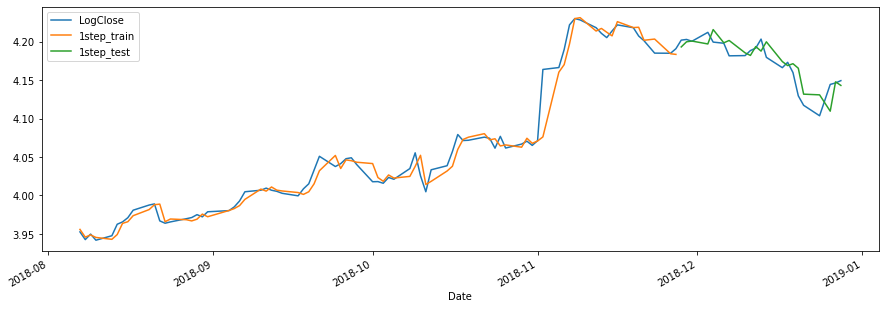

In [173]:
#dibutuhkan untuk menghitung data yang diprediksi tidak berbeda
df['ShiftLogClose'] = df['LogClose'].shift(1)
prev = df['ShiftLogClose']

#buat variable untuk mengetahui nilai terakhir dari data training
last_train = train.iloc[-1]['LogClose']

#1-step forecast
df.loc[train_idx, '1step_train'] = prev[train_idx] + Ptrain
df.loc[test_idx, '1step_test'] = prev[test_idx] + Ptest

#buat plot 1-step forecast
df.iloc[-100:][['LogClose', '1step_train', '1step_test']].plot(figsize=(15, 5));

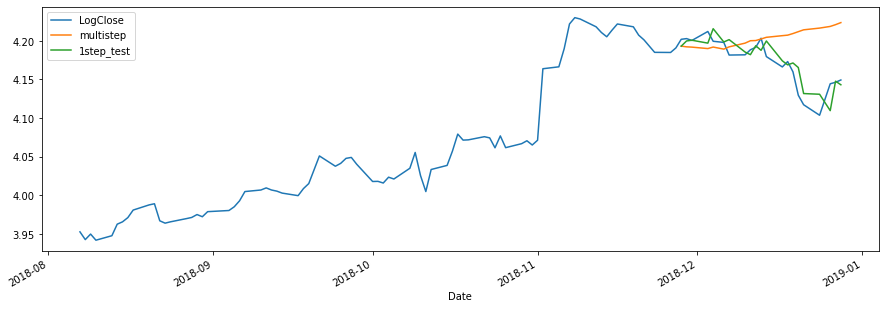

In [174]:
#baut multi-step forecast
multistep_predictions = []

#input data testing pertama
last_x = Xtest[0]

while len(multistep_predictions) < Ntest:
  p = model.predict(last_x.reshape(1, -1))[0]
  
  #update list prediksi
  multistep_predictions.append(p)
  
  #buat inputan baru
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

#unscale
multistep_predictions = np.array(multistep_predictions)
multistep_predictions = scaler.inverse_transform(multistep_predictions.reshape(-1, 1)).flatten()

#simpan multi-step forecast ke dalam dataframe
df.loc[test_idx, 'multistep'] = last_train + np.cumsum(multistep_predictions)

#buat plot 1-step dan multi-step forecast
df.iloc[-100:][['LogClose', 'multistep', '1step_test']].plot(figsize=(15, 5));

Epoch 1/100
70/70 [==============================] - 1s 4ms/step - loss: 1.1321 - val_loss: 1.0284
Epoch 2/100
70/70 [==============================] - 0s 2ms/step - loss: 1.0588 - val_loss: 1.0414
Epoch 3/100
70/70 [==============================] - 0s 2ms/step - loss: 1.0339 - val_loss: 1.0370
Epoch 4/100
70/70 [==============================] - 0s 2ms/step - loss: 1.0212 - val_loss: 1.0405
Epoch 5/100
70/70 [==============================] - 0s 3ms/step - loss: 1.0134 - val_loss: 1.0348
Epoch 6/100
70/70 [==============================] - 0s 2ms/step - loss: 1.0083 - val_loss: 1.0300
Epoch 7/100
70/70 [==============================] - 0s 2ms/step - loss: 1.0046 - val_loss: 1.0324
Epoch 8/100
70/70 [==============================] - 0s 2ms/step - loss: 1.0017 - val_loss: 1.0248
Epoch 9/100
70/70 [==============================] - 0s 2ms/step - loss: 0.9994 - val_loss: 1.0219
Epoch 10/100
70/70 [==============================] - 0s 2ms/step - loss: 0.9976 - val_loss: 1.0167
Epoch 11/

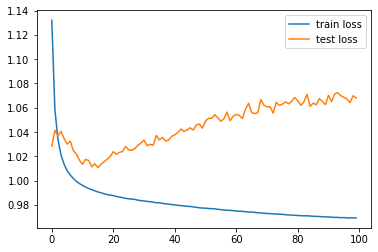

In [176]:
#buat multi-output supervised dataset

#buat variable
Tx = T
Ty = Ntest

#buat array
X = []
Y = []

#buat perulangan
for t in range(len(series) - Tx - Ty + 1):
  x = series[t:t+Tx]
  X.append(x)
  y = series[t+Tx:t+Tx+Ty]
  Y.append(y)

X = np.array(X).reshape(-1, Tx)
Y = np.array(Y).reshape(-1, Ty)
N = len(X)

#buat variable untuk data training dan testing
Xtrain_m, Ytrain_m = X[:-1], Y[:-1]
Xtest_m, Ytest_m = X[-1:], Y[-1:]

#buat model basic ANN
i = Input(shape=(Tx,))
x = Dense(32, activation='relu')(i)
x = Dense(Ty)(x)
model = Model(i, x)

#buat compiler
model.compile(
  loss='mse',
  optimizer='adam',
)

#buat fit model
r = model.fit(
  Xtrain_m,
  Ytrain_m,
  epochs=100,
  validation_data=(Xtest_m, Ytest_m)
)

#Buat plot
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

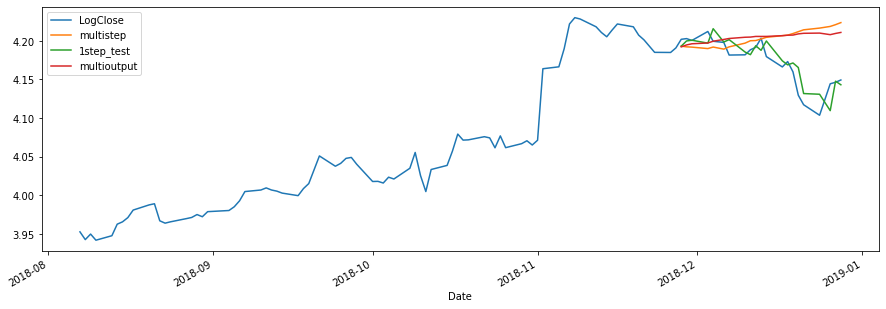

In [177]:
#buat variable
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

Ptrain = Ptrain[:,0]
Ptest = Ptest[0]

#unscale
Ptest = scaler.inverse_transform(Ptest.reshape(-1, 1)).flatten()

#simpan multi-output forecast ke dalam dataframe
df.loc[test_idx, 'multioutput'] = last_train + np.cumsum(Ptest)

#buat plot semua forecasts
cols = ['LogClose', 'multistep', '1step_test', 'multioutput']
df.iloc[-100:][cols].plot(figsize=(15, 5));

In [178]:
# MAPE
test_log_pass = df.iloc[-Ntest:]['LogClose']
mape1 = mean_absolute_percentage_error(test_log_pass, df.loc[test_idx, 'multistep'])
print("multi-step MAPE:", mape1)
mape2 = mean_absolute_percentage_error(test_log_pass, df.loc[test_idx, 'multioutput'])
print("multi-output MAPE:", mape2)

multi-step MAPE: 0.008941029893924412
multi-output MAPE: 0.008424864019732883


>1-step Binary Classification

Epoch 1/100
70/70 [==============================] - 1s 4ms/step - loss: 0.7516 - accuracy: 0.5016 - val_loss: 0.7012 - val_accuracy: 0.5238
Epoch 2/100
70/70 [==============================] - 0s 2ms/step - loss: 0.7087 - accuracy: 0.5043 - val_loss: 0.7071 - val_accuracy: 0.5238
Epoch 3/100
70/70 [==============================] - 0s 3ms/step - loss: 0.6993 - accuracy: 0.5034 - val_loss: 0.7045 - val_accuracy: 0.5238
Epoch 4/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5043 - val_loss: 0.7067 - val_accuracy: 0.5238
Epoch 5/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5074 - val_loss: 0.6991 - val_accuracy: 0.5238
Epoch 6/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5047 - val_loss: 0.6981 - val_accuracy: 0.5238
Epoch 7/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5065 - val_loss: 0.6951 - val_accuracy: 0.5238
Epoch 8/100
7

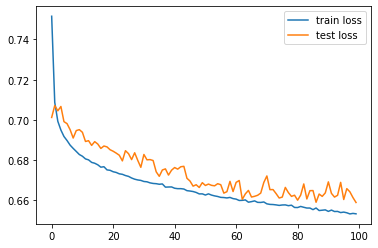

In [179]:
#buat variable
Ytrain_b = (Ytrain > 0) * 1
Ytest_b = (Ytest > 0) * 1

#buat model basic ANN
i = Input(shape=(T,))
x = Dense(32, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)

#buat compiler
model.compile(
  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy'],
)

#buat fit model
r = model.fit(
  Xtrain,
  Ytrain_b,
  epochs=100,
  validation_data=(Xtest, Ytest_b)
)

#buat plot
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

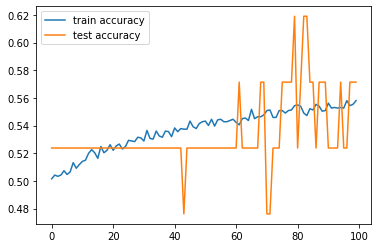

In [180]:
#buat plot
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='test accuracy')
plt.legend();

## 5.3 ANN - HAR

--2022-01-14 11:19:18--  https://lazyprogrammer.me/course_files/timeseries/UCI-HAR.zip
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60999314 (58M) [application/zip]
Saving to: ‘UCI-HAR.zip’

UCI-HAR.zip         100%[===================>]  58.17M   338KB/s    in 73s     

2022-01-14 11:20:31 (821 KB/s) - ‘UCI-HAR.zip’ saved [60999314/60999314]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 128 entries, 0 to 127
dtypes: float64(128)
memory usage: 7.2 MB
Plot:


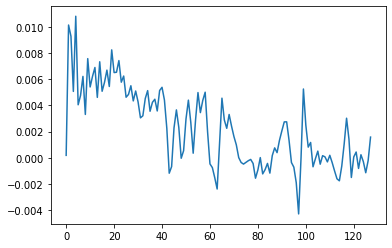

In [181]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

#download file
# https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones
# https://www.kaggle.com/erenaktas/human-activity-recognition
!wget -nc https://lazyprogrammer.me/course_files/timeseries/UCI-HAR.zip

#unzip
!unzip -nq UCI-HAR.zip

#buat randomseed
np.random.seed(123)
tf.random.set_seed(123)

#buat dataframe
df = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt',header=None,delim_whitespace=True)

#cek info dataframe
df.info()

#buat plot
print("Plot:")
df.iloc[0].plot();

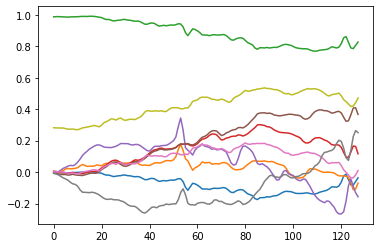

In [182]:
#angka2 dibawah ini didapat setelah memerika file
T = 128
Ntrain = 7352
Ntest = 2947
D = 9 # => 9 file
K = 6 # => angka untuk class (1-6)

#buat fungsi
def load_data():
  # Returns:
  # Xtrain (Ntrain x T x D), Ytrain (Ntrain)
  # Xtest (Ntest x T x D), Ytest (Ntest)

  Xtrain = np.zeros((Ntrain, T, D))
  Xtest = np.zeros((Ntest, T, D))

  #data training
  ts_filenames = [
    'body_acc_x_train.txt', 'body_gyro_x_train.txt', 'total_acc_x_train.txt',
    'body_acc_y_train.txt', 'body_gyro_y_train.txt', 'total_acc_y_train.txt',
    'body_acc_z_train.txt', 'body_gyro_z_train.txt', 'total_acc_z_train.txt',
  ]

  ts_file_prefix = 'UCI HAR Dataset/train/'

  for d, fn in enumerate(ts_filenames):
    df = pd.read_csv(
        f'{ts_file_prefix}Inertial Signals/{fn}',
        header=None,
        delim_whitespace=True)

    # Ntrain x T array
    x = df.to_numpy()
    Xtrain[:, :, d] = x
  
  #label training
  Ytrain = pd.read_csv(
      f'{ts_file_prefix}y_train.txt', header=None).to_numpy() - 1
  Ytrain = Ytrain.flatten()

  #data testing
  ts_filenames = [
    'body_acc_x_test.txt', 'body_gyro_x_test.txt', 'total_acc_x_test.txt',
    'body_acc_y_test.txt', 'body_gyro_y_test.txt', 'total_acc_y_test.txt',
    'body_acc_z_test.txt', 'body_gyro_z_test.txt', 'total_acc_z_test.txt',
  ]

  ts_file_prefix = 'UCI HAR Dataset/test/'

  for d, fn in enumerate(ts_filenames):
    df = pd.read_csv(
        f'{ts_file_prefix}Inertial Signals/{fn}',
        header=None,
        delim_whitespace=True)

    # Ntrain x T array
    x = df.to_numpy()
    Xtest[:, :, d] = x
  
  #label testing
  Ytest = pd.read_csv(
      f'{ts_file_prefix}y_test.txt', header=None).to_numpy() - 1
  Ytest = Ytest.flatten()

  return Xtrain, Ytrain, Xtest, Ytest

#tes fungsi di atas
Xtrain, Ytrain, Xtest, Ytest = load_data()

#buat plot (plot semua D=9, timeseries dengan panjang T=128)
plt.plot(Xtrain[7000, :, :]);

In [183]:
#ANN
inputs = []
features = []

#buat neural network untuk setiap jaringan time series D
for d in range(D):
  i = Input(shape=(T,))
  x = Dense(32, activation='relu')(i)
  x = Dense(16, activation='relu')(x)
  inputs.append(i)
  features.append(x)

#output gabungan akan menjadi D * (ukuran output JST individu)
x = Concatenate()(features)
x = Dense(K)(x)
model = Model(inputs, x)

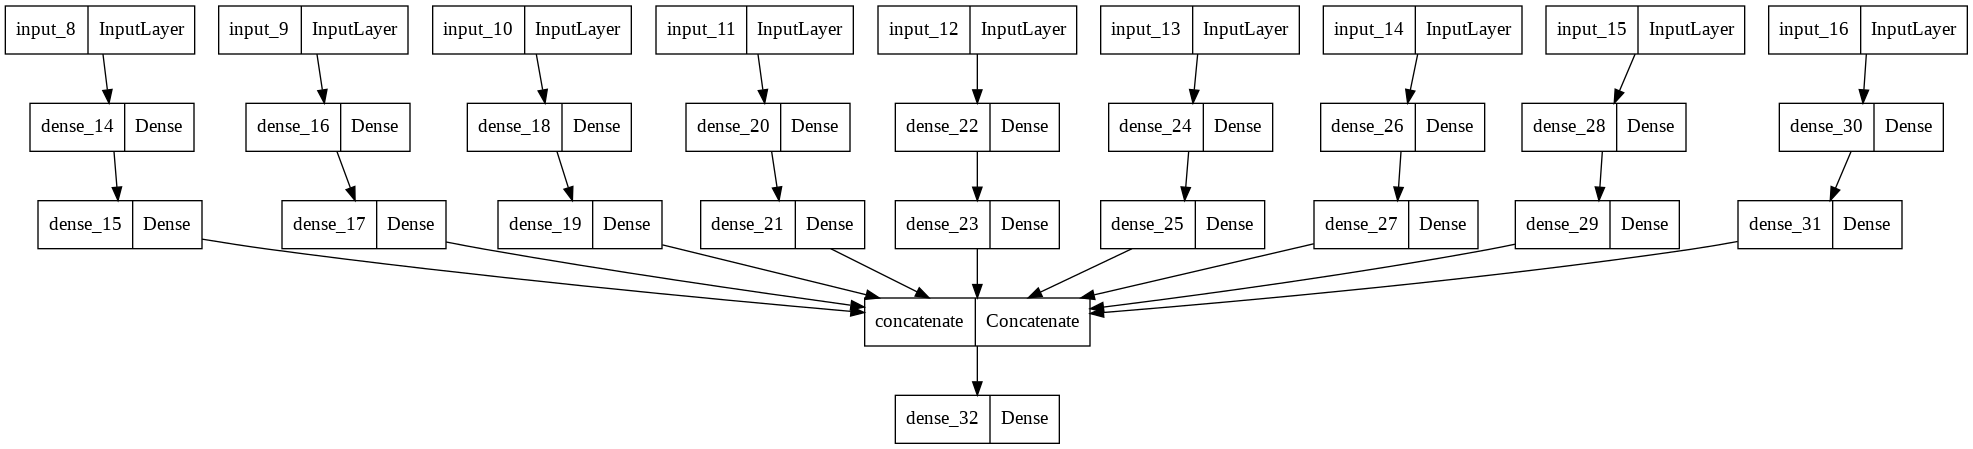

In [184]:
tf.keras.utils.plot_model(model)

In [185]:
#buat variable cek point
check_point = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

#buat compiler
model.compile(
  loss=SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy'],
)

#buat variable array
Xtrain_split = []
Xtest_split = []

#buat perulangan
for d in range(D):
  Xtrain_split.append(Xtrain[:, :, d])
  Xtest_split.append(Xtest[:, :, d])

#buat fit model
r = model.fit(
  Xtrain_split,
  Ytrain,
  epochs=15,
  callbacks=[check_point],
  validation_data=(Xtest_split, Ytest),
)

Epoch 1/15
230/230 [==============================] - 3s 8ms/step - loss: 0.6419 - accuracy: 0.7765 - val_loss: 0.4370 - val_accuracy: 0.8351
Epoch 2/15
230/230 [==============================] - 2s 7ms/step - loss: 0.2296 - accuracy: 0.9203 - val_loss: 0.3370 - val_accuracy: 0.8761
Epoch 3/15
230/230 [==============================] - 1s 6ms/step - loss: 0.1648 - accuracy: 0.9411 - val_loss: 0.3022 - val_accuracy: 0.8856
Epoch 4/15
230/230 [==============================] - 1s 6ms/step - loss: 0.1388 - accuracy: 0.9464 - val_loss: 0.2917 - val_accuracy: 0.9057
Epoch 5/15
230/230 [==============================] - 1s 6ms/step - loss: 0.1226 - accuracy: 0.9554 - val_loss: 0.2565 - val_accuracy: 0.9060
Epoch 6/15
230/230 [==============================] - 1s 6ms/step - loss: 0.1103 - accuracy: 0.9608 - val_loss: 0.2669 - val_accuracy: 0.9033
Epoch 7/15
230/230 [==============================] - 1s 6ms/step - loss: 0.1023 - accuracy: 0.9642 - val_loss: 0.2685 - val_accuracy: 0.9138
Epoch 

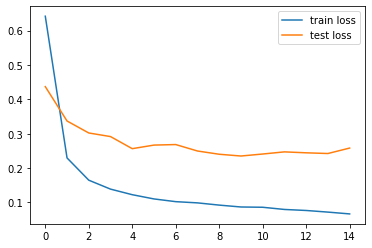

In [186]:
#buat plot
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

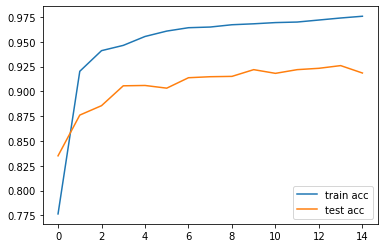

In [187]:
#buat plot
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend();

In [188]:
#buka model terbaik
best_model = tf.keras.models.load_model('best_model.h5')

#buat prediksi
Ptest = best_model.predict(Xtest_split)

#buat evaluasi
# evaluate
np.mean(np.argmax(Ptest, axis=1) == Ytest)

0.9260264675941635

In [193]:
#Import
from sklearn.preprocessing import StandardScaler

#buat fungsi ke-2
def load_features():
  # Returns:
  # X_train (Ntrain x D)
  # X_test (Ntest x D)

  #data training
  df = pd.read_csv(
        'UCI HAR Dataset/train/X_train.txt',
        header=None,
        delim_whitespace=True)
  
  feat_train = df.to_numpy()

  #data testing
  df = pd.read_csv(
        'UCI HAR Dataset/test/X_test.txt',
        header=None,
        delim_whitespace=True)
  
  feat_test = df.to_numpy()

  #scaller
  scaler = StandardScaler()
  feat_train = scaler.fit_transform(feat_train)
  feat_test = scaler.transform(feat_test)

  return feat_train, feat_test

#tes fungsi ke-2
feat_train, feat_test = load_features()

In [194]:
D_feat = feat_train.shape[1]

Epoch 1/15
230/230 [==============================] - 1s 3ms/step - loss: 0.3325 - accuracy: 0.8762 - val_loss: 0.1941 - val_accuracy: 0.9298
Epoch 2/15
230/230 [==============================] - 1s 3ms/step - loss: 0.1084 - accuracy: 0.9630 - val_loss: 0.1534 - val_accuracy: 0.9386
Epoch 3/15
230/230 [==============================] - 1s 3ms/step - loss: 0.0764 - accuracy: 0.9732 - val_loss: 0.1473 - val_accuracy: 0.9403
Epoch 4/15
230/230 [==============================] - 1s 3ms/step - loss: 0.0602 - accuracy: 0.9781 - val_loss: 0.1635 - val_accuracy: 0.9393
Epoch 5/15
230/230 [==============================] - 1s 3ms/step - loss: 0.0507 - accuracy: 0.9837 - val_loss: 0.1521 - val_accuracy: 0.9433
Epoch 6/15
230/230 [==============================] - 1s 3ms/step - loss: 0.0406 - accuracy: 0.9875 - val_loss: 0.1507 - val_accuracy: 0.9467
Epoch 7/15
230/230 [==============================] - 1s 3ms/step - loss: 0.0403 - accuracy: 0.9871 - val_loss: 0.1908 - val_accuracy: 0.9389
Epoch 

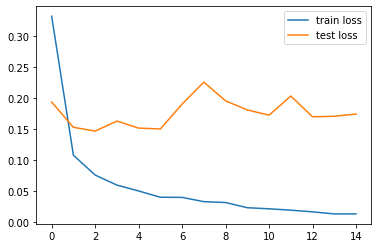

In [195]:
#buat model basic ANN
i = Input(shape=(D_feat,))
x = Dense(32, activation='relu')(i)
x = Dense(K)(x)
model = Model(i, x)

#buat compiler
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])

#buat cekpoint
check_point2 = ModelCheckpoint('best_model_basic.h5', monitor='val_accuracy', save_best_only=True)

#buat fit model
r = model.fit(feat_train,Ytrain,epochs=15,callbacks=[check_point2],validation_data=(feat_test, Ytest))

#buat plot
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

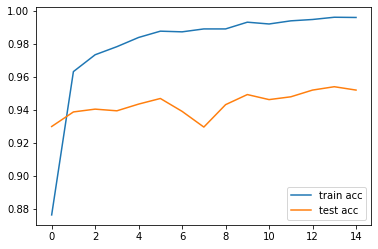

In [196]:
#buat plot
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend();

In [197]:
#load best model
best_model = tf.keras.models.load_model('best_model_basic.h5')

#buat prediksi
Ptest = best_model.predict(feat_test)

#evaluasi
np.mean(np.argmax(Ptest, axis=1) == Ytest)

0.9538513742789277

### 5.3.1 LR

In [198]:
#import
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

#buatmodel
model = LogisticRegression(solver='liblinear')

#fit model
model.fit(feat_train, Ytrain)

#score model
print("Score model untuk data training:", model.score(feat_train, Ytrain))
print("Score model untuk data testing:", model.score(feat_test, Ytest))

Score model untuk data training: 0.9945593035908596
Score model untuk data testing: 0.9613165931455717


### 5.3.2 SVC

In [199]:
#buatmodel
model = SVC()

#fit model
model.fit(feat_train, Ytrain)

#score model
print("Score model untuk data training:", model.score(feat_train, Ytrain))
print("Score model untuk data testing:", model.score(feat_test, Ytest))

Score model untuk data training: 0.9866702937976061
Score model untuk data testing: 0.9521547336274178


### 5.3.3 Random Forest Regression

In [200]:
#buatmodel
model = RandomForestClassifier()

#fit model
model.fit(feat_train, Ytrain)

#score model
print("Score model untuk data training:", model.score(feat_train, Ytrain))
print("Score model untuk data testing:", model.score(feat_test, Ytest))

Score model untuk data training: 1.0
Score model untuk data testing: 0.9304377332880895


### 5.3.4 Combine Model

Epoch 1/15
230/230 [==============================] - 4s 9ms/step - loss: 0.2890 - accuracy: 0.9025 - val_loss: 0.2290 - val_accuracy: 0.9165
Epoch 2/15
230/230 [==============================] - 2s 7ms/step - loss: 0.0924 - accuracy: 0.9701 - val_loss: 0.1768 - val_accuracy: 0.9399
Epoch 3/15
230/230 [==============================] - 2s 7ms/step - loss: 0.0673 - accuracy: 0.9752 - val_loss: 0.1770 - val_accuracy: 0.9372
Epoch 4/15
230/230 [==============================] - 2s 7ms/step - loss: 0.0558 - accuracy: 0.9792 - val_loss: 0.1880 - val_accuracy: 0.9389
Epoch 5/15
230/230 [==============================] - 2s 7ms/step - loss: 0.0495 - accuracy: 0.9811 - val_loss: 0.1492 - val_accuracy: 0.9518
Epoch 6/15
230/230 [==============================] - 1s 6ms/step - loss: 0.0390 - accuracy: 0.9864 - val_loss: 0.1577 - val_accuracy: 0.9505
Epoch 7/15
230/230 [==============================] - 1s 6ms/step - loss: 0.0356 - accuracy: 0.9883 - val_loss: 0.1793 - val_accuracy: 0.9454
Epoch 

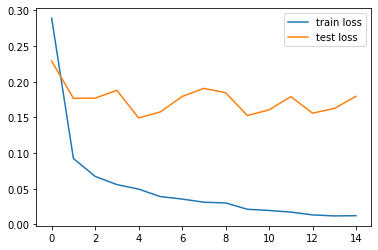

In [201]:
#buat variable array
inputs = []
features = []

#buat neural network for each of the D time series
for d in range(D):
  i = Input(shape=(T,))
  x = Dense(32, activation='relu')(i)
  x = Dense(16, activation='relu')(x)
  inputs.append(i)
  features.append(x)

i2 = Input(shape=(D_feat,))
x2 = Dense(32, activation='relu')(i2)

#output gabungan akan menjadi D * (ukuran dari output ANN individu)
x = Concatenate()(features + [x2])
x = Dense(K)(x)
model = Model(inputs + [i2], x)

#buat compiler
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])

#buat cekpoint
check_point3 = ModelCheckpoint('best_model_combined.h5', monitor='val_accuracy', save_best_only=True)

#buat fit model
r = model.fit(Xtrain_split + [feat_train],Ytrain,epochs=15,callbacks=[check_point3],validation_data=(Xtest_split + [feat_test], Ytest))

#buat plot
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

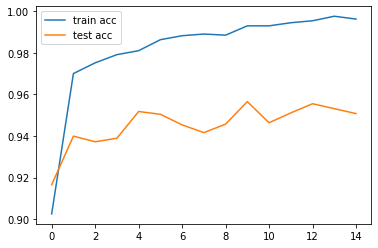

In [202]:
#buat plot
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend();

In [203]:
#load best model
best_model = tf.keras.models.load_model('best_model_combined.h5')

#buat prediksi
Ptest = best_model.predict(Xtest_split + [feat_test])

#evaluasi
np.mean(np.argmax(Ptest, axis=1) == Ytest)

0.9565659993213438

# Bagian 6 - CNN

## 6.1 CNN - Airline

### 6.1.1 1-step forecast dan multi-step forecast

In [204]:
#install
!pip install -U scikit-learn

#download file
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from sklearn.metrics import mean_absolute_percentage_error
from tensorflow.keras.models import Model

#buat dataframe
df = pd.read_csv('airline_passengers.csv', index_col="Month", parse_dates=True)

#buat kolom baru
df['LogPassengers'] = np.log(df['Passengers'])
df['DiffLogPassengers'] = df['LogPassengers'].diff()

#buat seed
np.random.seed(123)
tf.random.set_seed(123)

#buat variable
Ntest=12
train=df.iloc[:-Ntest] # -> sama aja kaya di atas tail(12)
test=df.iloc[-Ntest:] # -> sama aja kaya tail(12)

#buat dataseries yang berisi nilai boolean
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

#buat supervised dataset
series = df['DiffLogPassengers'].dropna().to_numpy() #buat data series baru yang hanya berisi kolom DiffLogPassengers aja

T=10 #buat variable T
X=[] #buat variable array X
Y=[] #buat variable array Y

#buat looping
for t in range(len(series) - T): #buat perulangan
  x = series[t:t+T] #x itu nilainya sama aja kaya data_series mulai dari 0 -> 10 
  X.append(x) #simpan nilai dari variable x ke variable array X
  y = series[t+T] #y itu nilainya sama aja kaya data_series mulai dari yang ke 11
  Y.append(y) #simpan nilai dari variable y ke variable array Y

X = np.array(X).reshape(-1,T,1)
Y = np.array(Y)
N = len(X)

File ‘airline_passengers.csv’ already there; not retrieving.

X.shape:  (133, 10, 1) 
Y.shape:  (133,)


### 6.1.2 Lanjut CNN

In [205]:
#buat variable untuk data training dan testing
Xtrain, Ytrain = X[:-Ntest], Y[:-Ntest] # => untuk data training
Xtest, Ytest = X[-Ntest:], Y[-Ntest:] # => untuk data testing

#buat model CNN
i = Input(shape=(T,1))
x = Conv1D(16, 3, activation='relu')(i)
x = MaxPooling1D(2)(x)
x = Conv1D(32, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1)(x)
model = Model(i,x)

#buat summary
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 10, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 8, 16)             64        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 4, 16)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 32)             1568      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_55 (Dense)            (None, 1)                 33 

In [206]:
#buat compiler
model.compile(loss='mse',optimizer='adam')

#buat fit model
r = model.fit(Xtrain,Ytrain,epochs=100,validation_data = (Xtest,Ytest))

Epoch 1/100
4/4 [==============================] - 1s 56ms/step - loss: 0.0110 - val_loss: 0.0112
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0102 - val_loss: 0.0109
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0097 - val_loss: 0.0105
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0093 - val_loss: 0.0100
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0089 - val_loss: 0.0097
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0086 - val_loss: 0.0094
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0081 - val_loss: 0.0091
Epoch 8/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0077 - val_loss: 0.0089
Epoch 9/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0074 - val_loss: 0.0086
Epoch 10/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0071 - val_loss: 0.0083
Epoch 11/100
4/4 [=

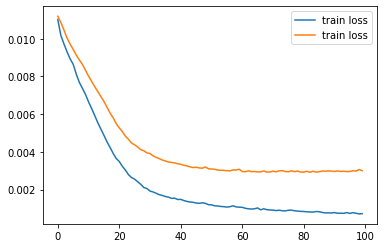

In [207]:
#buat plot
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='train loss')
plt.legend()

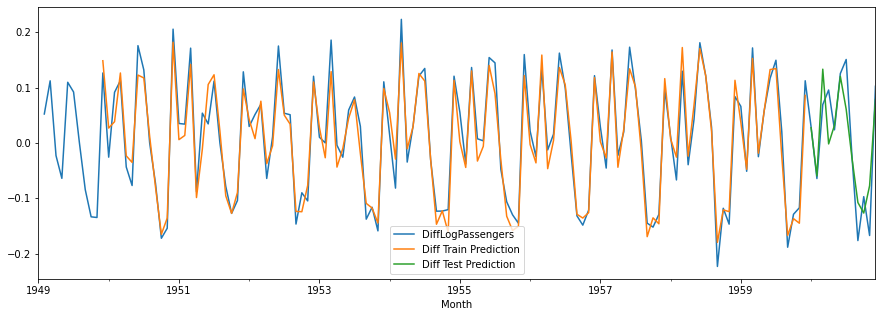

In [208]:
#buat agar nilai dari T+1 tidak dapat diprediksi
train_idx[:T+1] = False

#buat variable baru
Ptrain = model.predict(Xtrain).flatten()
Ptest = model.predict(Xtest).flatten()

#buat kolom baru
df.loc[train_idx,'Diff Train Prediction'] = Ptrain
df.loc[test_idx,'Diff Test Prediction'] = Ptest

#buat variable array
cols = ['DiffLogPassengers','Diff Train Prediction', 'Diff Test Prediction']

#buat plot
df[cols].plot(figsize=(15,5))

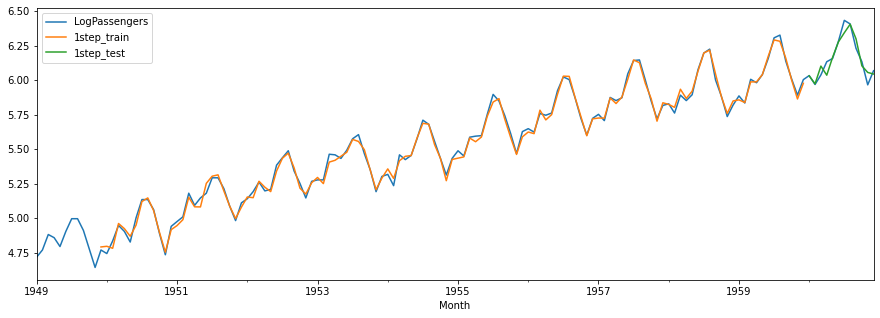

In [209]:
#buat variable baru untuk mengetahui prediksi yang tidak berbeda
df['ShiftLogPassengers'] = df['LogPassengers'].shift(1)
prev=df['ShiftLogPassengers']

#untuk mengetahui nilai data training terakhir
last_train=train.iloc[-1]['LogPassengers']

#1-step forecast
df.loc[train_idx, '1step_train'] = prev[train_idx] + Ptrain
df.loc[test_idx, '1step_test'] = prev[test_idx] + Ptest

#plot 1-step forecast
df[['LogPassengers','1step_train','1step_test']].plot(figsize=(15,5))

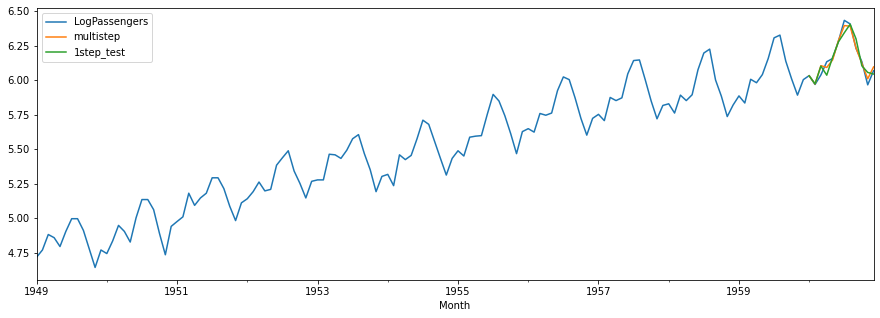

In [210]:
#multi-step forecast

#buat variable array
multistep_predictions = []

#buat variable
last_x = Xtest[0]

#buat looping
while len(multistep_predictions) < Ntest:
  #buat variable
  p = model.predict(last_x.reshape(1,-1))[0]

  #update list prediksi
  multistep_predictions.append(p)

  #buat inputan baru
  last_x = np.roll(last_x,-1)
  last_x[-1] = p

#simpan multi-step forecast ke dalam dataframe
df.loc[test_idx, 'multistep'] = last_train + np.cumsum(multistep_predictions)

#buat plot 1-step dan multi-step forecast
df[['LogPassengers','multistep','1step_test']].plot(figsize=(15,5))

In [211]:
p

array([0.08610717], dtype=float32)

### 6.1.3 Multi-output Forecast

In [212]:
#buat multi-output supervised dataset

#buat variable
Tx = T
Ty = Ntest

#buat variable array
X = []
Y = []

#looping
for t in range(len(series) - Tx - Ty + 1):
  x = series[t:t+Tx]
  X.append(x)
  y = series[t+Tx:t+Tx+Ty]
  Y.append(y)

#reshape array X dan Y
X = np.array(X).reshape(-1, Tx, 1)
Y = np.array(Y).reshape(-1, Ty)
N = len(X)

#buat model untuk data training dan testing
Xtrain_m, Ytrain_m = X[:-1], Y[:-1]
Xtest_m, Ytest_m = X[-1:], Y[-1:]

#buat model CNN
i = Input(shape=(Tx, 1))
x = Conv1D(16,3,activation='relu')(i)
x = MaxPooling1D(2)(x)
x = Conv1D(32, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(Ty)(x)
model = Model(i, x)

#buat compiler
model.compile(loss='mse',optimizer='adam')

#buat fit model
r = model.fit(Xtrain_m, Ytrain_m, epochs=200, validation_data=(Xtest_m,Ytest_m))

Epoch 1/200
4/4 [==============================] - 1s 54ms/step - loss: 0.0122 - val_loss: 0.0110
Epoch 2/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0114 - val_loss: 0.0115
Epoch 3/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0110 - val_loss: 0.0116
Epoch 4/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0107 - val_loss: 0.0113
Epoch 5/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0105 - val_loss: 0.0108
Epoch 6/200
4/4 [==============================] - 0s 11ms/step - loss: 0.0102 - val_loss: 0.0103
Epoch 7/200
4/4 [==============================] - 0s 13ms/step - loss: 0.0100 - val_loss: 0.0099
Epoch 8/200
4/4 [==============================] - 0s 10ms/step - loss: 0.0098 - val_loss: 0.0096
Epoch 9/200
4/4 [==============================] - 0s 19ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 10/200
4/4 [==============================] - 0s 12ms/step - loss: 0.0093 - val_loss: 0.0092
Epoch 11/200
4/4 [=

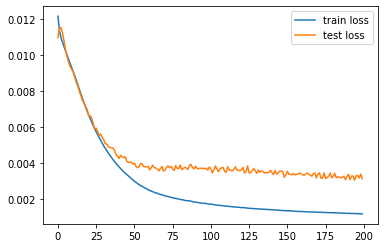

In [213]:
#buat plot
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend()

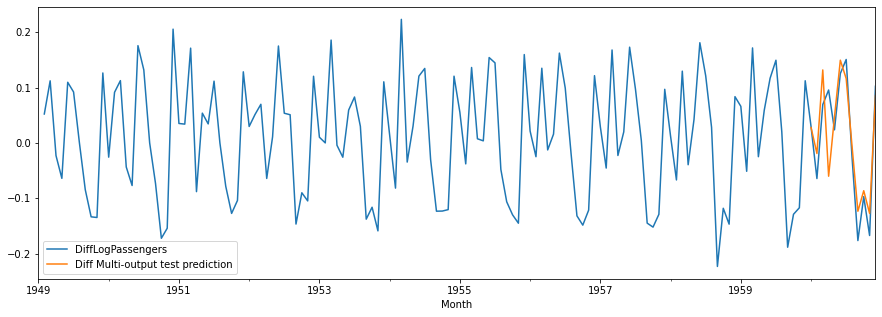

In [214]:
#buat data training dan testing
Ptrain = model.predict(Xtrain_m)
Ptest = model.predict(Xtest_m)
Ptrain = Ptrain[:,0]
Ptest = Ptest[0]

df.loc[test_idx, 'Diff Multi-output test prediction'] = Ptest
cols=['DiffLogPassengers','Diff Multi-output test prediction']
df[cols].plot(figsize=(15,5))

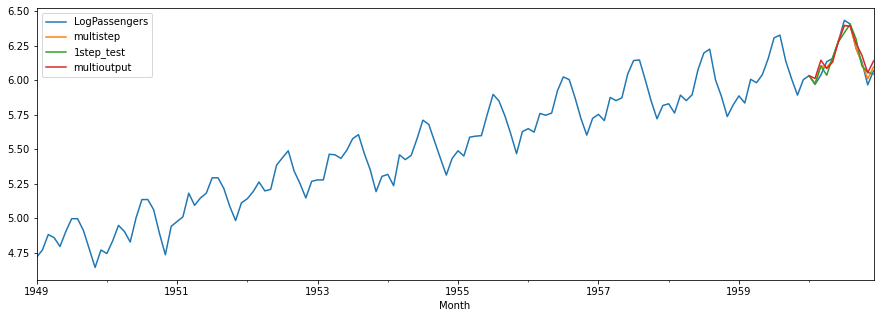

In [215]:
#simpan multi-output ke dalam dataframe
df.loc[test_idx, 'multioutput'] = last_train + np.cumsum(Ptest)

#buat plot untuk semua forecast
cols = ['LogPassengers','multistep','1step_test','multioutput']
df[cols].plot(figsize=(15,5))

In [216]:
#MAPE
test_log_pass = df.iloc[-Ntest:]['LogPassengers']
mape1=mean_absolute_percentage_error(test_log_pass,df.loc[test_idx,'multistep'])
print("multi-step MAPE:",mape1)
mape2=mean_absolute_percentage_error(test_log_pass,df.loc[test_idx,'multioutput'])
print("multi-step MAPE:",mape2)

multi-step MAPE: 0.003642729631224577
multi-step MAPE: 0.007155414694696227


## 6.2 CNN - HAR

File ‘UCI-HAR.zip’ already there; not retrieving.



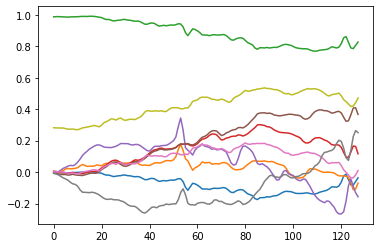

In [217]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, GlobalAveragePooling1D, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

#download file
!wget -nc https://lazyprogrammer.me/course_files/timeseries/UCI-HAR.zip

#unzip file
!unzip -nq UCI-HAR.zip

#buat random seed
np.random.seed(0)
tf.random.set_seed(0)

#angka dibawah ini didapat setelah memerika file
T = 128
Ntrain = 7352
Ntest = 2947
D = 9 # 9 => banyaknya files
K = 6 # 6 => jumlah class

def load_data():
  #buat variable untuk data train dan test
  Xtrain = np.zeros((Ntrain, T, D))
  Xtest = np.zeros((Ntest, T, D))

  #data training
  ts_filenames = [
    'body_acc_x_train.txt', 'body_gyro_x_train.txt', 'total_acc_x_train.txt',
    'body_acc_y_train.txt', 'body_gyro_y_train.txt', 'total_acc_y_train.txt',
    'body_acc_z_train.txt', 'body_gyro_z_train.txt', 'total_acc_z_train.txt',
  ]

  ts_file_prefix = 'UCI HAR Dataset/train/'

  for d, fn in enumerate(ts_filenames):
    df = pd.read_csv(f'{ts_file_prefix}Inertial Signals/{fn}',header=None,delim_whitespace=True)

    # Ntrain x T array
    x = df.to_numpy()
    Xtrain[:, :, d] = x
  
  #label data training
  Ytrain = pd.read_csv(f'{ts_file_prefix}y_train.txt', header=None).to_numpy() - 1
  Ytrain = Ytrain.flatten()

  #data testing
  ts_filenames = [
    'body_acc_x_test.txt', 'body_gyro_x_test.txt', 'total_acc_x_test.txt',
    'body_acc_y_test.txt', 'body_gyro_y_test.txt', 'total_acc_y_test.txt',
    'body_acc_z_test.txt', 'body_gyro_z_test.txt', 'total_acc_z_test.txt',
  ]

  ts_file_prefix = 'UCI HAR Dataset/test/'

  for d, fn in enumerate(ts_filenames):
    df = pd.read_csv(f'{ts_file_prefix}Inertial Signals/{fn}',header=None,delim_whitespace=True)

    # Ntrain x T array
    x = df.to_numpy()
    Xtest[:, :, d] = x
  
  #label data testing
  Ytest = pd.read_csv(f'{ts_file_prefix}y_test.txt', header=None).to_numpy() - 1
  Ytest = Ytest.flatten()

  return Xtrain, Ytrain, Xtest, Ytest

#tes fungsi diatas
Xtrain, Ytrain, Xtest, Ytest = load_data()

# plot semua D=9 time series dari panjang T=128
plt.plot(Xtrain[7000, :, :]);

In [218]:
#buat model CNN
i = Input(shape=(T, D))
x = Conv1D(32, 5, activation='relu')(i)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(2)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(K)(x)
model = Model(i, x)

#buat summary dari model
model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, 128, 9)]          0         
                                                                 
 conv1d_4 (Conv1D)           (None, 124, 32)           1472      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 41, 32)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 39, 64)            6208      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 19, 64)           0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 17, 128)           247

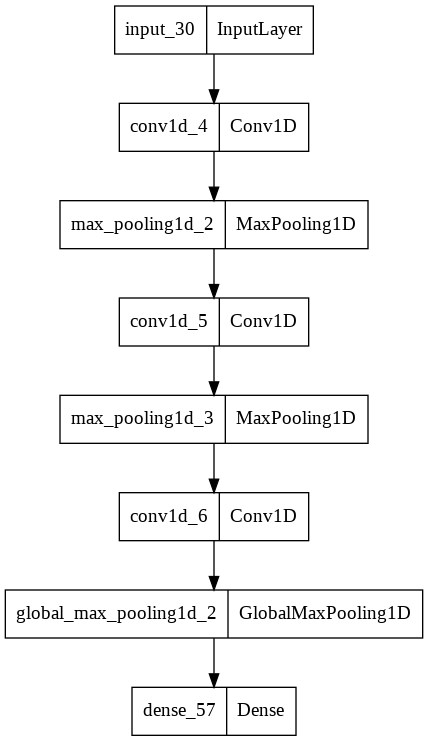

In [219]:
tf.keras.utils.plot_model(model)

In [220]:
#buat cekpoint model
check_point = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

#buat compiler
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])

#buat fit model
r = model.fit(Xtrain,Ytrain,epochs=15,callbacks=[check_point],validation_data=(Xtest, Ytest))

Epoch 1/15
230/230 [==============================] - 4s 16ms/step - loss: 0.4047 - accuracy: 0.8671 - val_loss: 0.2427 - val_accuracy: 0.8985
Epoch 2/15
230/230 [==============================] - 4s 15ms/step - loss: 0.1197 - accuracy: 0.9535 - val_loss: 0.2618 - val_accuracy: 0.9141
Epoch 3/15
230/230 [==============================] - 4s 15ms/step - loss: 0.1069 - accuracy: 0.9554 - val_loss: 0.2226 - val_accuracy: 0.9145
Epoch 4/15
230/230 [==============================] - 3s 15ms/step - loss: 0.0973 - accuracy: 0.9595 - val_loss: 0.2101 - val_accuracy: 0.9237
Epoch 5/15
230/230 [==============================] - 4s 16ms/step - loss: 0.0921 - accuracy: 0.9621 - val_loss: 0.3111 - val_accuracy: 0.9057
Epoch 6/15
230/230 [==============================] - 4s 16ms/step - loss: 0.0846 - accuracy: 0.9623 - val_loss: 0.2209 - val_accuracy: 0.9125
Epoch 7/15
230/230 [==============================] - 3s 15ms/step - loss: 0.0790 - accuracy: 0.9663 - val_loss: 0.2928 - val_accuracy: 0.9070

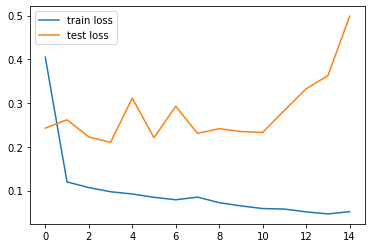

In [221]:
#buat plot
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

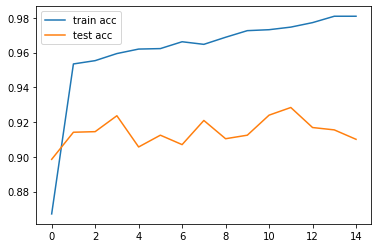

In [222]:
#buat plot
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend();

In [223]:
#load model terbaik
best_model = tf.keras.models.load_model('best_model.h5')

#buat prediksi
Ptest = best_model.predict(Xtest)

#evaluasi
np.mean(np.argmax(Ptest, axis=1) == Ytest)

0.9284017645062775

In [225]:
#fungsi 2
def load_features():
  #data train
  df = pd.read_csv(
        'UCI HAR Dataset/train/X_train.txt',
        header=None,
        delim_whitespace=True)
  
  feat_train = df.to_numpy()

  #data testing
  df = pd.read_csv(
        'UCI HAR Dataset/test/X_test.txt',
        header=None,
        delim_whitespace=True)
  
  feat_test = df.to_numpy()

  scaler = StandardScaler()
  feat_train = scaler.fit_transform(feat_train)
  feat_test = scaler.transform(feat_test)

  return feat_train, feat_test

#tes fungsi 2
feat_train, feat_test = load_features()

In [226]:
#buat variable
D_feat = feat_train.shape[1]

In [227]:
# Combined Model

# CNN
i = Input(shape=(T, D))
x = Conv1D(32, 5, activation='relu')(i)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(2)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)

# ANN
i2 = Input(shape=(D_feat,))
x2 = Dense(64, activation='relu')(i2)

x = Concatenate()([x, x2])
x = Dense(K)(x)
model = Model([i, i2], x)

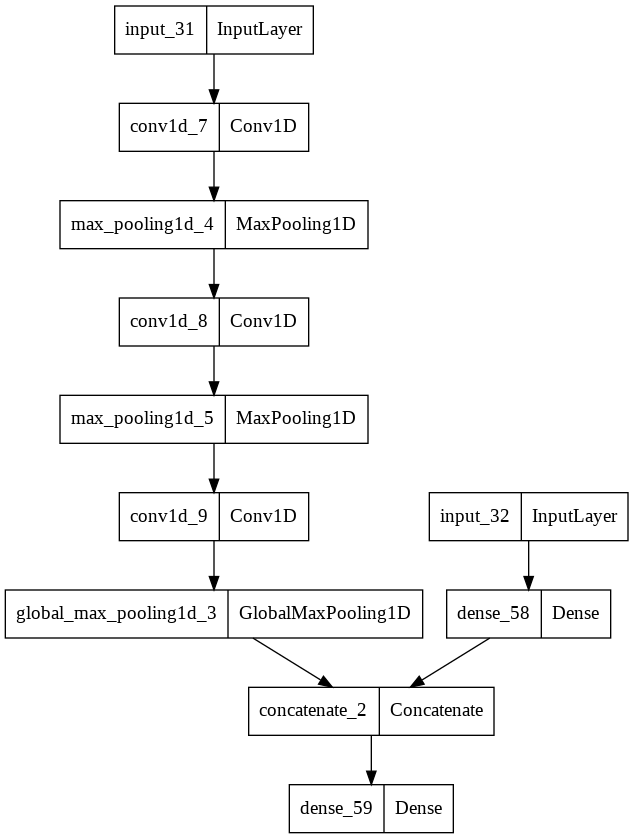

In [228]:
tf.keras.utils.plot_model(model)

In [229]:
#buat cek point 3
check_point3 = ModelCheckpoint('best_model_combined.h5', monitor='val_accuracy', save_best_only=True)

#buat compiler
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])

#buat fit model
r = model.fit([Xtrain, feat_train],Ytrain,epochs=15,callbacks=[check_point3],validation_data=([Xtest, feat_test], Ytest),)

Epoch 1/15
230/230 [==============================] - 5s 18ms/step - loss: 0.2221 - accuracy: 0.9189 - val_loss: 0.1533 - val_accuracy: 0.9393
Epoch 2/15
230/230 [==============================] - 4s 16ms/step - loss: 0.0733 - accuracy: 0.9712 - val_loss: 0.1574 - val_accuracy: 0.9488
Epoch 3/15
230/230 [==============================] - 4s 16ms/step - loss: 0.0492 - accuracy: 0.9803 - val_loss: 0.1192 - val_accuracy: 0.9583
Epoch 4/15
230/230 [==============================] - 4s 16ms/step - loss: 0.0423 - accuracy: 0.9838 - val_loss: 0.1383 - val_accuracy: 0.9559
Epoch 5/15
230/230 [==============================] - 4s 17ms/step - loss: 0.0370 - accuracy: 0.9872 - val_loss: 0.1275 - val_accuracy: 0.9566
Epoch 6/15
230/230 [==============================] - 4s 16ms/step - loss: 0.0347 - accuracy: 0.9859 - val_loss: 0.1263 - val_accuracy: 0.9596
Epoch 7/15
230/230 [==============================] - 4s 16ms/step - loss: 0.0296 - accuracy: 0.9887 - val_loss: 0.1608 - val_accuracy: 0.9518

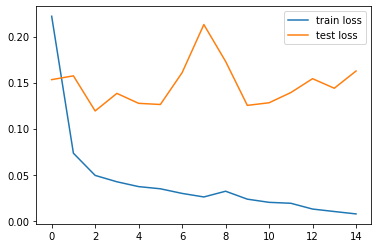

In [230]:
#buat plot
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

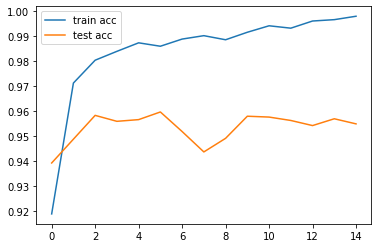

In [231]:
#buat plot
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend();

In [232]:
#load model terbaik
best_model = tf.keras.models.load_model('best_model_combined.h5')

#buat prediksi
Ptest = best_model.predict([Xtest, feat_test])

#evaluasi
np.mean(np.argmax(Ptest, axis=1) == Ytest)

0.9596199524940617

### 6.2.1 LR

In [233]:
#import
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

#buatmodel
model = LogisticRegression(solver='liblinear')

#fit model
model.fit(feat_train, Ytrain)

#score model
print("Score model untuk data training:", model.score(feat_train, Ytrain))
print("Score model untuk data testing:", model.score(feat_test, Ytest))

Score model untuk data training: 0.9945593035908596
Score model untuk data testing: 0.9613165931455717


### 6.2.2 SVC

In [234]:
#buatmodel
model = SVC()

#fit model
model.fit(feat_train, Ytrain)

#score model
print("Score model untuk data training:", model.score(feat_train, Ytrain))
print("Score model untuk data testing:", model.score(feat_test, Ytest))

Score model untuk data training: 0.9866702937976061
Score model untuk data testing: 0.9521547336274178


### 6.2.3 Random Forest Regression

In [235]:
#buatmodel
model = RandomForestClassifier()

#fit model
model.fit(feat_train, Ytrain)

#score model
print("Score model untuk data training:", model.score(feat_train, Ytrain))
print("Score model untuk data testing:", model.score(feat_test, Ytest))

Score model untuk data training: 1.0
Score model untuk data testing: 0.9236511706820495
